<h1><font color="blue">Stackoverflow Survey 2017 Data Analysis</font></h1>

Goal 3:

The third goal is to compare our pollutant findings with our crime findings and see if a correlation between the two exists and apply predictive modal to the data.

This will illustrate if certain pollutants and the air quailty have any influence on peoples behaviour and have any impact on the crime rate within the city.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def est_coeff(x, y):
    n = np.size(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    
    SS_xy = np.sum(y*x - n*mean_y*mean_x)
    SS_xx = np.sum(x*x - n*mean_x*mean_x)
    
    b_1 = SS_xy/SS_xx
    b_0 = mean_y - b_1*mean_x
    
    return(b_0, b_1)

In [4]:
def plot_reg_line(x, y, b, i, j):
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    
    y_pred = b[0] + b[1]*x
    
    # plt.plot(x, y_pred, color = "g")
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

In [5]:
def arrays_to_reg(x, y, i, j):
    b = est_coeff(x, y)
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1]))
    plot_reg_line(x, y, b, i, j)

In [6]:
import pandas as pd

cities = ['Chicago', 'New York', 'Los Angeles']

crime_index = ['Violent Crime rate', 'Murder and nonnegligent manslaughter rate',
               'Legacy rape rate', 'Robbery rate', 'Aggravated assault rate',
               'Property crime rate', 'Burglary rate', 'Larceny-theft rate',
               'Motor vehicle theft rate']

ch_crime = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/CrimeStatsChicagoc1.csv")
ch_rates = [ch_crime[rate] for rate in crime_index]
la_crime = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/CrimeStatsLAc1.csv")
la_rates = [la_crime[rate] for rate in crime_index]
ny_crime = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/CrimeStatsNYc1.csv")
ny_rates = [ny_crime[rate] for rate in crime_index]

rates = [ch_rates, la_rates, ny_rates]

pollution_index = ['Carbon Monoxide', 'Nitrogen Dioxide', 'Ozone',
                   'Sulfur Dioxide', 'PM10', 'PM2.5']

ch_co = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/ChicagoCO.csv")
ch_no = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/ChicagoNo2.csv")
ch_oz = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/ChicagoOzone.csv")
ch_so = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/ChicagoSo2.csv")
ch_10 = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/ChicagoPM10.csv")
ch_25 = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/ChicagoPM25.csv")
ch_pollution = [ch_co, ch_no, ch_oz, ch_so, ch_10, ch_25]

la_co = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/LACO.csv")
la_no = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/LANo2.csv")
la_oz = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/LAOzone.csv")
la_so = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/LASo2.csv")
la_10 = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/LAPM10.csv")
la_25 = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/LAPM25.csv")
la_pollution = [la_co, la_no, la_oz, la_so, la_10, la_25]

ny_co = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/NYCO.csv")
ny_no = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/NYNo2.csv")
ny_oz = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/NYOzone.csv")
ny_so = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/2NYSo2.csv")
ny_10 = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/NYPM10.csv")
ny_25 = pd.read_csv("https://raw.githubusercontent.com/DeclanCarter/DataScience/master/NYPM25.csv")
ny_pollution = [ny_co, ny_no, ny_oz, ny_so, ny_10, ny_25]

pollution = [ch_pollution, la_pollution, ny_pollution]
#print(ch_pollution[0][index[0] + ' AQI Value'])
#print(ch_pollution[0].head(1))
#print(ch_rates[0])

In [7]:
def pollution_data(pollution, index):
#print(type(ch_pollution[0]))
    year = 1985
    prev = 0
    total = 0
    minm = 2147483647
    maxm = 0
    #change = []
    for i, x in enumerate(pollution['Date']): 
        if str(year) not in x:
            if year == 1985:
                data = [[total / 365], [minm], [maxm], [maxm - minm]]
            else:
                if year/4 == 0:
                    data[0].append(total / 366)
                else:
                    data[0].append(total / 365)
                data[1].append(minm)
                data[2].append(maxm)
                data[3].append(maxm-minm)
            total = 0
            minm = 2147483647
            maxm = 0
            year += 1
        pol = pollution[index + ' AQI Value'][i]
        total += pol
        #change.append(pol - prev)
        prev = pol
        if pol < minm:
            minm = pol
        if pol > maxm:
            maxm = pol
    data[0].append(total / 365)
    data[1].append(minm)
    data[2].append(maxm)
    data[3].append(maxm-minm)
    return data

Chicago
Chicago Mean Annual Carbon Monoxide vs Violent Crime rate
Estimated coefficients:
b_0 = -38.37503059505252
b_1 = 552.2726551253246


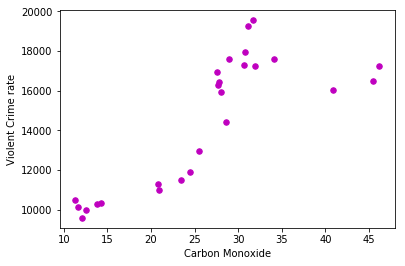

Chicago Annual Variance Carbon Monoxide vs Violent Crime rate
Estimated coefficients:
b_0 = -43.865646556574575
b_1 = 268.1798624985558


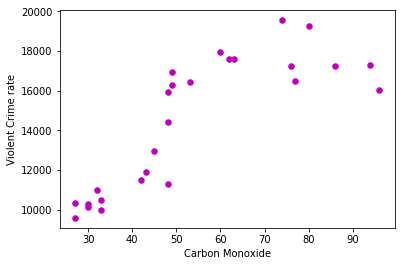

Chicago Mean Annual Carbon Monoxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.07557626635938774
b_1 = 0.8995087726178068


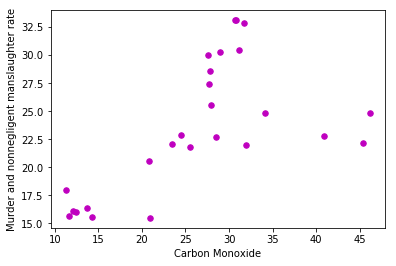

Chicago Annual Variance Carbon Monoxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.08047637704660104
b_1 = 0.4367205592905421


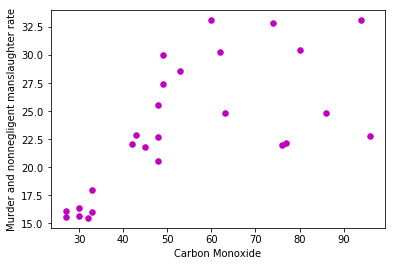

Chicago Mean Annual Carbon Monoxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


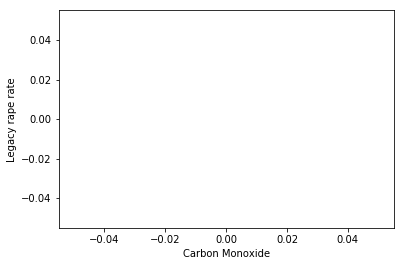

Chicago Annual Variance Carbon Monoxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


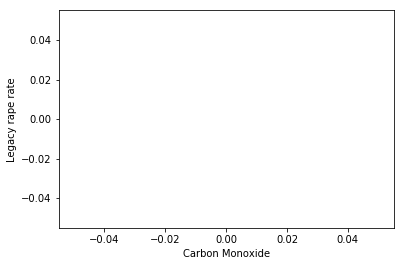

Chicago Mean Annual Carbon Monoxide vs Robbery rate
Estimated coefficients:
b_0 = -1.8025054223641064
b_1 = 33.223849180324734


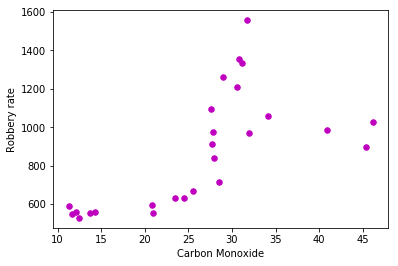

Chicago Annual Variance Carbon Monoxide vs Robbery rate
Estimated coefficients:
b_0 = -1.6700222959117355
b_1 = 16.124712156365625


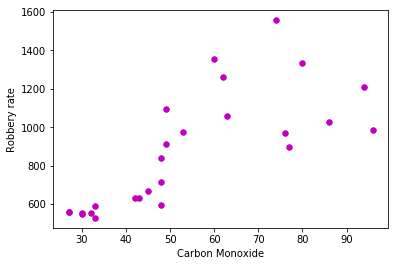

Chicago Mean Annual Carbon Monoxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -2.1521692294668355
b_1 = 39.47046392956912


Chicago Annual Variance Carbon Monoxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -2.416973516567623
b_1 = 19.16422869140979


Chicago Mean Annual Carbon Monoxide vs Property crime rate
Estimated coefficients:
b_0 = -17.17246220006382
b_1 = 239.33912612492915


Chicago Annual Variance Carbon Monoxide vs Property crime rate
Estimated coefficients:
b_0 = -19.849138923184
b_1 = 116.22695915445037


Chicago Mean Annual Carbon Monoxide vs Burglary rate
Estimated coefficients:
b_0 = -2.261369970781516
b_1 = 49.98621058539638


Chicago Annual Variance Carbon Monoxide vs Burglary rate
Estimated coefficients:
b_0 = -2.5563189850222443
b_1 = 24.269227255238846


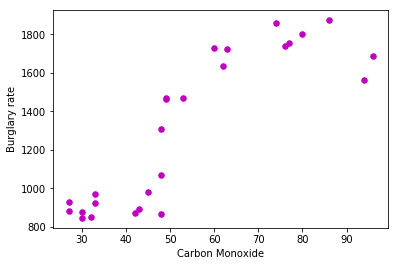

Chicago Mean Annual Carbon Monoxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -13.265320091673857
b_1 = 145.1392937278351


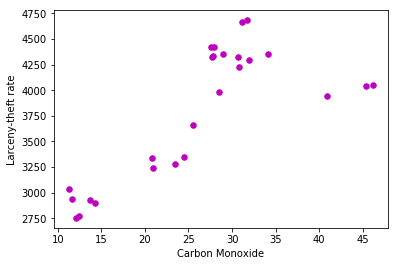

Chicago Annual Variance Carbon Monoxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -15.180731775365985
b_1 = 70.48740144210642


Chicago Mean Annual Carbon Monoxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -1.6456274143451992
b_1 = 44.21420280465246


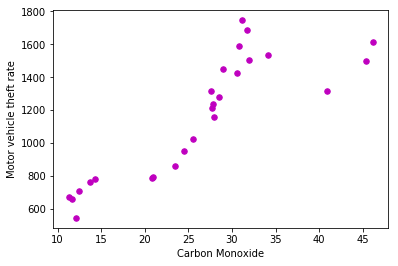

Chicago Annual Variance Carbon Monoxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -2.111984683479477
b_1 = 21.47061323969428


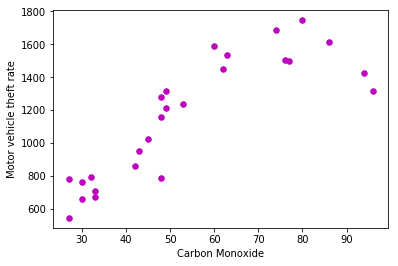

Chicago Mean Annual Nitrogen Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = -4.087360489273124
b_1 = 262.14738553983324


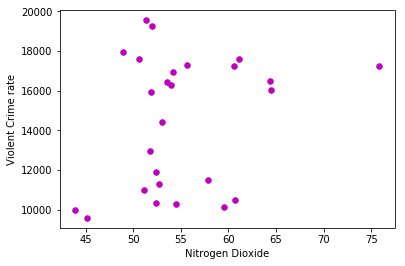

Chicago Annual Variance Nitrogen Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = -8.233553532078076
b_1 = 162.78314092327153


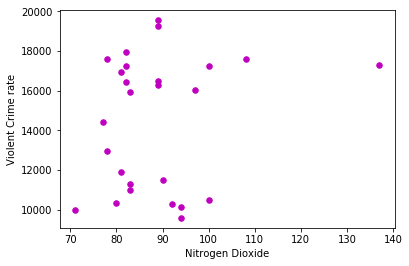

Chicago Mean Annual Nitrogen Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.013020181483589965
b_1 = 0.4268483130708377


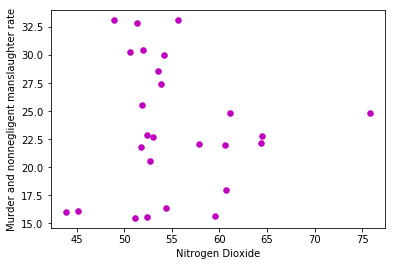

Chicago Annual Variance Nitrogen Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.01310512674341524
b_1 = 0.26498082862508826


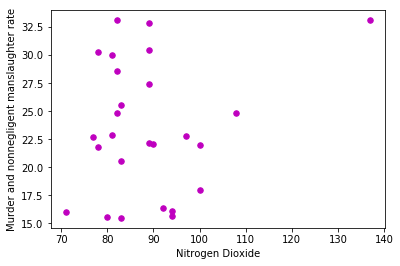

Chicago Mean Annual Nitrogen Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


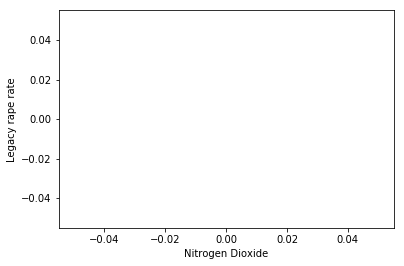

Chicago Annual Variance Nitrogen Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


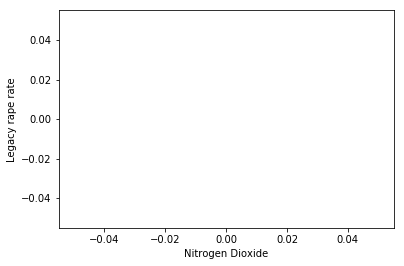

Chicago Mean Annual Nitrogen Dioxide vs Robbery rate
Estimated coefficients:
b_0 = -0.3375989801867263
b_1 = 15.781215121050586


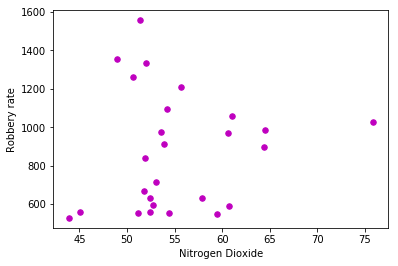

Chicago Annual Variance Nitrogen Dioxide vs Robbery rate
Estimated coefficients:
b_0 = -0.3363779602171917
b_1 = 9.796685070145363


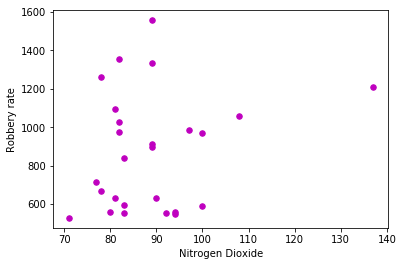

Chicago Mean Annual Nitrogen Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -0.4213973071825876
b_1 = 18.74850924995157


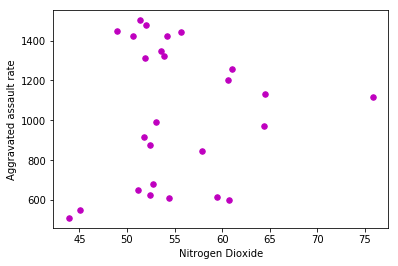

Chicago Annual Variance Nitrogen Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -0.4754653638758555
b_1 = 11.639351277375821


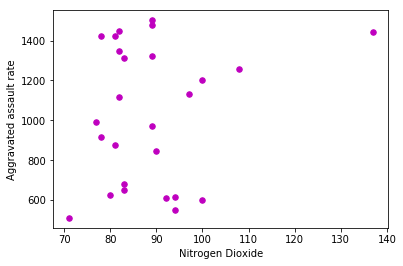

Chicago Mean Annual Nitrogen Dioxide vs Property crime rate
Estimated coefficients:
b_0 = -1.657714796098844
b_1 = 113.5952676742401


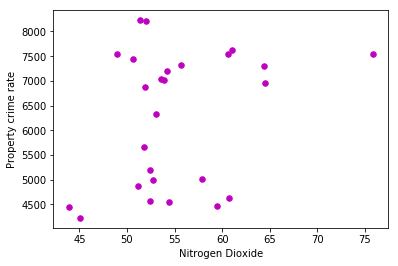

Chicago Annual Variance Nitrogen Dioxide vs Property crime rate
Estimated coefficients:
b_0 = -3.7043012284611905
b_1 = 70.54097524120398


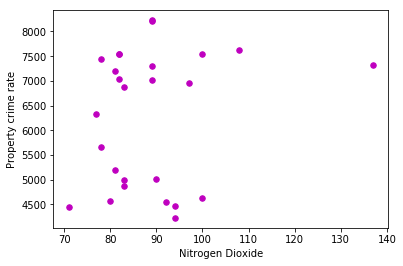

Chicago Mean Annual Nitrogen Dioxide vs Burglary rate
Estimated coefficients:
b_0 = -0.019083174375737144
b_1 = 23.742585044945447


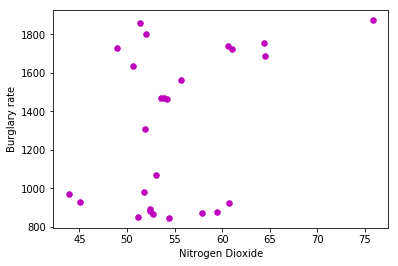

Chicago Annual Variance Nitrogen Dioxide vs Burglary rate
Estimated coefficients:
b_0 = -0.5528473591525653
b_1 = 14.744986587846673


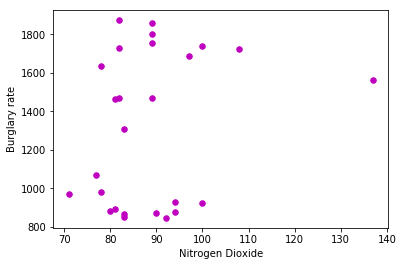

Chicago Mean Annual Nitrogen Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -1.5535015088880755
b_1 = 68.84431011020814


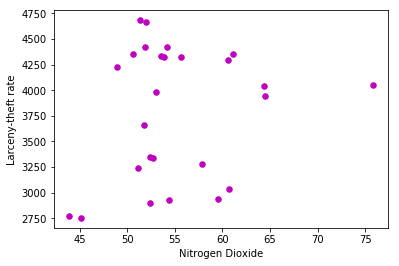

Chicago Annual Variance Nitrogen Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -2.532172384389014
b_1 = 42.748348411430975


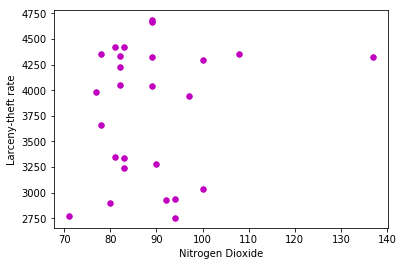

Chicago Mean Annual Nitrogen Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -0.08504454105604964
b_1 = 21.008650026366574


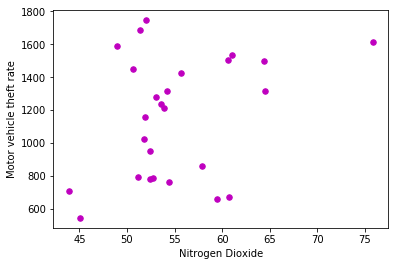

Chicago Annual Variance Nitrogen Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -0.6192841092336039
b_1 = 13.0478135066436


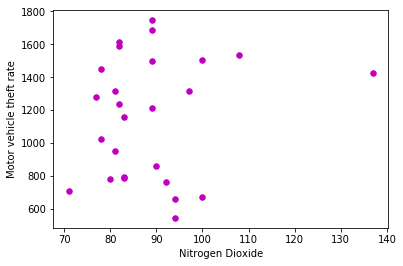

Chicago Mean Annual Ozone vs Violent Crime rate
Estimated coefficients:
b_0 = -0.5078328167128348
b_1 = 282.94536901590885


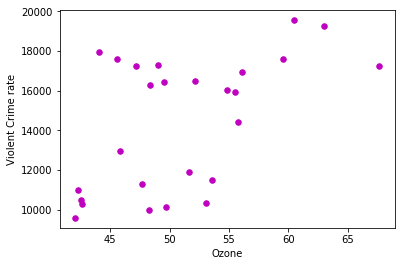

Chicago Annual Variance Ozone vs Violent Crime rate
Estimated coefficients:
b_0 = -0.15161240903216822
b_1 = 71.36324884548533


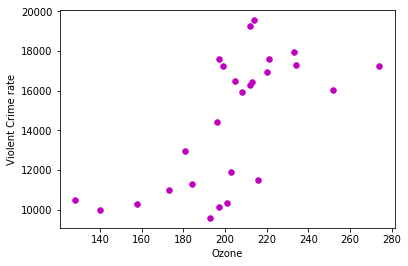

Chicago Mean Annual Ozone vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.006101290789761293
b_1 = 0.4606918180421635


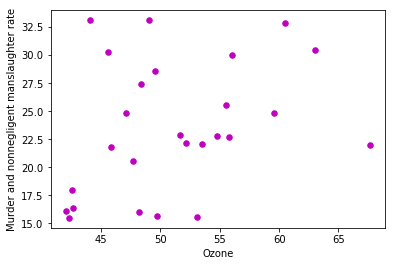

Chicago Annual Variance Ozone vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.0026208955532993627
b_1 = 0.11617935852666904


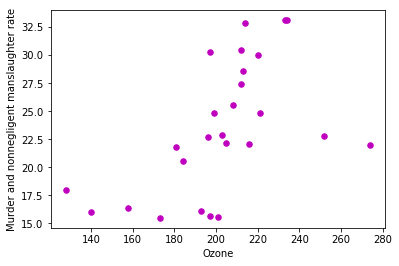

Chicago Mean Annual Ozone vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


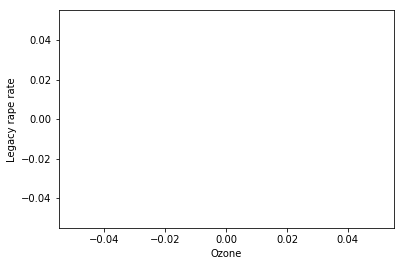

Chicago Annual Variance Ozone vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


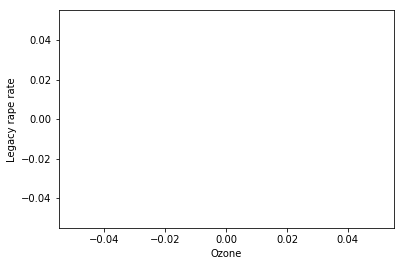

Chicago Mean Annual Ozone vs Robbery rate
Estimated coefficients:
b_0 = 0.06730519159282267
b_1 = 17.02953984290796


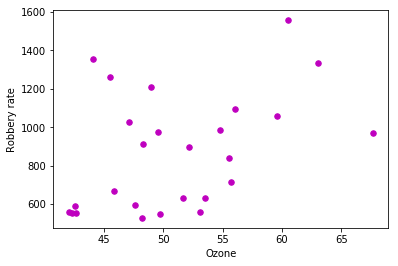

Chicago Annual Variance Ozone vs Robbery rate
Estimated coefficients:
b_0 = 0.23855468586066308
b_1 = 4.294376439621509


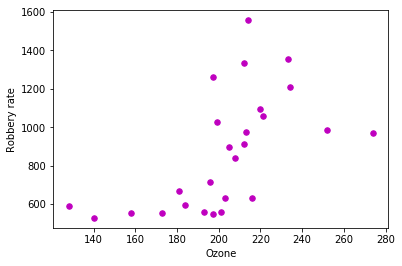

Chicago Mean Annual Ozone vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.1438252324765017
b_1 = 20.22990410525557


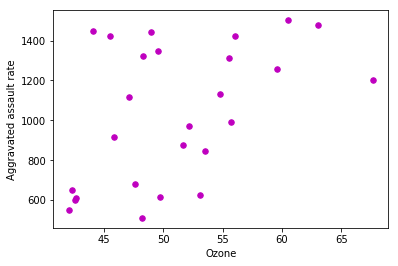

Chicago Annual Variance Ozone vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.4121809515777386
b_1 = 5.101098650315156


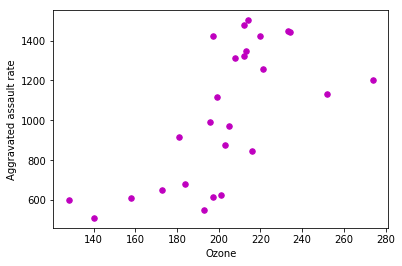

Chicago Mean Annual Ozone vs Property crime rate
Estimated coefficients:
b_0 = -0.35646597892719
b_1 = 122.61246667342128


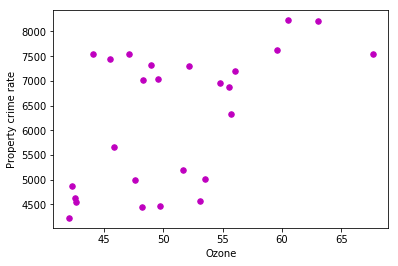

Chicago Annual Variance Ozone vs Property crime rate
Estimated coefficients:
b_0 = -0.39992436180364166
b_1 = 30.92575950482654


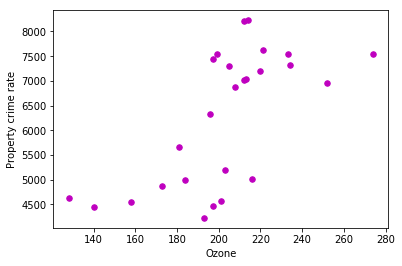

Chicago Mean Annual Ozone vs Burglary rate
Estimated coefficients:
b_0 = 0.10221054869998625
b_1 = 25.630223586216594


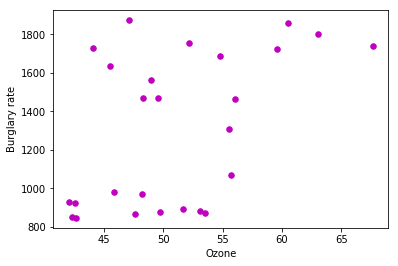

Chicago Annual Variance Ozone vs Burglary rate
Estimated coefficients:
b_0 = 0.2905403872621264
b_1 = 6.463572558877505


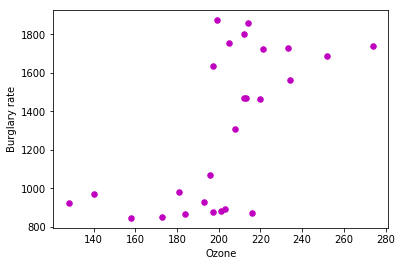

Chicago Mean Annual Ozone vs Larceny-theft rate
Estimated coefficients:
b_0 = -0.7270966398123164
b_1 = 74.30843555755634


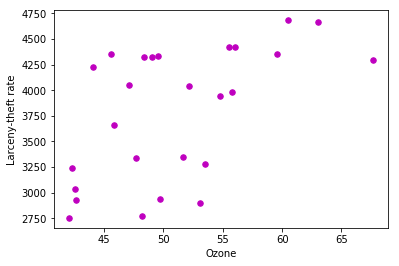

Chicago Annual Variance Ozone vs Larceny-theft rate
Estimated coefficients:
b_0 = -1.0213421437933903
b_1 = 18.743665443719348


Chicago Mean Annual Ozone vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 0.26849012004731776
b_1 = 22.67410743250899


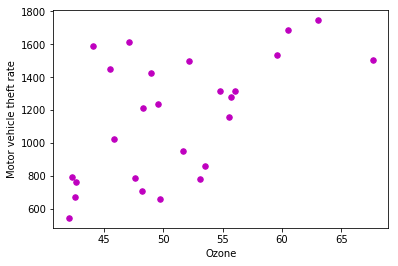

Chicago Annual Variance Ozone vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 0.3309989674216922
b_1 = 5.718596889598601


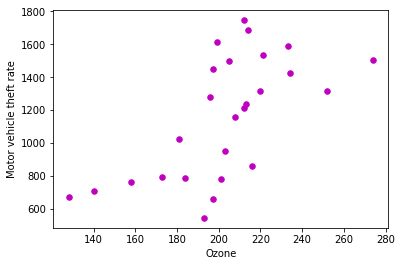

Chicago Mean Annual Sulfur Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = -22.147094806852692
b_1 = 197.15477395602022


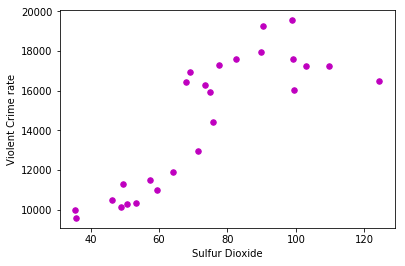

Chicago Annual Variance Sulfur Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = 1.4773209791510453
b_1 = 94.8519670844803


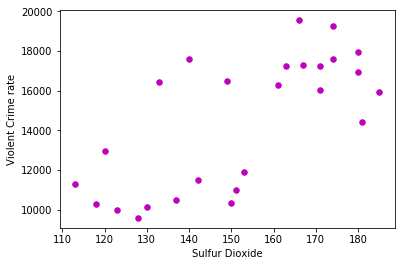

Chicago Mean Annual Sulfur Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.05131273517094925
b_1 = 0.3211434734672442


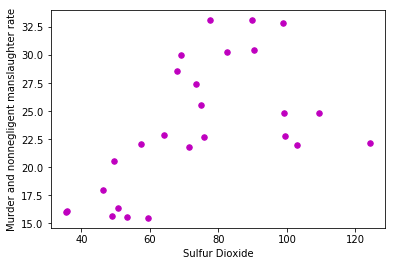

Chicago Annual Variance Sulfur Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -9.345163197949091e-05
b_1 = 0.15441980549051298


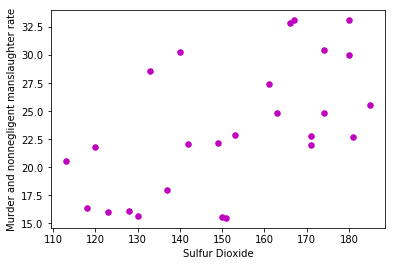

Chicago Mean Annual Sulfur Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


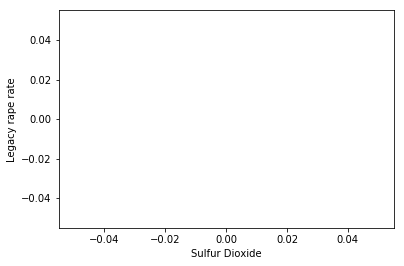

Chicago Annual Variance Sulfur Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


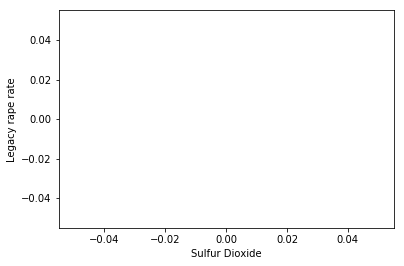

Chicago Mean Annual Sulfur Dioxide vs Robbery rate
Estimated coefficients:
b_0 = -0.7741965036052534
b_1 = 11.859809949132066


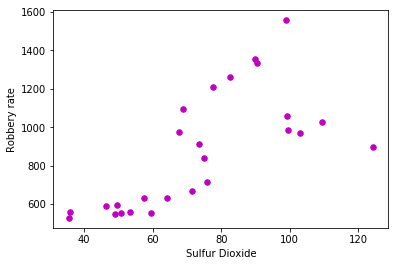

Chicago Annual Variance Sulfur Dioxide vs Robbery rate
Estimated coefficients:
b_0 = 0.3310860661881634
b_1 = 5.707876707646238


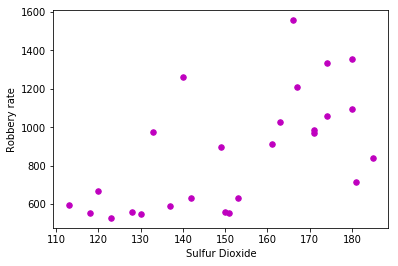

Chicago Mean Annual Sulfur Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -1.1597042204791705
b_1 = 14.092766365962953


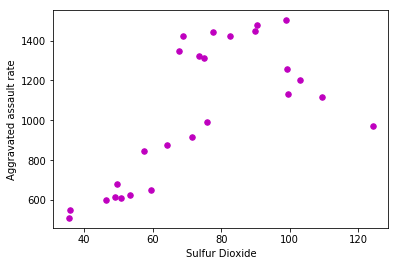

Chicago Annual Variance Sulfur Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.5069787754946447
b_1 = 6.78023195753463


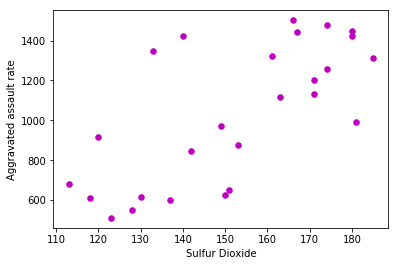

Chicago Mean Annual Sulfur Dioxide vs Property crime rate
Estimated coefficients:
b_0 = -10.080997589217077
b_1 = 85.44042305318784


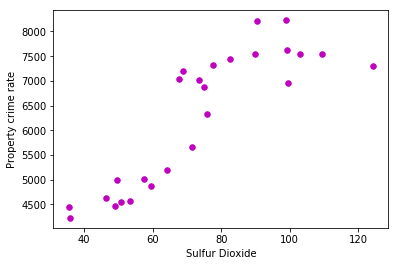

Chicago Annual Variance Sulfur Dioxide vs Property crime rate
Estimated coefficients:
b_0 = 0.31964881894327846
b_1 = 41.10466897240087


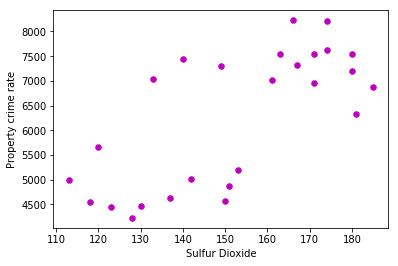

Chicago Mean Annual Sulfur Dioxide vs Burglary rate
Estimated coefficients:
b_0 = -0.8548091963823481
b_1 = 17.845330949030785


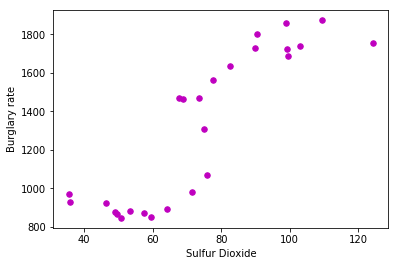

Chicago Annual Variance Sulfur Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 0.3361059201479293
b_1 = 8.591682132847513


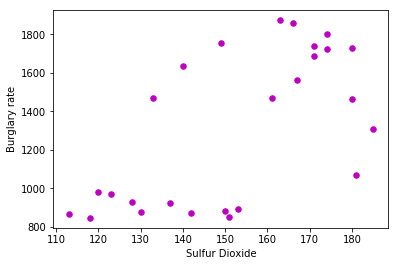

Chicago Mean Annual Sulfur Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -8.769780776418429
b_1 = 51.809858539992405


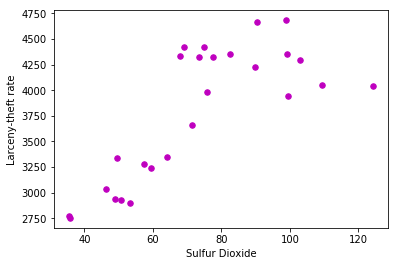

Chicago Annual Variance Sulfur Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -0.5285268628540507
b_1 = 24.912586287483386


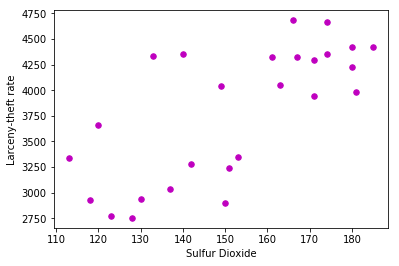

Chicago Mean Annual Sulfur Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -0.45629378557646305
b_1 = 15.785441625246932


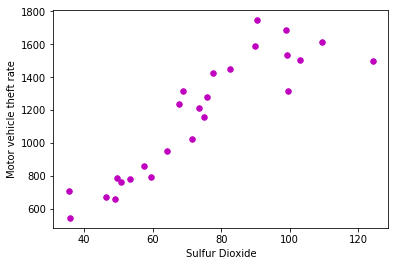

Chicago Annual Variance Sulfur Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 0.5121217128637454
b_1 = 7.600501221077156


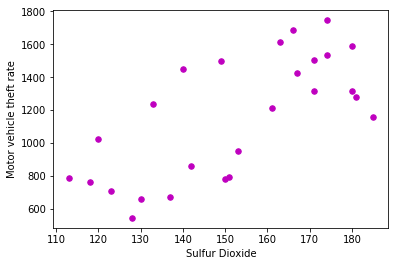

Chicago Mean Annual PM10 vs Violent Crime rate
Estimated coefficients:
b_0 = -82.43861094585009
b_1 = 411.6305035190541


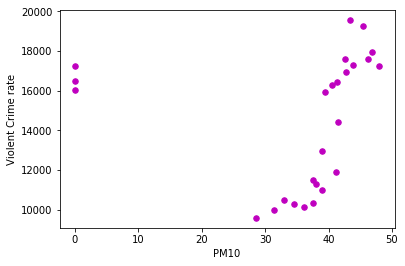

Chicago Annual Variance PM10 vs Violent Crime rate
Estimated coefficients:
b_0 = 4823715456.008172
b_1 = 58.40156499632933


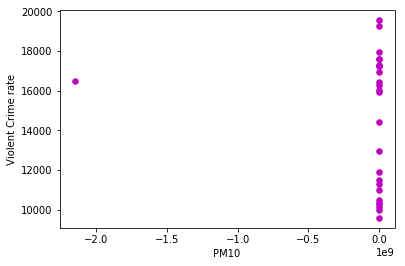

Chicago Mean Annual PM10 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.11556472943864904
b_1 = 0.6695389503291744


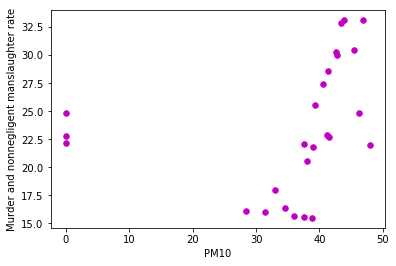

Chicago Annual Variance PM10 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 7914403.423845213
b_1 = 0.09582106595187188


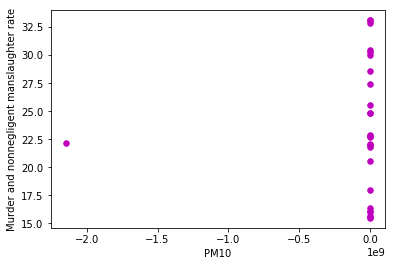

Chicago Mean Annual PM10 vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


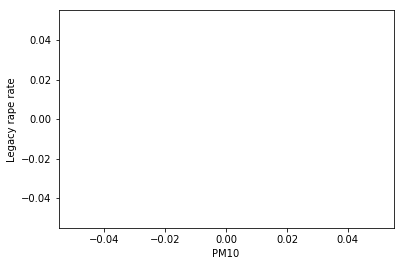

Chicago Annual Variance PM10 vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = 0.0


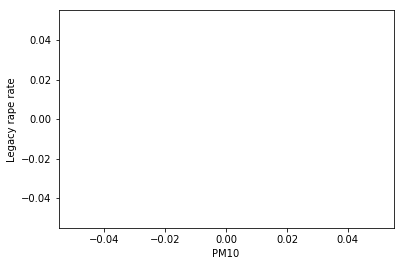

Chicago Mean Annual PM10 vs Robbery rate
Estimated coefficients:
b_0 = -4.507110355618579
b_1 = 24.764564198218554


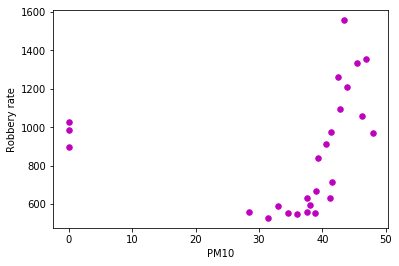

Chicago Annual Variance PM10 vs Robbery rate
Estimated coefficients:
b_0 = 291637642.1502945
b_1 = 3.5309078847897757


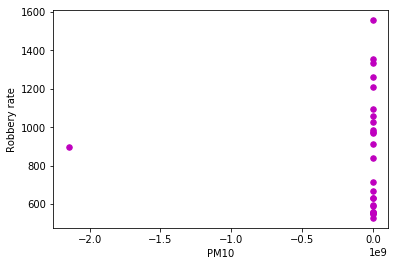

Chicago Mean Annual PM10 vs Aggravated assault rate
Estimated coefficients:
b_0 = -4.867558078976117
b_1 = 29.406598326466078


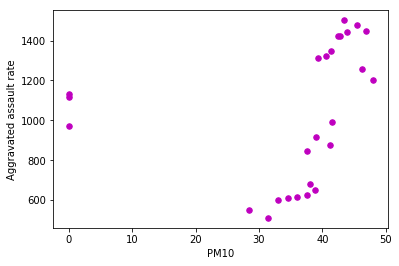

Chicago Annual Variance PM10 vs Aggravated assault rate
Estimated coefficients:
b_0 = 347743549.4547591
b_1 = 4.210191952751104


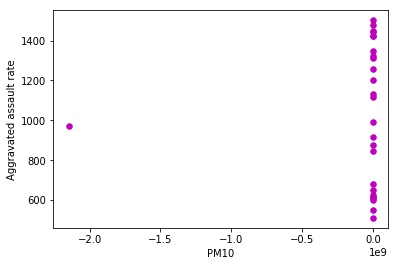

Chicago Mean Annual PM10 vs Property crime rate
Estimated coefficients:
b_0 = -36.474029036590764
b_1 = 178.39467858183406


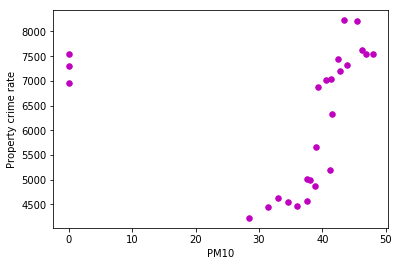

Chicago Annual Variance PM10 vs Property crime rate
Estimated coefficients:
b_0 = 2088207244.4543588
b_1 = 25.282289526116063


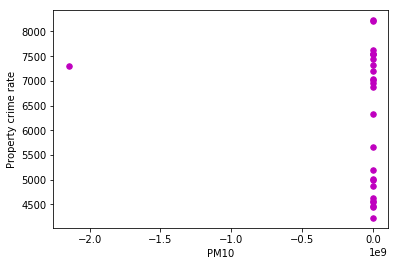

Chicago Mean Annual PM10 vs Burglary rate
Estimated coefficients:
b_0 = -8.723209533119189
b_1 = 37.326760931316905


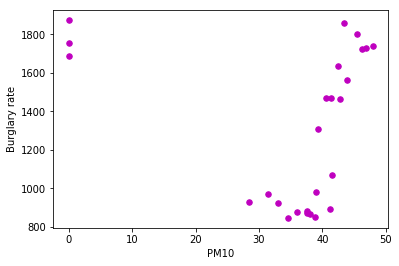

Chicago Annual Variance PM10 vs Burglary rate
Estimated coefficients:
b_0 = 433471066.0214952
b_1 = 5.248109729934673


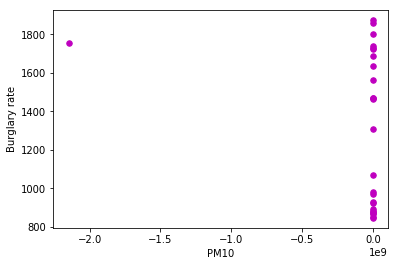

Chicago Mean Annual PM10 vs Larceny-theft rate
Estimated coefficients:
b_0 = -20.83961908882293
b_1 = 108.06453914695888


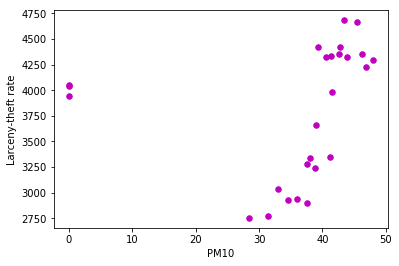

Chicago Annual Variance PM10 vs Larceny-theft rate
Estimated coefficients:
b_0 = 1270446423.3116732
b_1 = 15.381516739516053


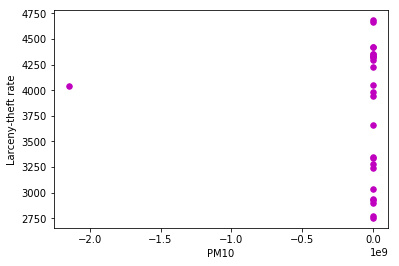

Chicago Mean Annual PM10 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -6.911520123277569
b_1 = 33.00382338393036


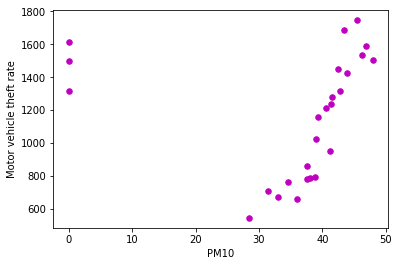

Chicago Annual Variance PM10 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 384295127.19174683
b_1 = 4.652728097269798


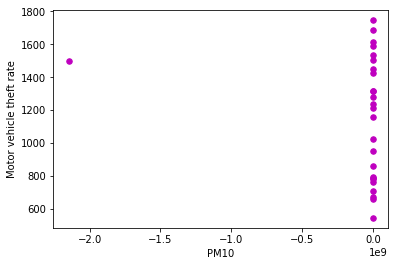

Chicago Mean Annual PM2.5 vs Violent Crime rate
Estimated coefficients:
b_0 = -840.7725122303636
b_1 = 500.18610343863725


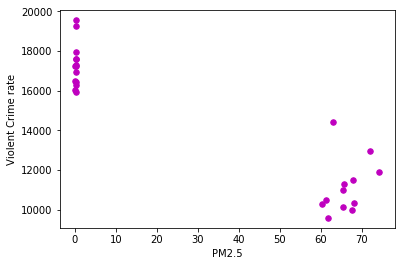

Chicago Annual Variance PM2.5 vs Violent Crime rate
Estimated coefficients:
b_0 = 9810131471.473732
b_1 = 118.77306844562737


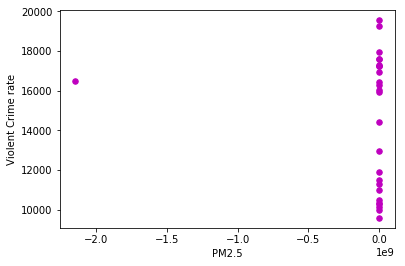

Chicago Mean Annual PM2.5 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -1.3469725730010325
b_1 = 0.8135118717776714


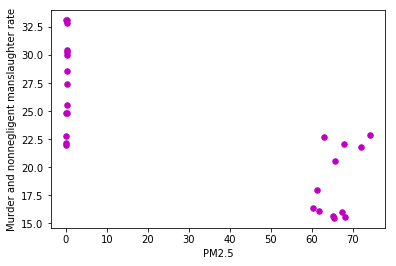

Chicago Annual Variance PM2.5 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 16095754.250619246
b_1 = 0.1948742633037552


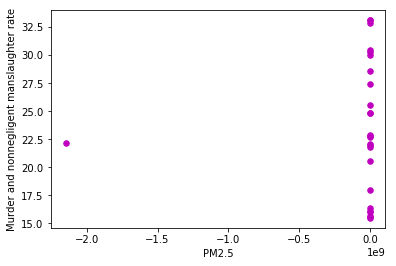

Chicago Mean Annual PM2.5 vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


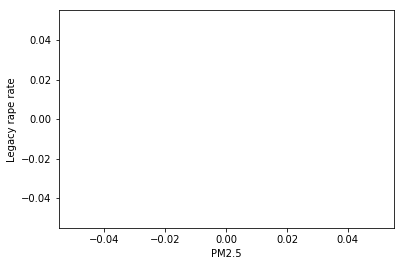

Chicago Annual Variance PM2.5 vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = 0.0


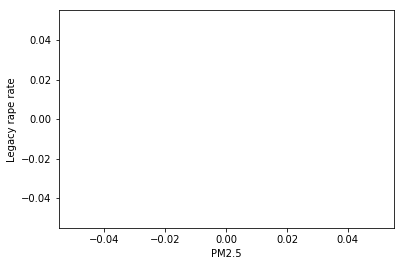

Chicago Mean Annual PM2.5 vs Robbery rate
Estimated coefficients:
b_0 = -53.84147201527185
b_1 = 30.213676999906678


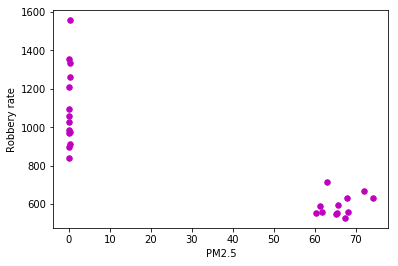

Chicago Annual Variance PM2.5 vs Robbery rate
Estimated coefficients:
b_0 = 593112019.2628416
b_1 = 7.18091649644102


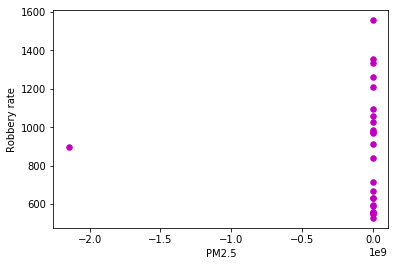

Chicago Mean Annual PM2.5 vs Aggravated assault rate
Estimated coefficients:
b_0 = -63.779359051525034
b_1 = 35.88792115652095


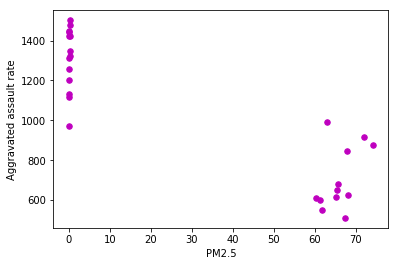

Chicago Annual Variance PM2.5 vs Aggravated assault rate
Estimated coefficients:
b_0 = 707216247.8386899
b_1 = 8.562397461297595


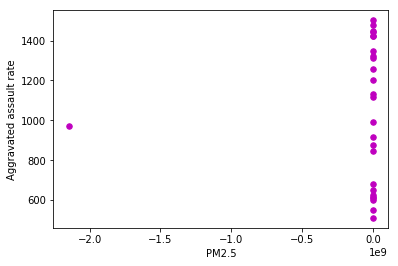

Chicago Mean Annual PM2.5 vs Property crime rate
Estimated coefficients:
b_0 = -360.9020300769889
b_1 = 216.63523444004545


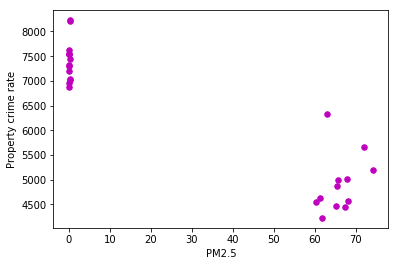

Chicago Annual Variance PM2.5 vs Property crime rate
Estimated coefficients:
b_0 = 4246848262.391835
b_1 = 51.41737397474914


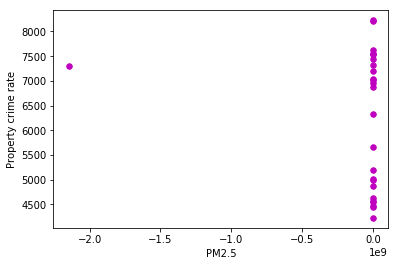

Chicago Mean Annual PM2.5 vs Burglary rate
Estimated coefficients:
b_0 = -80.34248951538802
b_1 = 45.450355167270075


Chicago Annual Variance PM2.5 vs Burglary rate
Estimated coefficients:
b_0 = 881562802.3562427
b_1 = 10.673243076577355


Chicago Mean Annual PM2.5 vs Larceny-theft rate
Estimated coefficients:
b_0 = -210.1086404802586
b_1 = 130.99176594464092


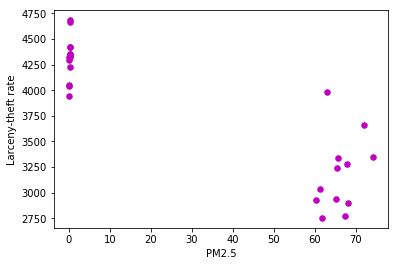

Chicago Annual Variance PM2.5 vs Larceny-theft rate
Estimated coefficients:
b_0 = 2583744128.829996
b_1 = 31.281866151347472


Chicago Mean Annual PM2.5 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -70.451548517927
b_1 = 40.19363785847546


Chicago Annual Variance PM2.5 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 781552256.5435064
b_1 = 9.462397021911041


In [8]:
print('Chicago')
for j, y in enumerate(pollution[0]):
    data = pollution_data(y, pollution_index[j])
    mean = np.array(data[0])
    variance = np.array(data[3])
    for k, z in enumerate(rates[0]):
        print('Chicago Mean Annual', pollution_index[j], 'vs', crime_index[k])
        arrays_to_reg(mean, z, pollution_index[j], crime_index[k])
        print('Chicago Annual Variance', pollution_index[j], 'vs', crime_index[k])
        arrays_to_reg(variance, z, pollution_index[j], crime_index[k])

Los Angeles
Los Angeles Mean Annual Carbon Monoxide vs Violent Crime rate
Estimated coefficients:
b_0 = -2.405646380181679
b_1 = 39.53521281295804


Los Angeles Annual Variance Carbon Monoxide vs Violent Crime rate
Estimated coefficients:
b_0 = -6.100354255723232
b_1 = 10.896562539814248


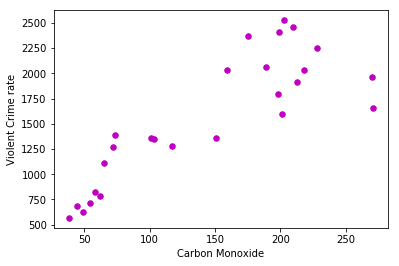

Los Angeles Mean Annual Carbon Monoxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.034531770645227056
b_1 = 0.4729538045752885


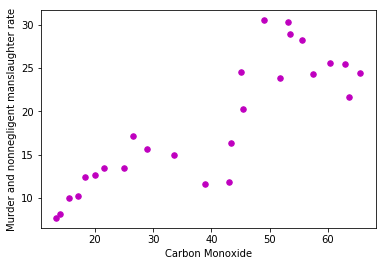

Los Angeles Annual Variance Carbon Monoxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.07838649999894187
b_1 = 0.13035153157752552


Los Angeles Mean Annual Carbon Monoxide vs Legacy rape rate
Estimated coefficients:
b_0 = -0.08752145421522073
b_1 = 1.0925932493600212


Los Angeles Annual Variance Carbon Monoxide vs Legacy rape rate
Estimated coefficients:
b_0 = -0.18852493228563105
b_1 = 0.3011291717923748


Los Angeles Mean Annual Carbon Monoxide vs Robbery rate
Estimated coefficients:
b_0 = -0.6587162680593792
b_1 = 16.220782167659806


Los Angeles Annual Variance Carbon Monoxide vs Robbery rate
Estimated coefficients:
b_0 = -2.035656055554796
b_1 = 4.469746588939647


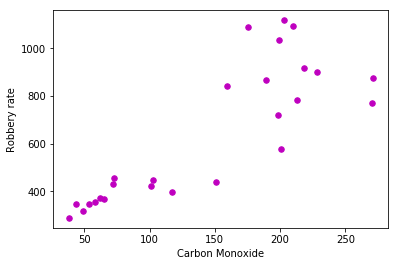

Los Angeles Mean Annual Carbon Monoxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -1.6244852916017862
b_1 = 21.749069116866437


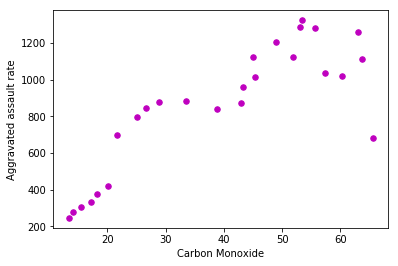

Los Angeles Annual Variance Carbon Monoxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -3.7972879692656534
b_1 = 5.99538551120691


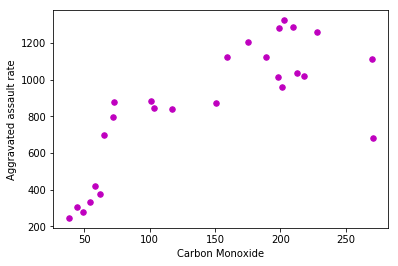

Los Angeles Mean Annual Carbon Monoxide vs Property crime rate
Estimated coefficients:
b_0 = -6.035901250903407
b_1 = 121.27525720685476


Los Angeles Annual Variance Carbon Monoxide vs Property crime rate
Estimated coefficients:
b_0 = -16.487953207495593
b_1 = 33.41931921080218


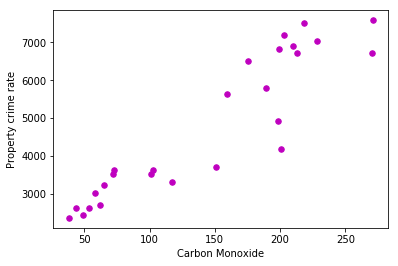

Los Angeles Mean Annual Carbon Monoxide vs Burglary rate
Estimated coefficients:
b_0 = 0.1535383198920499
b_1 = 25.987465179287565


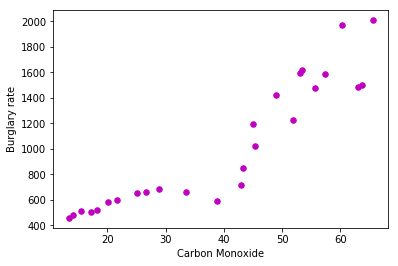

Los Angeles Annual Variance Carbon Monoxide vs Burglary rate
Estimated coefficients:
b_0 = -1.7775880182196033
b_1 = 7.159101663121126


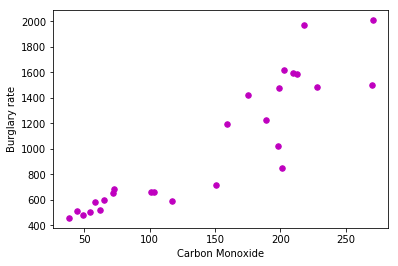

Los Angeles Mean Annual Carbon Monoxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -5.365661360319791
b_1 = 65.8983377149827


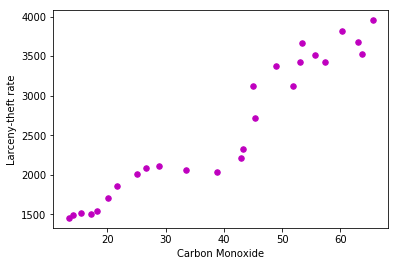

Los Angeles Annual Variance Carbon Monoxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -11.427491636140076
b_1 = 18.162003435243115


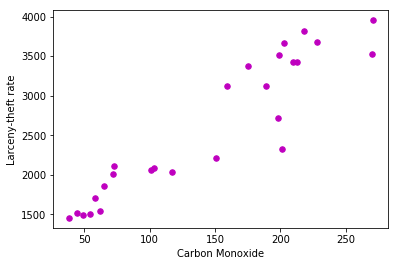

Los Angeles Mean Annual Carbon Monoxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -0.8235825391964227
b_1 = 29.3887651716633


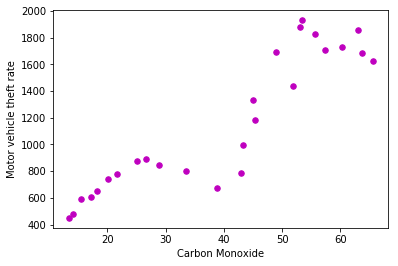

Los Angeles Annual Variance Carbon Monoxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -3.282603644472374
b_1 = 8.098024105013781


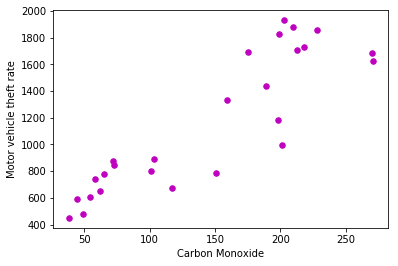

Los Angeles Mean Annual Nitrogen Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = 1.7662287239093075
b_1 = 21.276127572026304


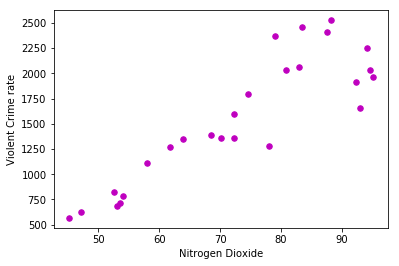

Los Angeles Annual Variance Nitrogen Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = 0.8592561122045481
b_1 = 15.998874094761273


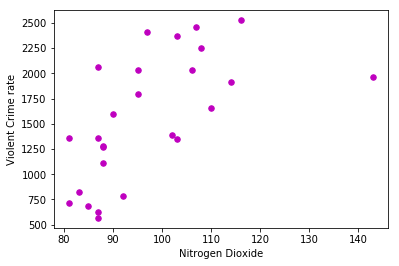

Los Angeles Mean Annual Nitrogen Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.017974105154525688
b_1 = 0.25448748436525453


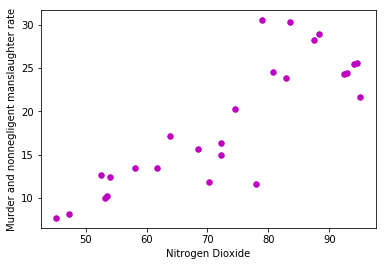

Los Angeles Annual Variance Nitrogen Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.010901726388699018
b_1 = 0.1913264189908418


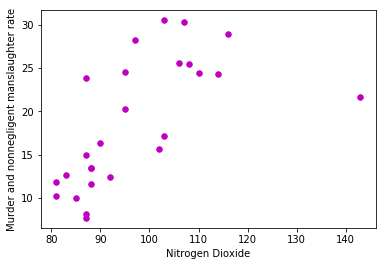

Los Angeles Mean Annual Nitrogen Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = 0.038237605697965193
b_1 = 0.5878425389183635


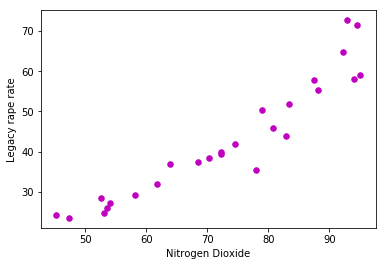

Los Angeles Annual Variance Nitrogen Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = 0.025594892640448563
b_1 = 0.44190825715075255


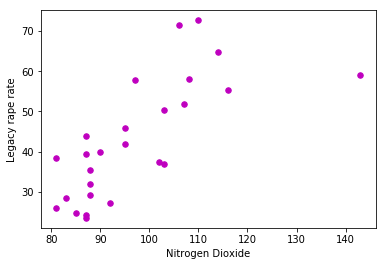

Los Angeles Mean Annual Nitrogen Dioxide vs Robbery rate
Estimated coefficients:
b_0 = 0.833191040665838
b_1 = 8.732331058084863


Los Angeles Annual Variance Nitrogen Dioxide vs Robbery rate
Estimated coefficients:
b_0 = 0.45440666386002704
b_1 = 6.566462713729544


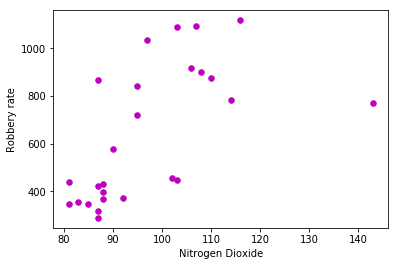

Los Angeles Mean Annual Nitrogen Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.8770382043034033
b_1 = 11.701569060349186


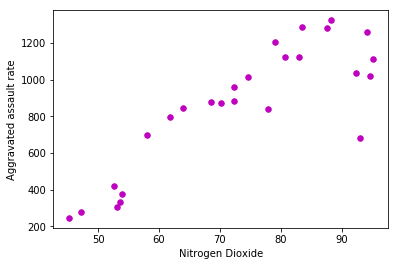

Los Angeles Annual Variance Nitrogen Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.3684226913509292
b_1 = 8.7992552556579


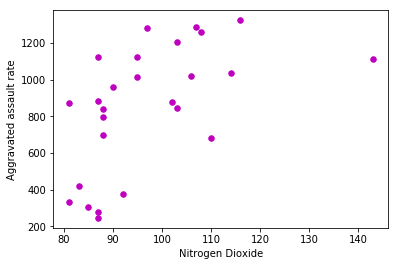

Los Angeles Mean Annual Nitrogen Dioxide vs Property crime rate
Estimated coefficients:
b_0 = 5.8590247489064495
b_1 = 65.27742926002657


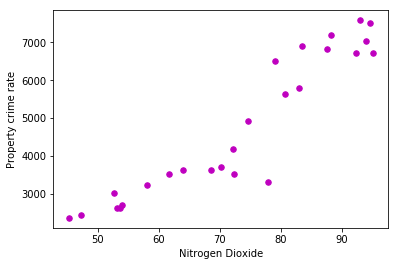

Los Angeles Annual Variance Nitrogen Dioxide vs Property crime rate
Estimated coefficients:
b_0 = 3.719683385137614
b_1 = 49.07962276337156


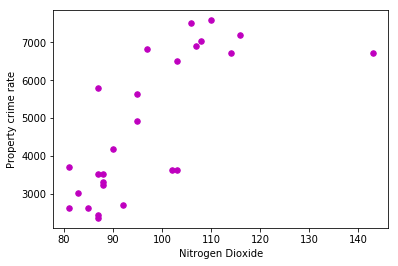

Los Angeles Mean Annual Nitrogen Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 1.935580392761608
b_1 = 13.998487652454852


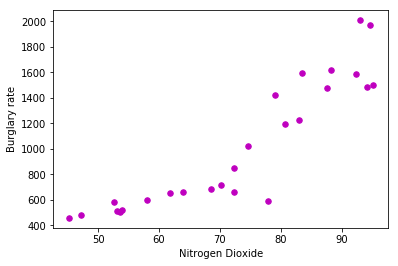

Los Angeles Annual Variance Nitrogen Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 1.1747186104767025
b_1 = 10.52804491324915


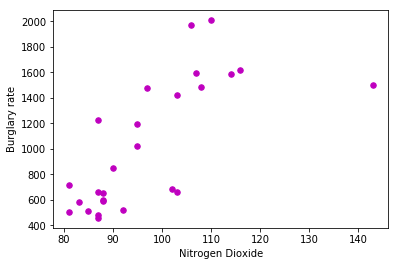

Los Angeles Mean Annual Nitrogen Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = 2.1747873402659934
b_1 = 35.4555673418934


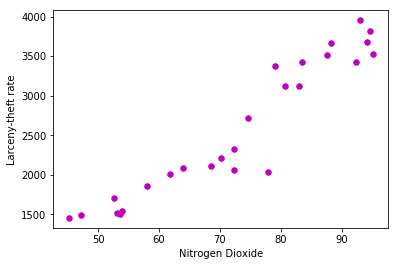

Los Angeles Annual Variance Nitrogen Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = 1.408629053142704
b_1 = 26.65361698161644


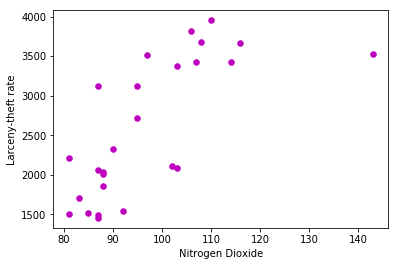

Los Angeles Mean Annual Nitrogen Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.7487309129371624
b_1 = 15.82300407273233


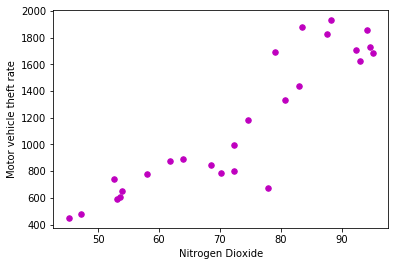

Los Angeles Annual Variance Nitrogen Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.1363847415393593
b_1 = 11.89768291586206


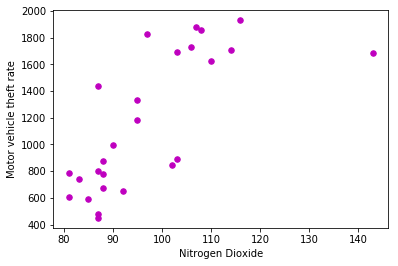

Los Angeles Mean Annual Ozone vs Violent Crime rate
Estimated coefficients:
b_0 = 0.3905984681823611
b_1 = 16.20774035528015


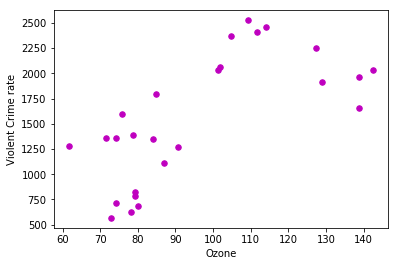

Los Angeles Annual Variance Ozone vs Violent Crime rate
Estimated coefficients:
b_0 = 1.7074967577741518
b_1 = 6.531181007657096


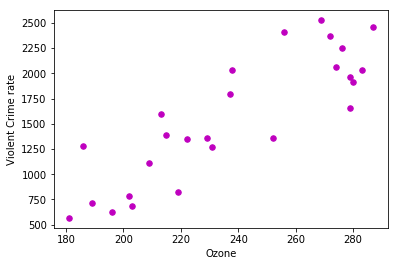

Los Angeles Mean Annual Ozone vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.010189818583768329
b_1 = 0.19377313436200516


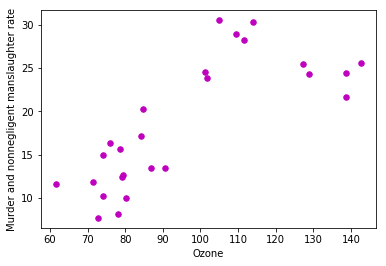

Los Angeles Annual Variance Ozone vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.0208350384619429
b_1 = 0.07810559964383836


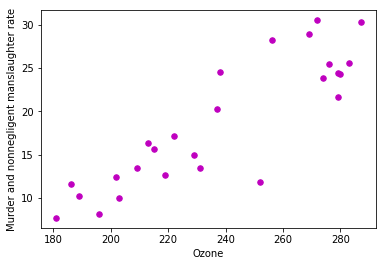

Los Angeles Mean Annual Ozone vs Legacy rape rate
Estimated coefficients:
b_0 = 0.025120668662061973
b_1 = 0.4475472448695781


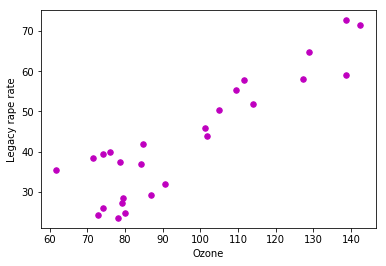

Los Angeles Annual Variance Ozone vs Legacy rape rate
Estimated coefficients:
b_0 = 0.03813344428971277
b_1 = 0.18044496202824473


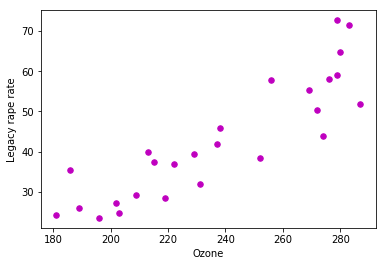

Los Angeles Mean Annual Ozone vs Robbery rate
Estimated coefficients:
b_0 = 0.572776581015205
b_1 = 6.648945400148867


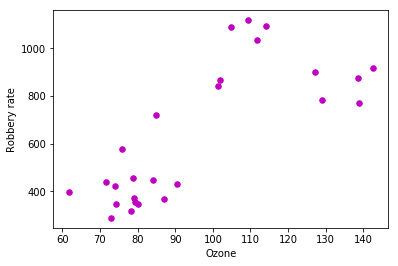

Los Angeles Annual Variance Ozone vs Robbery rate
Estimated coefficients:
b_0 = 0.8620227050545282
b_1 = 2.6803605973237143


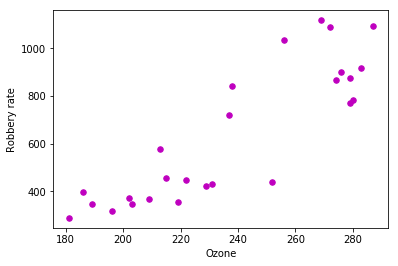

Los Angeles Mean Annual Ozone vs Aggravated assault rate
Estimated coefficients:
b_0 = -0.21731307582683712
b_1 = 8.917553025386063


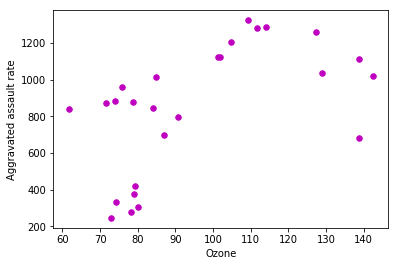

Los Angeles Annual Variance Ozone vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.7866287304797197
b_1 = 3.592301708435735


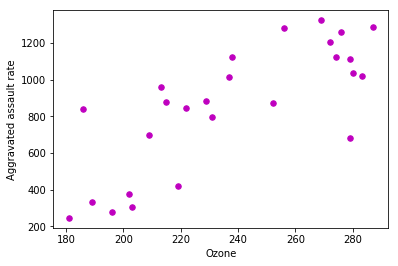

Los Angeles Mean Annual Ozone vs Property crime rate
Estimated coefficients:
b_0 = 4.743676173056883
b_1 = 49.694668562389275


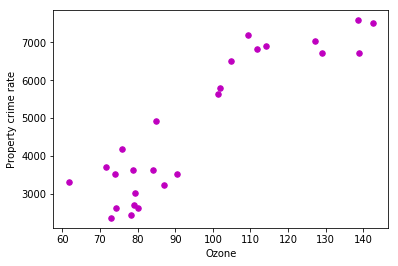

Los Angeles Annual Variance Ozone vs Property crime rate
Estimated coefficients:
b_0 = 5.811269257176718
b_1 = 20.037802654899373


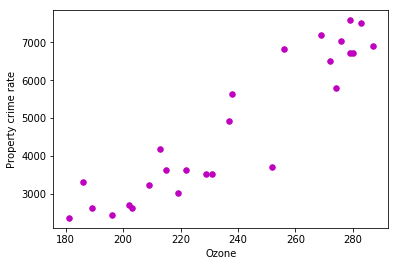

Los Angeles Mean Annual Ozone vs Burglary rate
Estimated coefficients:
b_0 = 2.0246604759108777
b_1 = 10.653400049800402


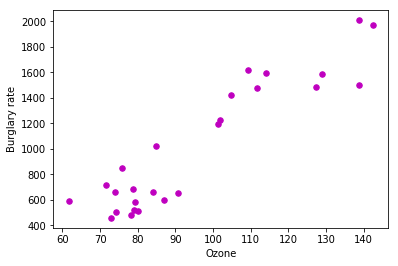

Los Angeles Annual Variance Ozone vs Burglary rate
Estimated coefficients:
b_0 = 1.7338180639990242
b_1 = 4.297834018186179


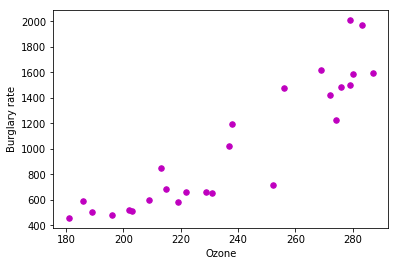

Los Angeles Mean Annual Ozone vs Larceny-theft rate
Estimated coefficients:
b_0 = 1.2203454850841808
b_1 = 26.99539803205816


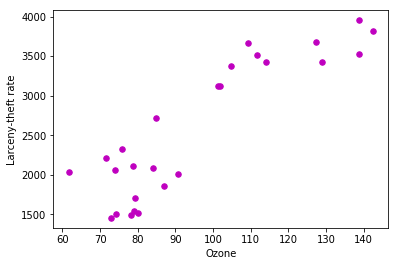

Los Angeles Annual Variance Ozone vs Larceny-theft rate
Estimated coefficients:
b_0 = 2.381879092127292
b_1 = 10.882592058216721


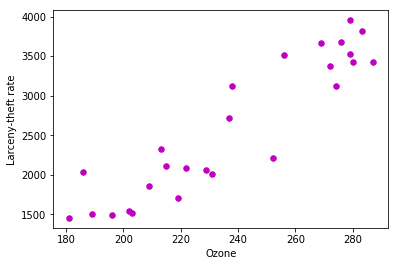

Los Angeles Mean Annual Ozone vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.498669295707714
b_1 = 12.045589505338967


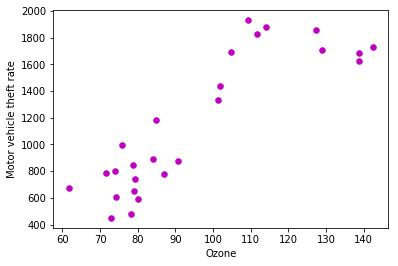

Los Angeles Annual Variance Ozone vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.6955542023154067
b_1 = 4.857263330215283


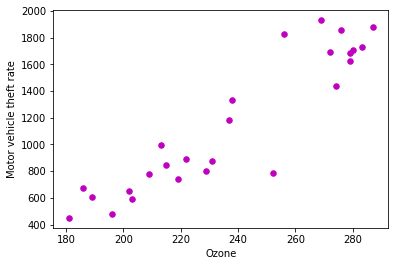

Los Angeles Mean Annual Sulfur Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = -2.600090794812104
b_1 = 77.94570532061574


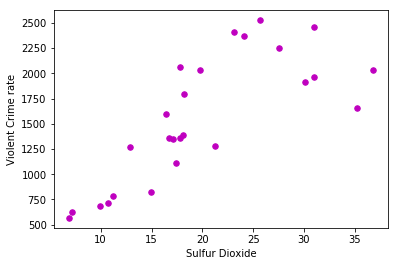

Los Angeles Annual Variance Sulfur Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = -3.61990963044218
b_1 = 16.31007963351793


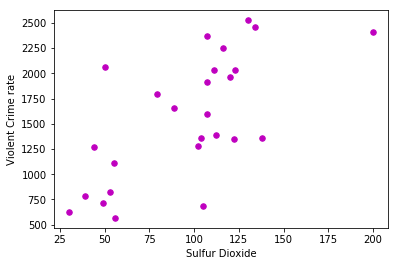

Los Angeles Mean Annual Sulfur Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.029083455038644956
b_1 = 0.9320632914116623


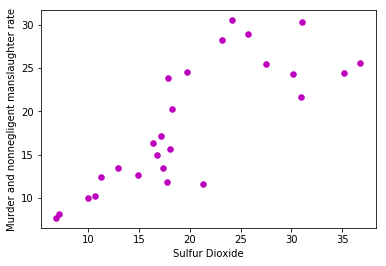

Los Angeles Annual Variance Sulfur Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.05187597701076996
b_1 = 0.19514455092759064


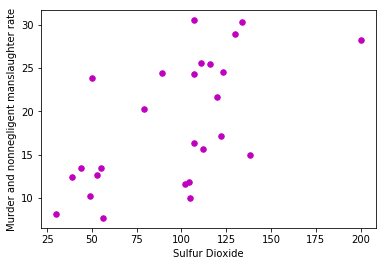

Los Angeles Mean Annual Sulfur Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = -0.05964408340275895
b_1 = 2.1524380802017102


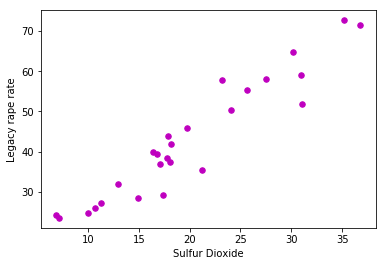

Los Angeles Annual Variance Sulfur Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = -0.14583289172808378
b_1 = 0.45100389008256664


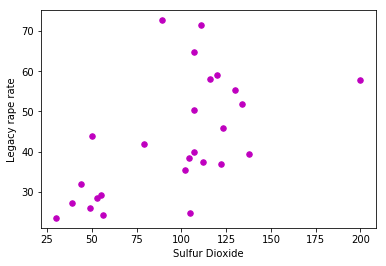

Los Angeles Mean Annual Sulfur Dioxide vs Robbery rate
Estimated coefficients:
b_0 = -0.6914544191233745
b_1 = 31.977749813596215


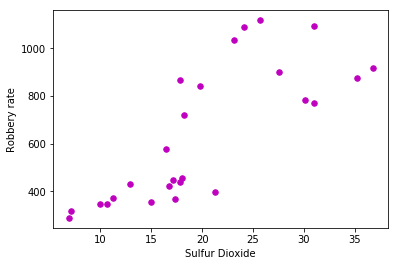

Los Angeles Annual Variance Sulfur Dioxide vs Robbery rate
Estimated coefficients:
b_0 = -1.5845517529373865
b_1 = 6.6962926452765394


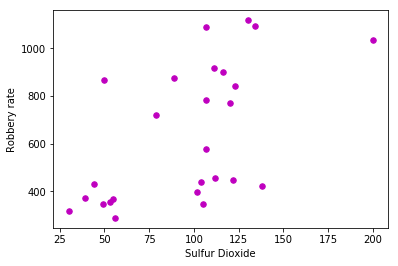

Los Angeles Mean Annual Sulfur Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -1.8195727315745671
b_1 = 42.883822642525345


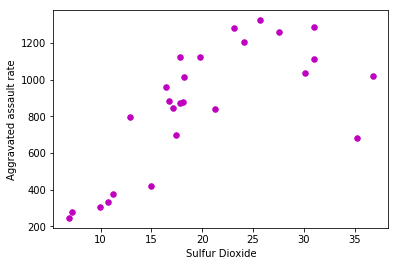

Los Angeles Annual Variance Sulfur Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -1.8373863619193571
b_1 = 8.96771637607168


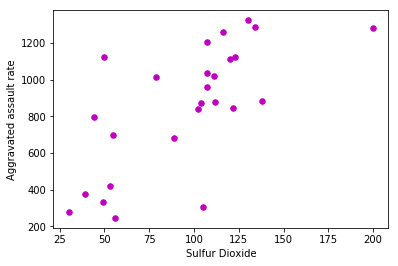

Los Angeles Mean Annual Sulfur Dioxide vs Property crime rate
Estimated coefficients:
b_0 = -4.482600483580427
b_1 = 238.99271476918503


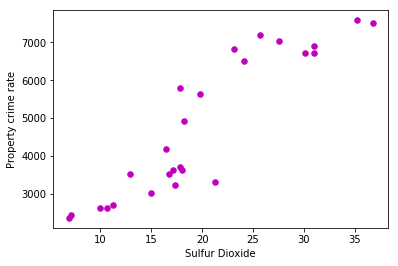

Los Angeles Annual Variance Sulfur Dioxide vs Property crime rate
Estimated coefficients:
b_0 = -14.597344124153096
b_1 = 50.082244539576145


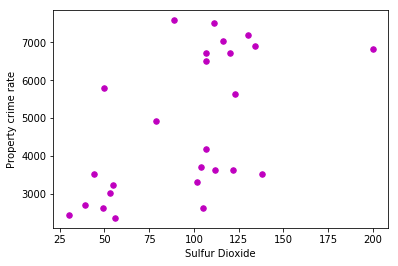

Los Angeles Mean Annual Sulfur Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 0.6454754649495271
b_1 = 51.20457787827148


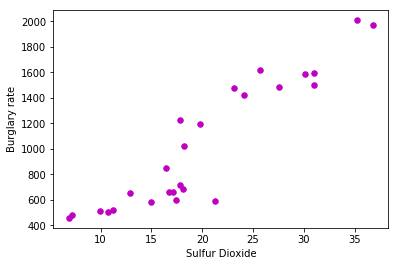

Los Angeles Annual Variance Sulfur Dioxide vs Burglary rate
Estimated coefficients:
b_0 = -2.7001889904900054
b_1 = 10.742548313357267


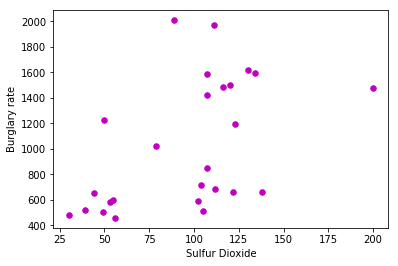

Los Angeles Mean Annual Sulfur Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -4.5173885596527725
b_1 = 129.86323191616967


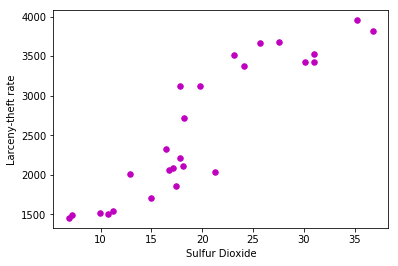

Los Angeles Annual Variance Sulfur Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -9.084997190371723
b_1 = 27.203831557997443


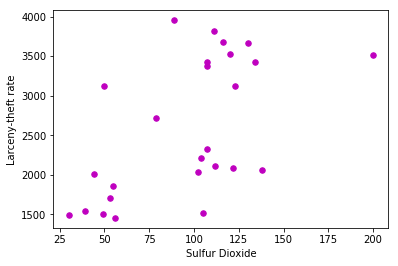

Los Angeles Mean Annual Sulfur Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -0.6106678572857618
b_1 = 57.92355529143976


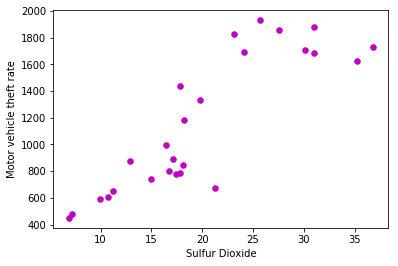

Los Angeles Annual Variance Sulfur Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -2.8118313601969476
b_1 = 12.135579216504883


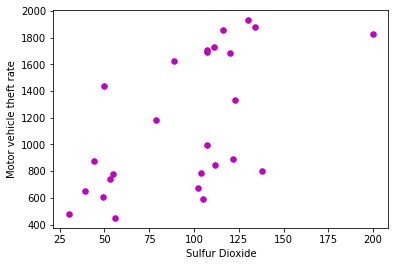

Los Angeles Mean Annual PM10 vs Violent Crime rate
Estimated coefficients:
b_0 = -30.16872067172835
b_1 = 71.60942288879906


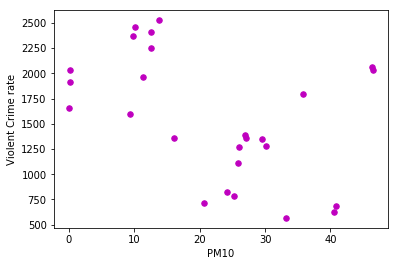

Los Angeles Annual Variance PM10 vs Violent Crime rate
Estimated coefficients:
b_0 = 533325409.22538704
b_1 = 6.457064125478472


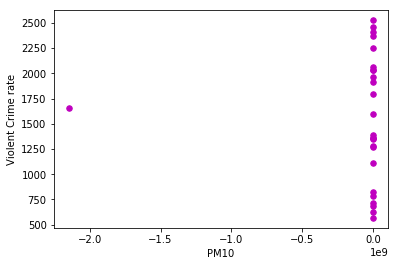

Los Angeles Mean Annual PM10 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.36721012424744615
b_1 = 0.856677757135136


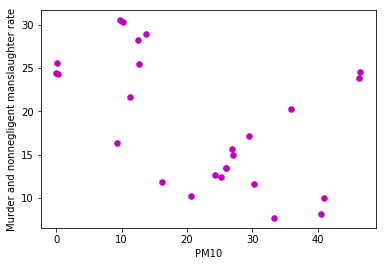

Los Angeles Annual Variance PM10 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 6315161.211563005
b_1 = 0.07645876047989333


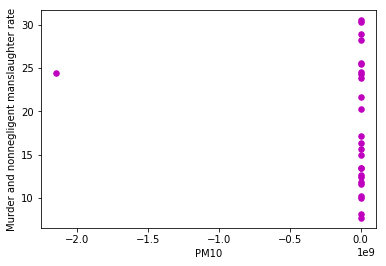

Los Angeles Mean Annual PM10 vs Legacy rape rate
Estimated coefficients:
b_0 = -0.8990542442126852
b_1 = 1.9809967014566037


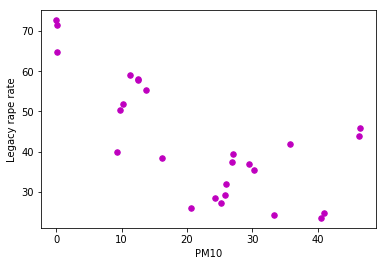

Los Angeles Annual Variance PM10 vs Legacy rape rate
Estimated coefficients:
b_0 = 14361277.26633861
b_1 = 0.17387448574801026


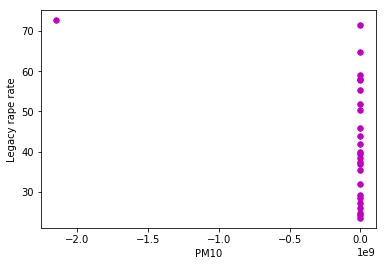

Los Angeles Mean Annual PM10 vs Robbery rate
Estimated coefficients:
b_0 = -12.925503394785096
b_1 = 29.420024241347733


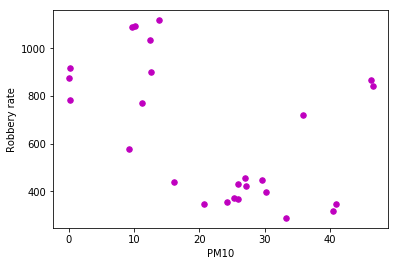

Los Angeles Annual Variance PM10 vs Robbery rate
Estimated coefficients:
b_0 = 216227485.76645565
b_1 = 2.617903940677489


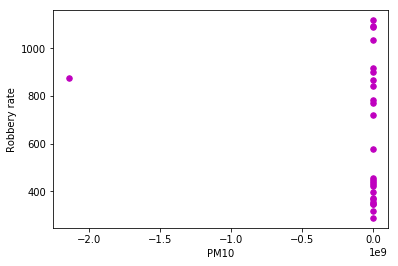

Los Angeles Mean Annual PM10 vs Aggravated assault rate
Estimated coefficients:
b_0 = -15.977412514357411
b_1 = 39.35209282874173


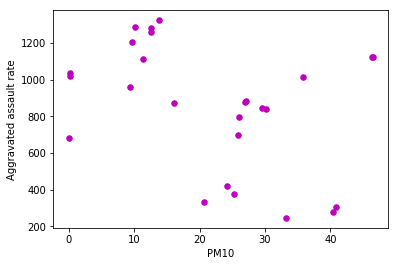

Los Angeles Annual Variance PM10 vs Aggravated assault rate
Estimated coefficients:
b_0 = 296424239.0854596
b_1 = 3.5888602830016976


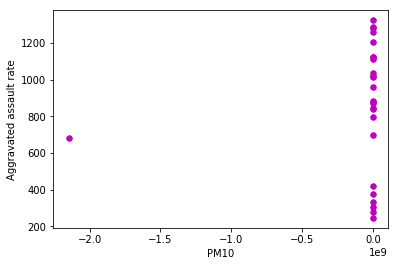

Los Angeles Mean Annual PM10 vs Property crime rate
Estimated coefficients:
b_0 = -99.37711109379052
b_1 = 220.03348844346425


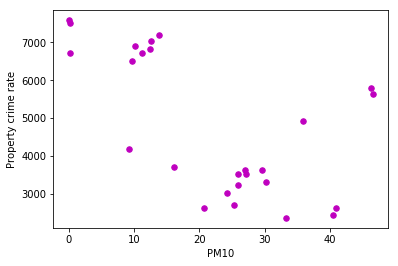

Los Angeles Annual Variance PM10 vs Property crime rate
Estimated coefficients:
b_0 = 1602109329.1035519
b_1 = 19.39701699798151


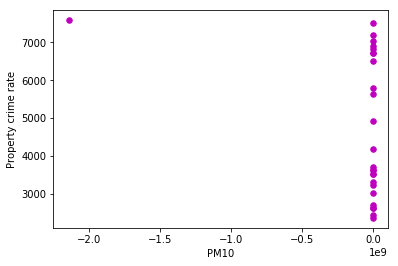

Los Angeles Mean Annual PM10 vs Burglary rate
Estimated coefficients:
b_0 = -23.343418755028097
b_1 = 47.307933707168296


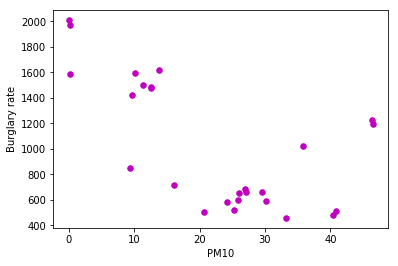

Los Angeles Annual Variance PM10 vs Burglary rate
Estimated coefficients:
b_0 = 338555172.15300864
b_1 = 4.098946312450414


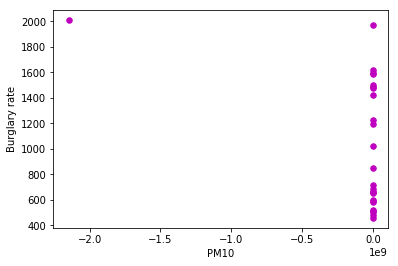

Los Angeles Mean Annual PM10 vs Larceny-theft rate
Estimated coefficients:
b_0 = -51.29887206262811
b_1 = 119.34496726758859


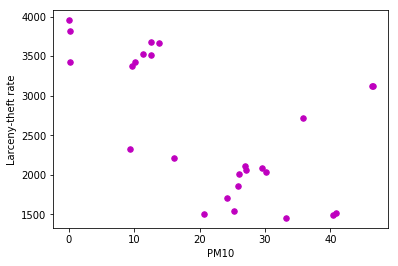

Los Angeles Annual Variance PM10 vs Larceny-theft rate
Estimated coefficients:
b_0 = 872094028.503827
b_1 = 10.558594545900421


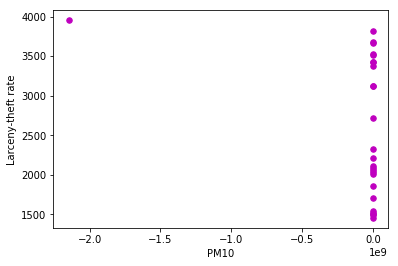

Los Angeles Mean Annual PM10 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -24.73414940055727
b_1 = 53.379339635138635


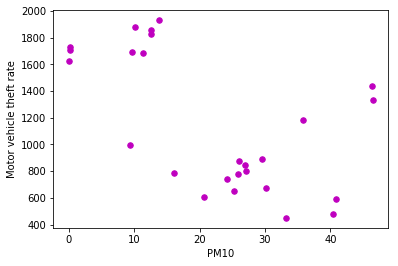

Los Angeles Annual Variance PM10 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 391451866.13263386
b_1 = 4.739376106381789


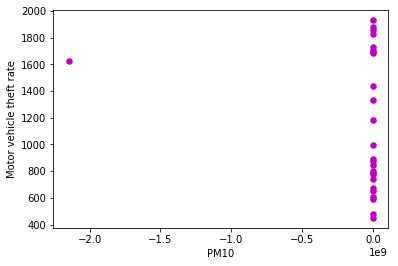

Los Angeles Mean Annual PM2.5 vs Violent Crime rate
Estimated coefficients:
b_0 = -101.39516843519164
b_1 = 51.15271094232489


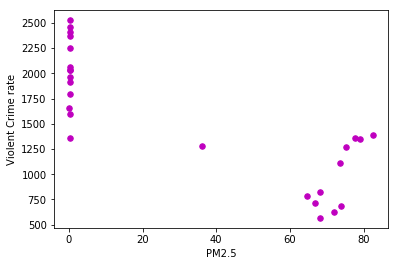

Los Angeles Annual Variance PM2.5 vs Violent Crime rate
Estimated coefficients:
b_0 = 904150584.8144127
b_1 = 10.946716271975326


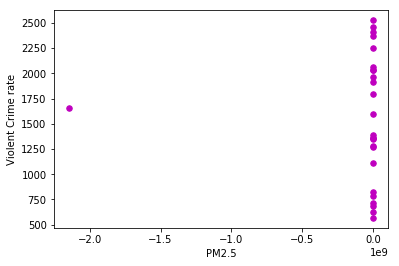

Los Angeles Mean Annual PM2.5 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -1.1950596973493361
b_1 = 0.611200525504714


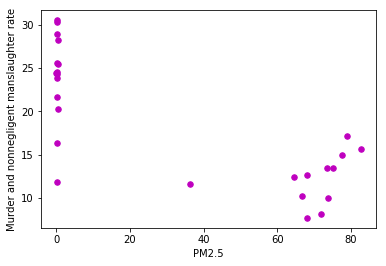

Los Angeles Annual Variance PM2.5 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 10706140.334430896
b_1 = 0.12962119426797944


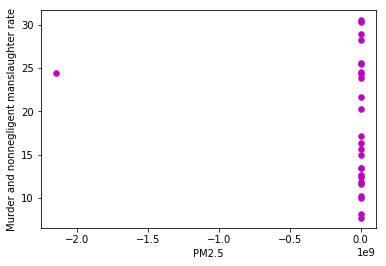

Los Angeles Mean Annual PM2.5 vs Legacy rape rate
Estimated coefficients:
b_0 = -2.6866036570515774
b_1 = 1.4094316170419794


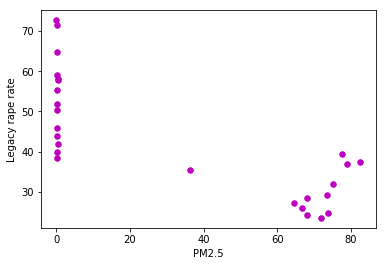

Los Angeles Annual Variance PM2.5 vs Legacy rape rate
Estimated coefficients:
b_0 = 24346781.351567194
b_1 = 0.29477091565973484


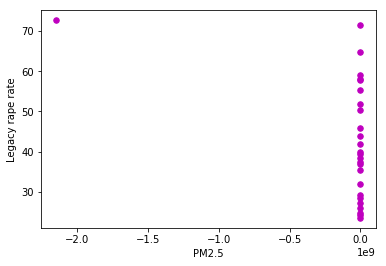

Los Angeles Mean Annual PM2.5 vs Robbery rate
Estimated coefficients:
b_0 = -42.89439772308742
b_1 = 21.037416886187767


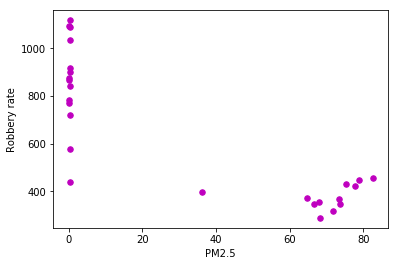

Los Angeles Annual Variance PM2.5 vs Robbery rate
Estimated coefficients:
b_0 = 366572081.8827343
b_1 = 4.438155053875194


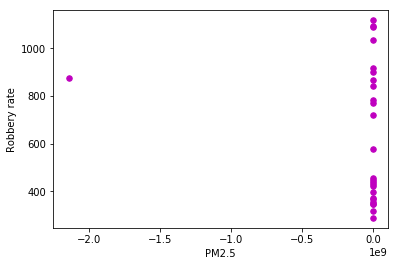

Los Angeles Mean Annual PM2.5 vs Aggravated assault rate
Estimated coefficients:
b_0 = -54.62090423083623
b_1 = 28.094955247464583


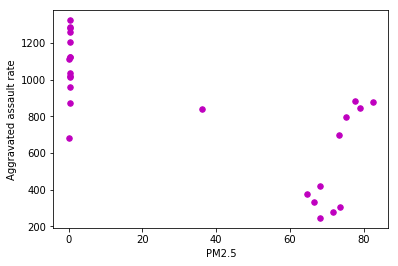

Los Angeles Annual Variance PM2.5 vs Aggravated assault rate
Estimated coefficients:
b_0 = 502530250.2986649
b_1 = 6.0842256372536845


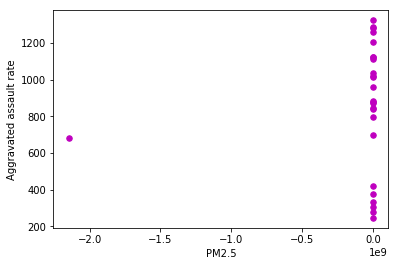

Los Angeles Mean Annual PM2.5 vs Property crime rate
Estimated coefficients:
b_0 = -311.30994591632134
b_1 = 156.96233953128345


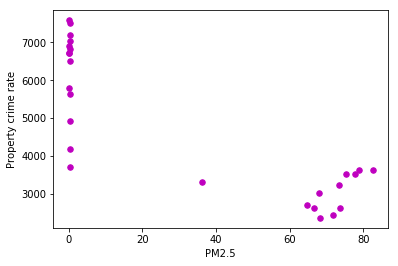

Los Angeles Annual Variance PM2.5 vs Property crime rate
Estimated coefficients:
b_0 = 2716067987.657232
b_1 = 32.883930000962756


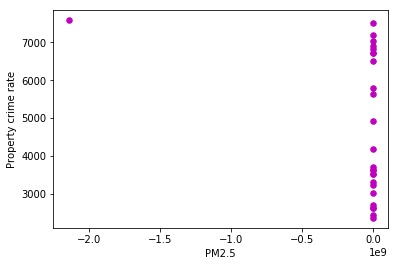

Los Angeles Mean Annual PM2.5 vs Burglary rate
Estimated coefficients:
b_0 = -70.1139116164818
b_1 = 33.78465198647673


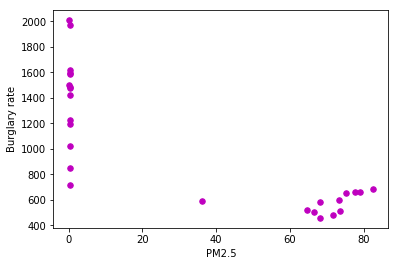

Los Angeles Annual Variance PM2.5 vs Burglary rate
Estimated coefficients:
b_0 = 573955121.3093588
b_1 = 6.948979041043779


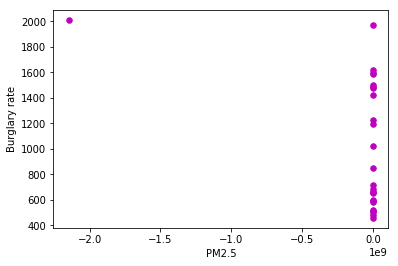

Los Angeles Mean Annual PM2.5 vs Larceny-theft rate
Estimated coefficients:
b_0 = -164.10392574477282
b_1 = 85.0691760000713


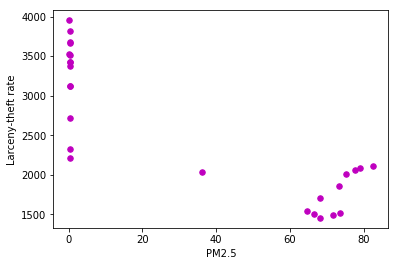

Los Angeles Annual Variance PM2.5 vs Larceny-theft rate
Estimated coefficients:
b_0 = 1478467567.244525
b_1 = 17.900076297946597


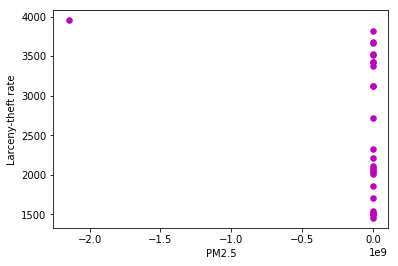

Los Angeles Mean Annual PM2.5 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -77.09068730572108
b_1 = 38.10763535202834


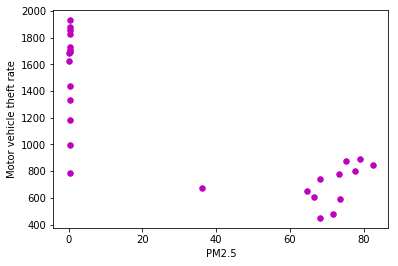

Los Angeles Annual Variance PM2.5 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 663631291.940485
b_1 = 8.03470507472781


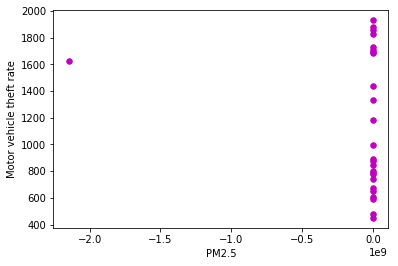

In [9]:
print('Los Angeles')
for j, y in enumerate(pollution[1]):
    data = pollution_data(y, pollution_index[j])
    mean = np.array(data[0])
    variance = np.array(data[3])
    for k, z in enumerate(rates[1]):
        print('Los Angeles Mean Annual', pollution_index[j], 'vs', crime_index[k])
        arrays_to_reg(mean, z, pollution_index[j], crime_index[k])
        print('Los Angeles Annual Variance', pollution_index[j], 'vs', crime_index[k])
        arrays_to_reg(variance, z, pollution_index[j], crime_index[k])

New York
New York Mean Annual Carbon Monoxide vs Violent Crime rate
Estimated coefficients:
b_0 = -6.6988385772574475
b_1 = 32.55187116687529


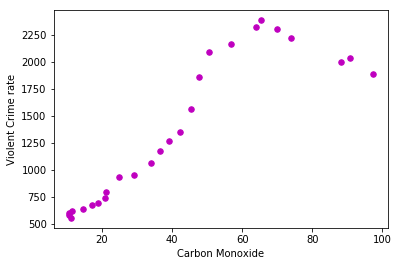

New York Annual Variance Carbon Monoxide vs Violent Crime rate
Estimated coefficients:
b_0 = -10.976225663417836
b_1 = 17.44052903043954


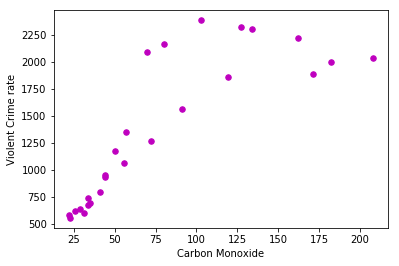

New York Mean Annual Carbon Monoxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.05329904084571169
b_1 = 0.3543941302270695


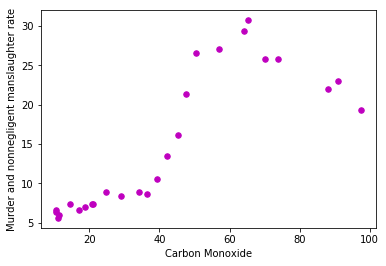

New York Annual Variance Carbon Monoxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.09951635985109064
b_1 = 0.18987160164113856


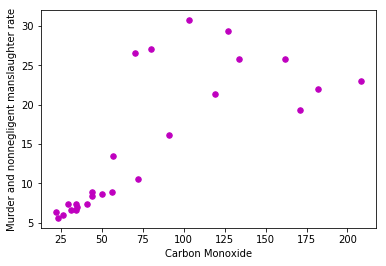

New York Mean Annual Carbon Monoxide vs Legacy rape rate
Estimated coefficients:
b_0 = -0.1289229536848211
b_1 = 0.6938469883123107


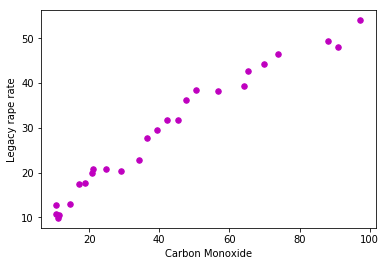

New York Annual Variance Carbon Monoxide vs Legacy rape rate
Estimated coefficients:
b_0 = -0.21465071813754477
b_1 = 0.37167771084184653


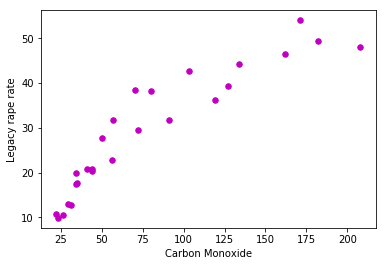

New York Mean Annual Carbon Monoxide vs Robbery rate
Estimated coefficients:
b_0 = -1.9070129568297034
b_1 = 16.81450210188957


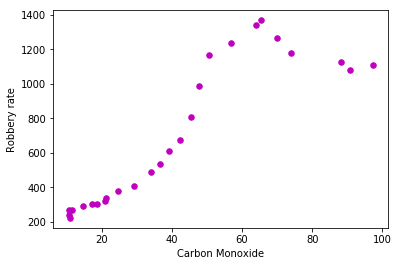

New York Annual Variance Carbon Monoxide vs Robbery rate
Estimated coefficients:
b_0 = -4.151748255825055
b_1 = 9.009264281003155


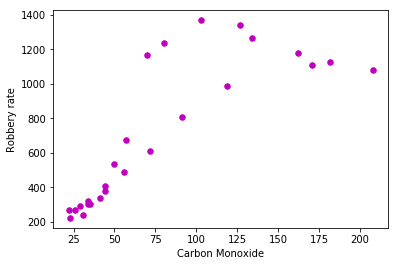

New York Mean Annual Carbon Monoxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -4.609595849069592
b_1 = 14.689402424580907


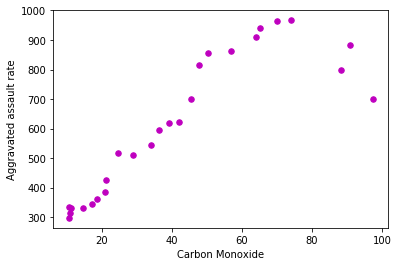

New York Annual Variance Carbon Monoxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -6.510496976573791
b_1 = 7.869864509237613


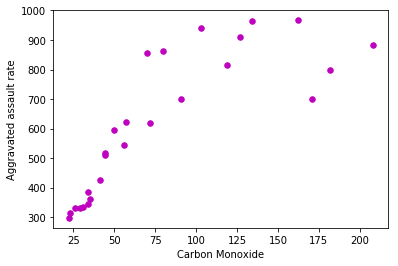

New York Mean Annual Carbon Monoxide vs Property crime rate
Estimated coefficients:
b_0 = -14.706904983305321
b_1 = 99.41022657408777


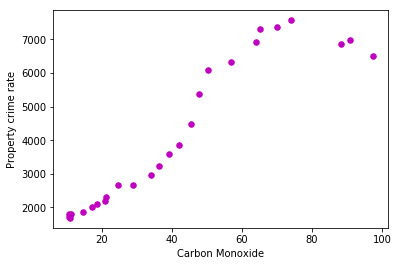

New York Annual Variance Carbon Monoxide vs Property crime rate
Estimated coefficients:
b_0 = -26.37080285758202
b_1 = 53.243883068115956


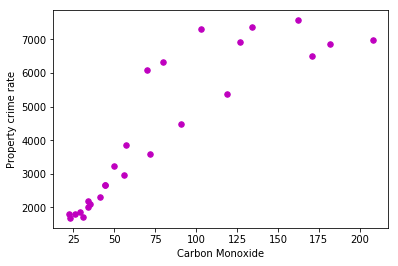

New York Mean Annual Carbon Monoxide vs Burglary rate
Estimated coefficients:
b_0 = 0.34981802784352567
b_1 = 20.90782909904373


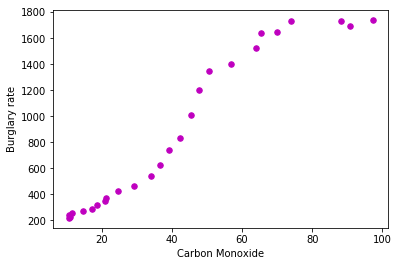

New York Annual Variance Carbon Monoxide vs Burglary rate
Estimated coefficients:
b_0 = -1.9016996254600826
b_1 = 11.195620630934945


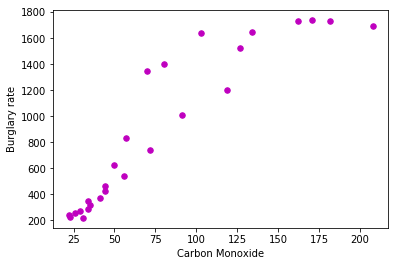

New York Mean Annual Carbon Monoxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -14.730928669083369
b_1 = 58.43195628732936


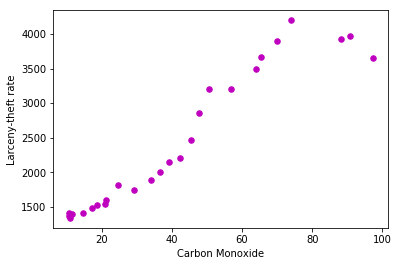

New York Annual Variance Carbon Monoxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -21.341744476615986
b_1 = 31.29290237476382


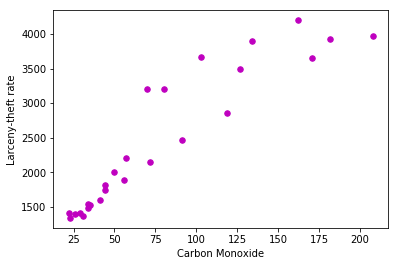

New York Mean Annual Carbon Monoxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -0.3264487034685999
b_1 = 20.070731427486184


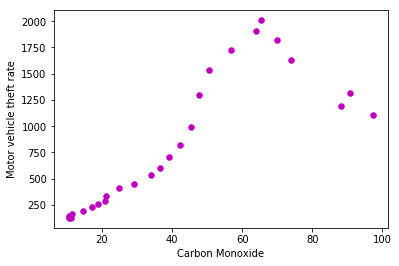

New York Annual Variance Carbon Monoxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -3.12801791577715
b_1 = 10.755515142205478


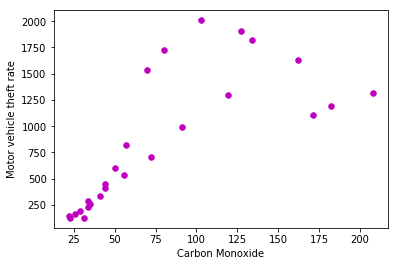

New York Mean Annual Nitrogen Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = 2.2108796470554353
b_1 = 22.730023592562034


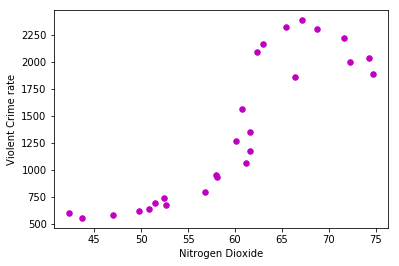

New York Annual Variance Nitrogen Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = 0.6999176930808062
b_1 = 14.728155826730486


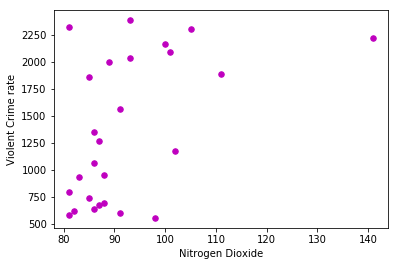

New York Mean Annual Nitrogen Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.027290473849287622
b_1 = 0.24773766993554566


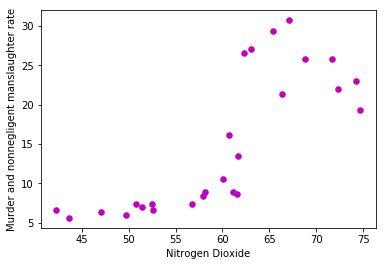

New York Annual Variance Nitrogen Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.009734178801172888
b_1 = 0.16053598973393152


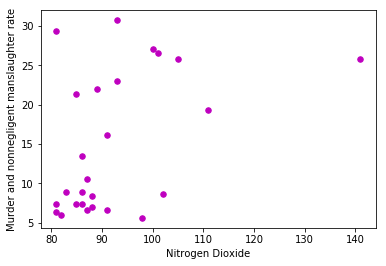

New York Mean Annual Nitrogen Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = 0.05034601521988691
b_1 = 0.4846712051527951


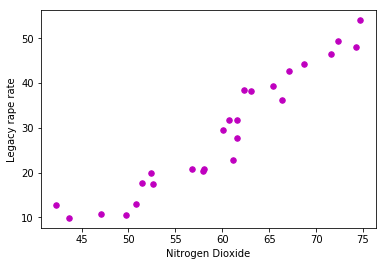

New York Annual Variance Nitrogen Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = 0.01612704207039073
b_1 = 0.31406942811585586


New York Mean Annual Nitrogen Dioxide vs Robbery rate
Estimated coefficients:
b_0 = 1.459362200834562
b_1 = 11.761754547562902


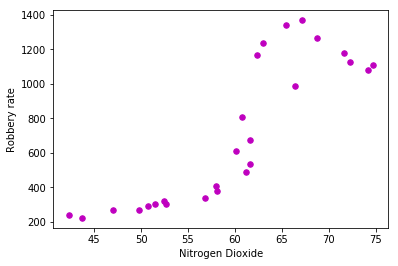

New York Annual Variance Nitrogen Dioxide vs Robbery rate
Estimated coefficients:
b_0 = 0.5068035576719012
b_1 = 7.623000044773234


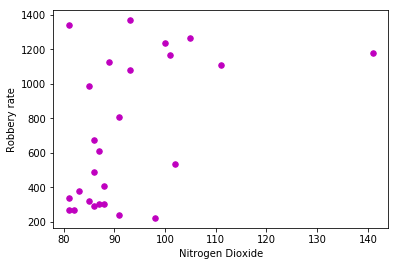

New York Mean Annual Nitrogen Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.6738920375146336
b_1 = 10.236053031657942


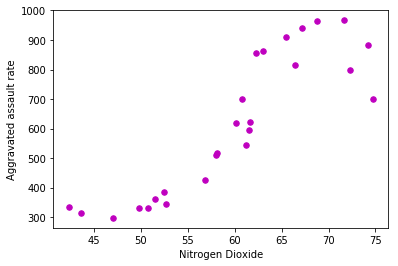

New York Annual Variance Nitrogen Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.16721773061055956
b_1 = 6.630675693046284


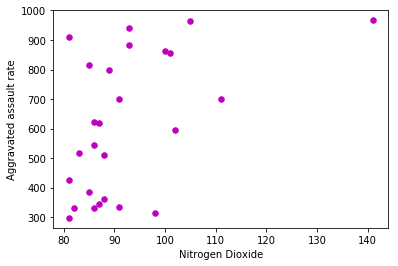

New York Mean Annual Nitrogen Dioxide vs Property crime rate
Estimated coefficients:
b_0 = 7.833175998610386
b_1 = 69.49338731561036


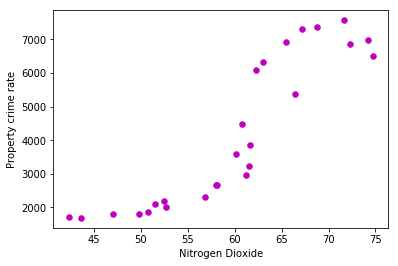

New York Annual Variance Nitrogen Dioxide vs Property crime rate
Estimated coefficients:
b_0 = 3.1552989806095866
b_1 = 45.029596928989655


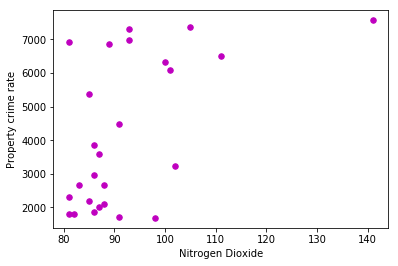

New York Mean Annual Nitrogen Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 2.397856703584239
b_1 = 14.66080709546575


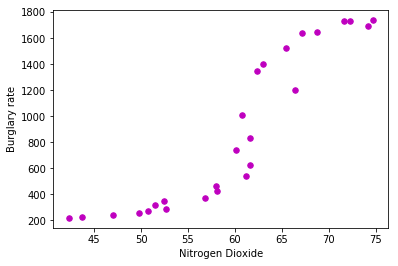

New York Annual Variance Nitrogen Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 1.028878276972705
b_1 = 9.503893862889926


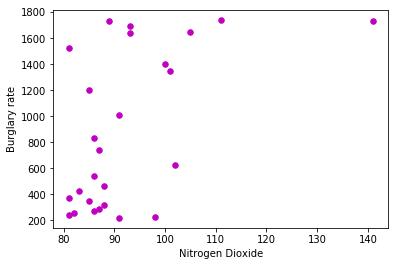

New York Mean Annual Nitrogen Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = 3.1848503389664984
b_1 = 40.769168998716914


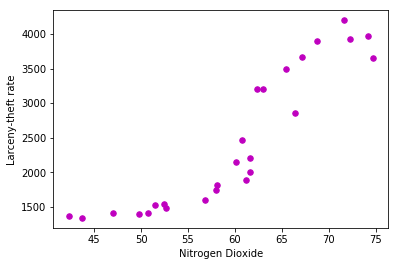

New York Annual Variance Nitrogen Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = 1.235413767423779
b_1 = 26.408571112889206


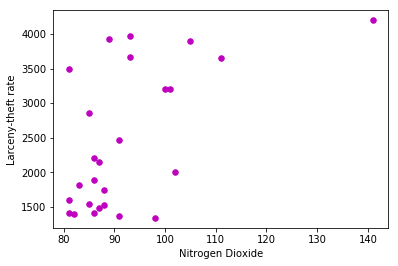

New York Mean Annual Nitrogen Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 2.250374932320824
b_1 = 14.063605841645424


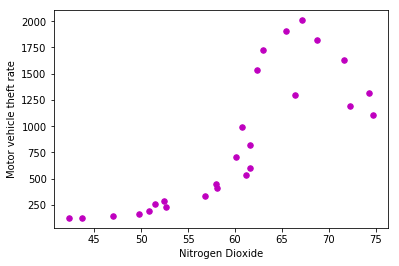

New York Annual Variance Nitrogen Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 0.8909450772165428
b_1 = 9.117257571008901


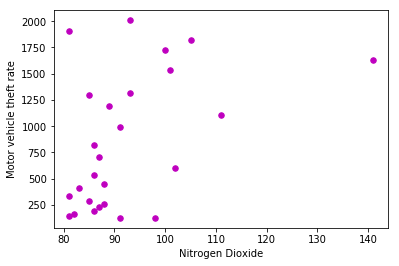

New York Mean Annual Ozone vs Violent Crime rate
Estimated coefficients:
b_0 = 1.2462555993959086
b_1 = 22.278840949862865


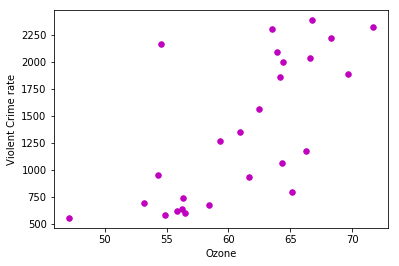

New York Annual Variance Ozone vs Violent Crime rate
Estimated coefficients:
b_0 = 1.2376692471702881
b_1 = 6.345058445444906


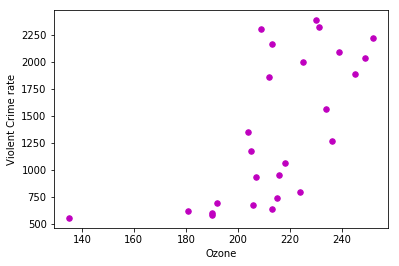

New York Mean Annual Ozone vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.015268834100780282
b_1 = 0.24284488067935084


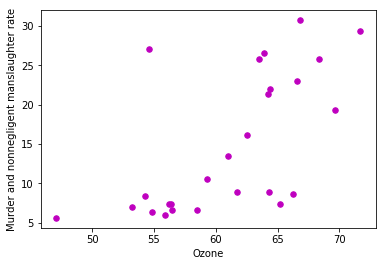

New York Annual Variance Ozone vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.015585483739075201
b_1 = 0.06916079293175087


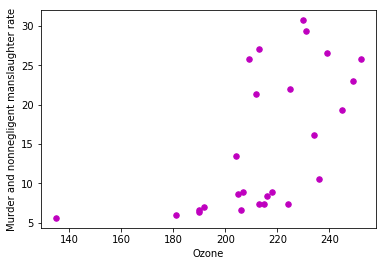

New York Mean Annual Ozone vs Legacy rape rate
Estimated coefficients:
b_0 = 0.02766275844202326
b_1 = 0.4750853116423542


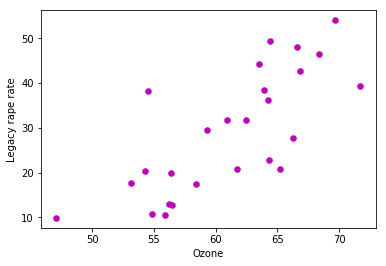

New York Annual Variance Ozone vs Legacy rape rate
Estimated coefficients:
b_0 = 0.029287444372151583
b_1 = 0.13529680962956814


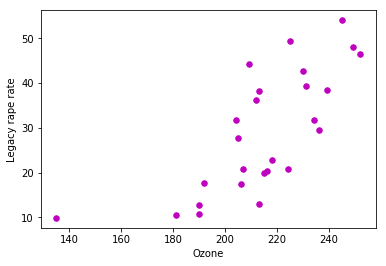

New York Mean Annual Ozone vs Robbery rate
Estimated coefficients:
b_0 = 0.8042845169478596
b_1 = 11.530843231910247


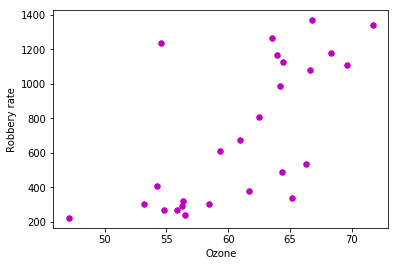

New York Annual Variance Ozone vs Robbery rate
Estimated coefficients:
b_0 = 0.8114970266256023
b_1 = 3.283952805117167


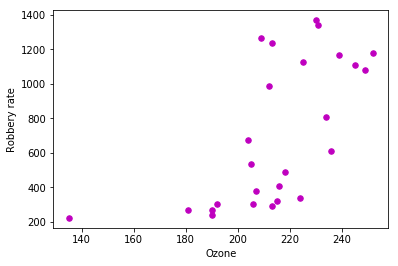

New York Mean Annual Ozone vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.39901128920234896
b_1 = 10.030257068719223


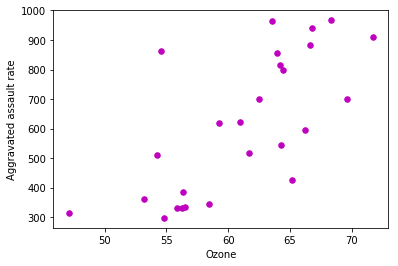

New York Annual Variance Ozone vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.3813323366895247
b_1 = 2.856701733844206


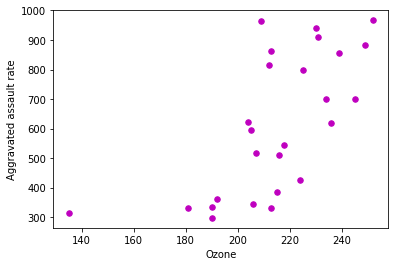

New York Mean Annual Ozone vs Property crime rate
Estimated coefficients:
b_0 = 4.253879909016177
b_1 = 68.12429471015952


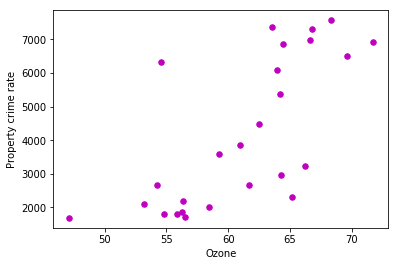

New York Annual Variance Ozone vs Property crime rate
Estimated coefficients:
b_0 = 4.302708232738951
b_1 = 19.401584919394868


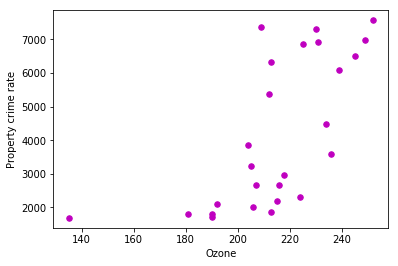

New York Mean Annual Ozone vs Burglary rate
Estimated coefficients:
b_0 = 1.2492541780603688
b_1 = 14.378421938658697


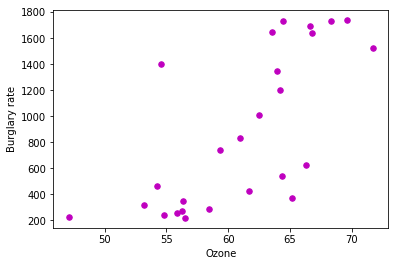

New York Annual Variance Ozone vs Burglary rate
Estimated coefficients:
b_0 = 1.3161921400957226
b_1 = 4.094665051939959


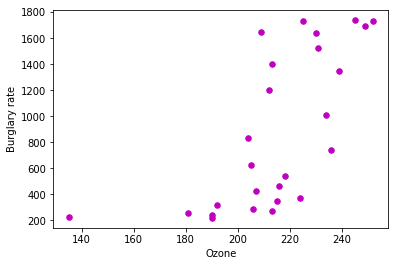

New York Mean Annual Ozone vs Larceny-theft rate
Estimated coefficients:
b_0 = 1.7637919042945214
b_1 = 39.954850427164544


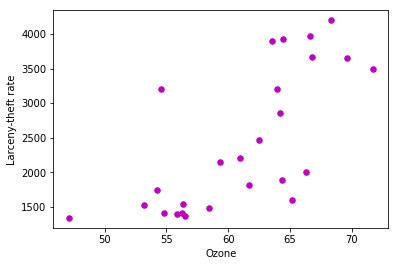

New York Annual Variance Ozone vs Larceny-theft rate
Estimated coefficients:
b_0 = 1.729278191568028
b_1 = 11.379310494887674


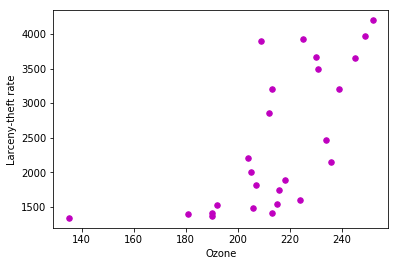

New York Mean Annual Ozone vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.240791965705057
b_1 = 13.791212111275373


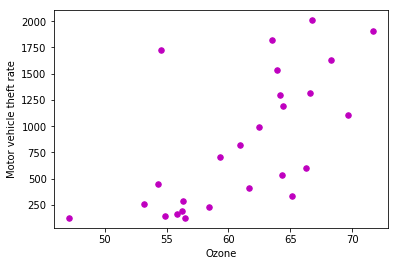

New York Annual Variance Ozone vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.2571768388335158
b_1 = 3.9276635078424573


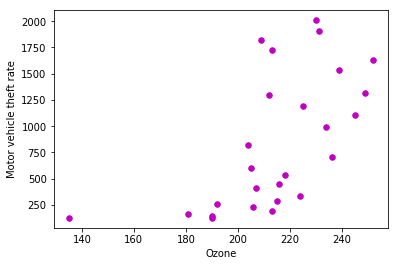

New York Mean Annual Sulfur Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = 1.8984208170663806
b_1 = 25.331410579835314


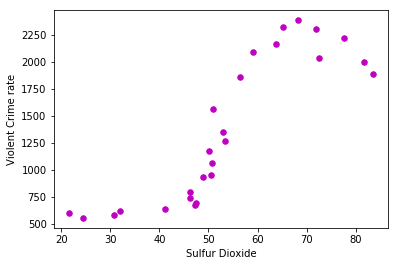

New York Annual Variance Sulfur Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = 1.205473672799144
b_1 = 10.60899090171285


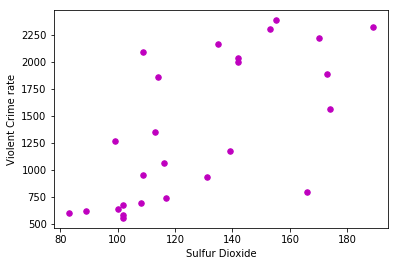

New York Mean Annual Sulfur Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.02908346068013401
b_1 = 0.27599363949930966


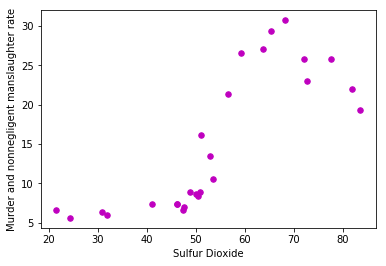

New York Annual Variance Sulfur Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.01870316391770288
b_1 = 0.11561035946522802


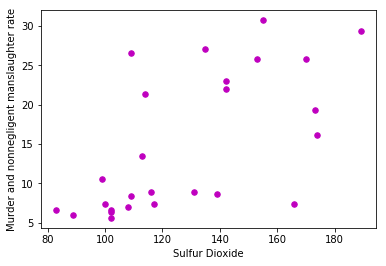

New York Mean Annual Sulfur Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = 0.04803381042399835
b_1 = 0.5400593595955817


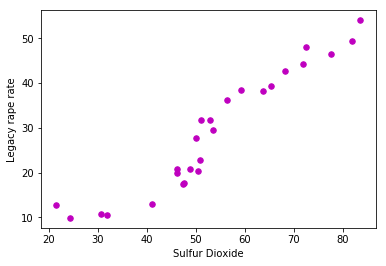

New York Annual Variance Sulfur Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = 0.024587491407984885
b_1 = 0.22624871705383925


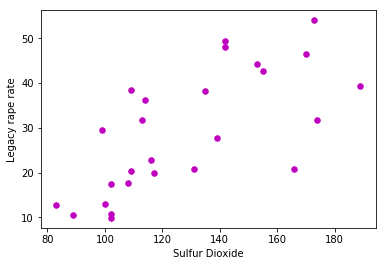

New York Mean Annual Sulfur Dioxide vs Robbery rate
Estimated coefficients:
b_0 = 1.6705718643911496
b_1 = 13.100902937827655


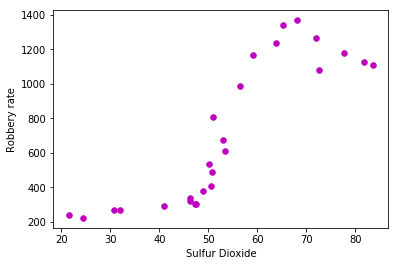

New York Annual Variance Sulfur Dioxide vs Robbery rate
Estimated coefficients:
b_0 = 1.0322194467826193
b_1 = 5.488944266021504


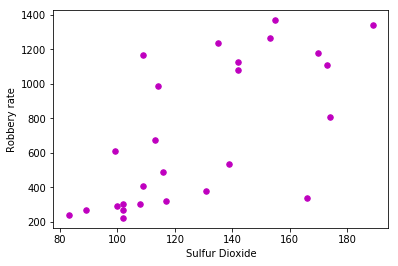

New York Mean Annual Sulfur Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.15078291464499216
b_1 = 11.41466877922398


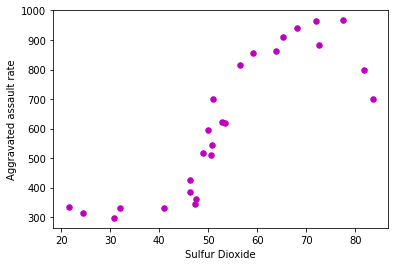

New York Annual Variance Sulfur Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.1300859469047282
b_1 = 4.778276640270251


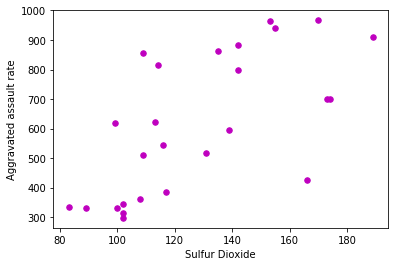

New York Mean Annual Sulfur Dioxide vs Property crime rate
Estimated coefficients:
b_0 = 8.286511664507088
b_1 = 77.420450580656


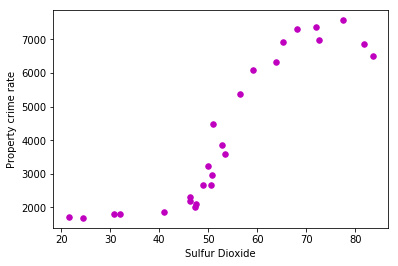

New York Annual Variance Sulfur Dioxide vs Property crime rate
Estimated coefficients:
b_0 = 4.9192845081597625
b_1 = 32.434033194114


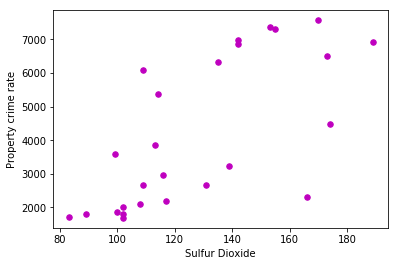

New York Mean Annual Sulfur Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 3.2459515433060915
b_1 = 16.319128634167953


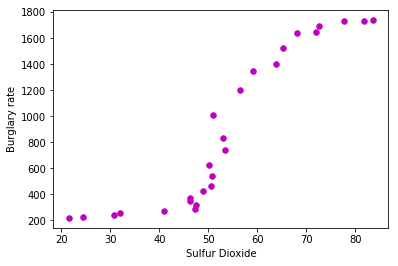

New York Annual Variance Sulfur Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 1.8346371165908977
b_1 = 6.842106673159855


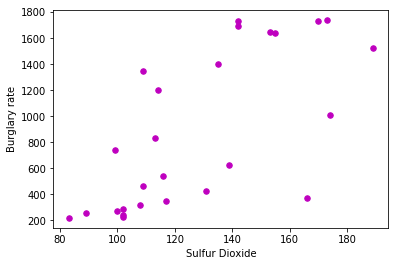

New York Mean Annual Sulfur Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = 2.0549988145544376
b_1 = 45.44569986456096


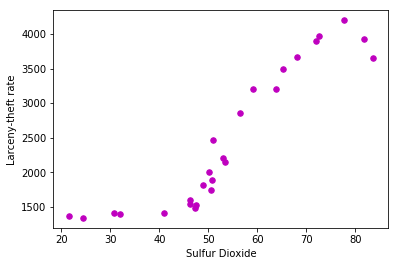

New York Annual Variance Sulfur Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = 1.0945050912841907
b_1 = 19.030805182360925


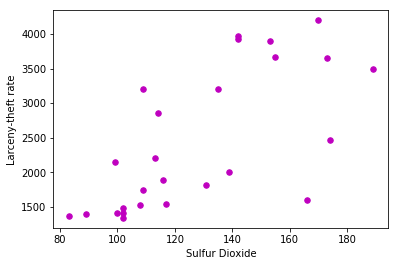

New York Mean Annual Sulfur Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 2.9853251094289135
b_1 = 15.655841576298544


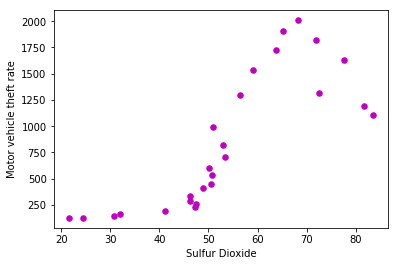

New York Annual Variance Sulfur Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.9898532643619546
b_1 = 6.561213629989973


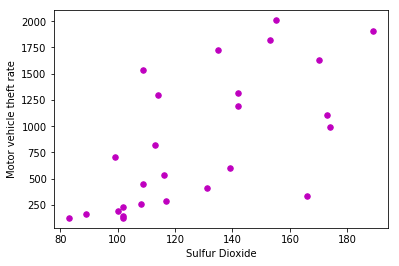

New York Mean Annual PM10 vs Violent Crime rate
Estimated coefficients:
b_0 = -18.2415632304228
b_1 = 115.62175261561924


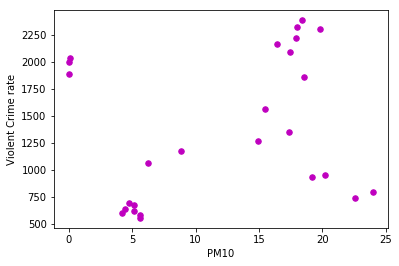

New York Annual Variance PM10 vs Violent Crime rate
Estimated coefficients:
b_0 = 839467604.0574526
b_1 = 10.16358802316264


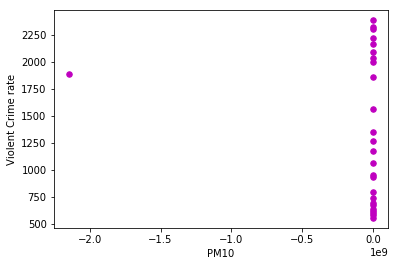

New York Mean Annual PM10 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.18724122334877613
b_1 = 1.2594746723113748


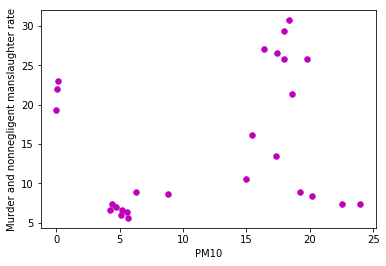

New York Annual Variance PM10 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 9181739.540106503
b_1 = 0.11116500275854889


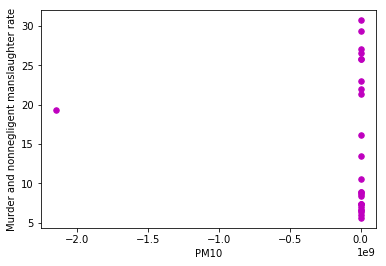

New York Mean Annual PM10 vs Legacy rape rate
Estimated coefficients:
b_0 = -0.44634843634738175
b_1 = 2.470476964527482


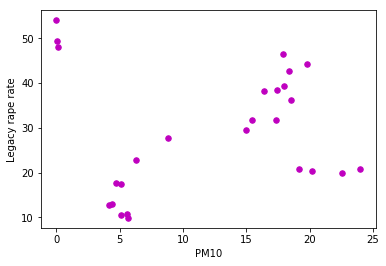

New York Annual Variance PM10 vs Legacy rape rate
Estimated coefficients:
b_0 = 17554062.957229257
b_1 = 0.21253024826307787


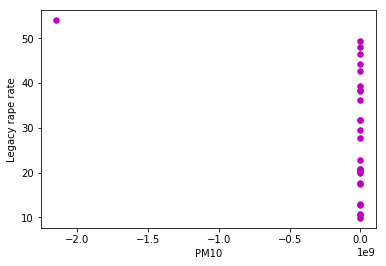

New York Mean Annual PM10 vs Robbery rate
Estimated coefficients:
b_0 = -9.36395735615099
b_1 = 59.849135555976545


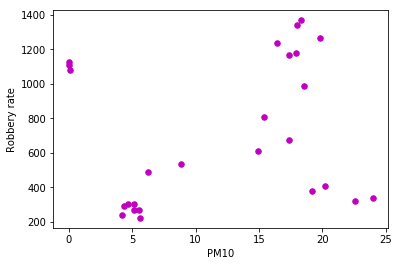

New York Annual Variance PM10 vs Robbery rate
Estimated coefficients:
b_0 = 431243556.21788573
b_1 = 5.221144647958015


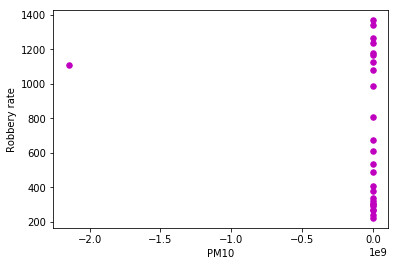

New York Mean Annual PM10 vs Aggravated assault rate
Estimated coefficients:
b_0 = -8.243635386044048
b_1 = 52.043600910110236


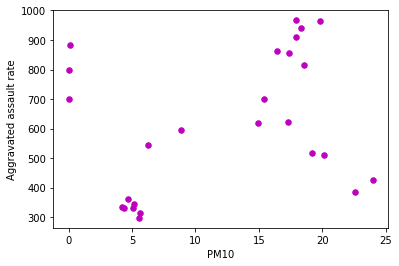

New York Annual Variance PM10 vs Aggravated assault rate
Estimated coefficients:
b_0 = 381495763.14181644
b_1 = 4.618839143567241


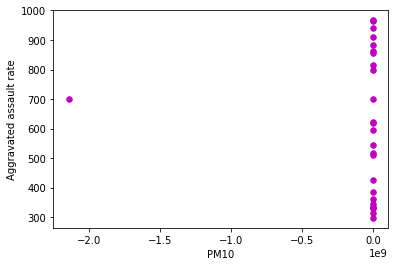

New York Mean Annual PM10 vs Property crime rate
Estimated coefficients:
b_0 = -59.598854288978146
b_1 = 353.90588779024637


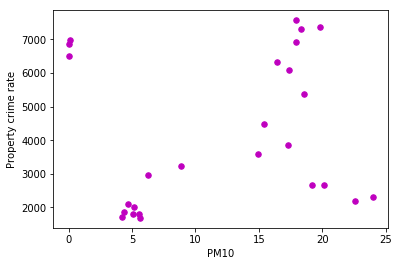

New York Annual Variance PM10 vs Property crime rate
Estimated coefficients:
b_0 = 2548712088.782983
b_1 = 30.857723669448816


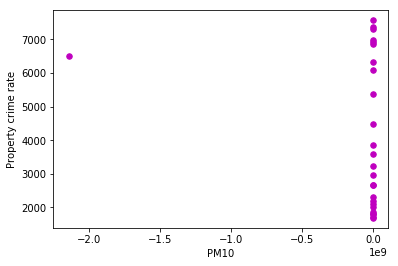

New York Mean Annual PM10 vs Burglary rate
Estimated coefficients:
b_0 = -13.070348250033021
b_1 = 74.7665972090046


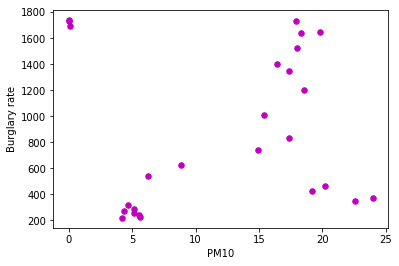

New York Annual Variance PM10 vs Burglary rate
Estimated coefficients:
b_0 = 528949902.4637997
b_1 = 6.404093084301934


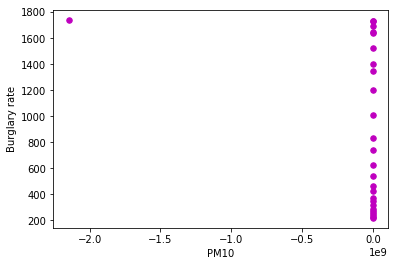

New York Mean Annual PM10 vs Larceny-theft rate
Estimated coefficients:
b_0 = -37.90827150245059
b_1 = 207.75189062937991


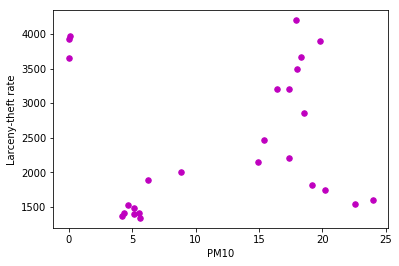

New York Annual Variance PM10 vs Larceny-theft rate
Estimated coefficients:
b_0 = 1498332600.659585
b_1 = 18.14058706717439


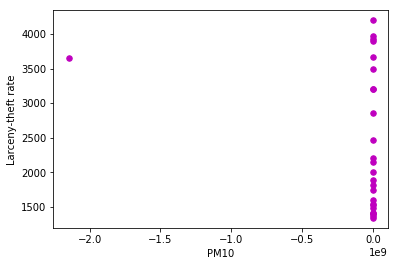

New York Mean Annual PM10 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -8.62038858201845
b_1 = 71.3883802845121


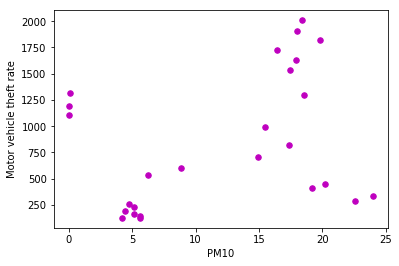

New York Annual Variance PM10 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 521437103.459137
b_1 = 6.313134537356167


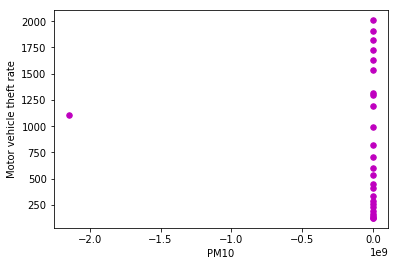

New York Mean Annual PM2.5 vs Violent Crime rate
Estimated coefficients:
b_0 = -94.94524587164938
b_1 = 52.49744591882302


New York Annual Variance PM2.5 vs Violent Crime rate
Estimated coefficients:
b_0 = 857151524.8455275
b_1 = 10.377690673551594


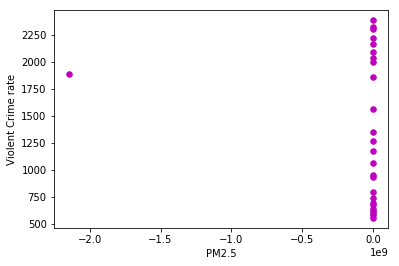

New York Mean Annual PM2.5 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -1.0653791178791767
b_1 = 0.5733940879814611


New York Annual Variance PM2.5 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 9375158.730473608
b_1 = 0.11350676631822317


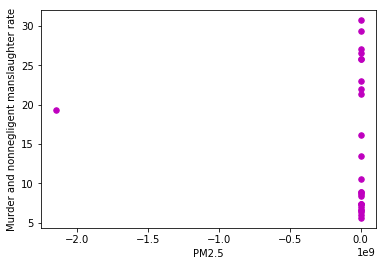

New York Mean Annual PM2.5 vs Legacy rape rate
Estimated coefficients:
b_0 = -1.9953162376455182
b_1 = 1.1184631474165545


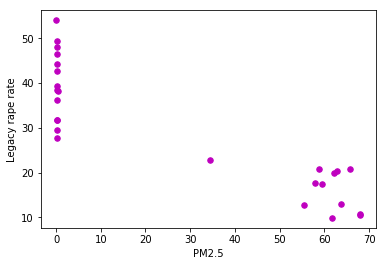

New York Annual Variance PM2.5 vs Legacy rape rate
Estimated coefficients:
b_0 = 17923850.52040951
b_1 = 0.21700733783538353


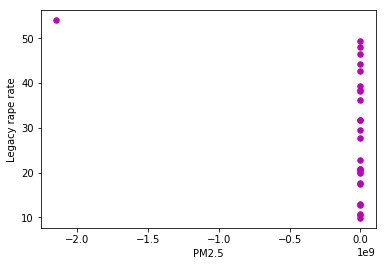

New York Mean Annual PM2.5 vs Robbery rate
Estimated coefficients:
b_0 = -51.707223566295966
b_1 = 27.269361482797716


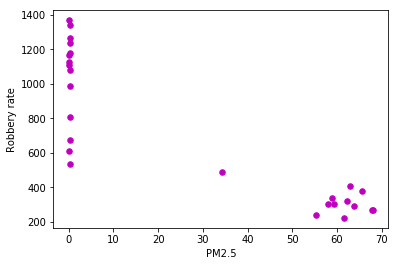

New York Annual Variance PM2.5 vs Robbery rate
Estimated coefficients:
b_0 = 440327975.85204995
b_1 = 5.331131474082651


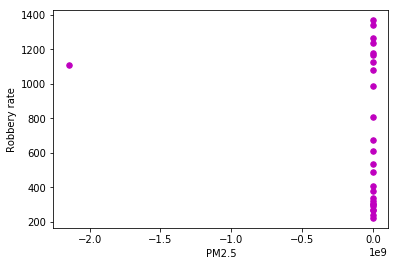

New York Mean Annual PM2.5 vs Aggravated assault rate
Estimated coefficients:
b_0 = -40.17840406805419
b_1 = 23.536682150397997


New York Annual Variance PM2.5 vs Aggravated assault rate
Estimated coefficients:
b_0 = 389532215.9092885
b_1 = 4.716138032080803


New York Mean Annual PM2.5 vs Property crime rate
Estimated coefficients:
b_0 = -293.9420729780177
b_1 = 160.67328170030248


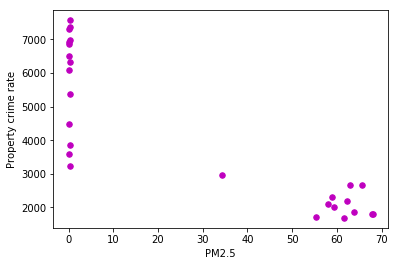

New York Annual Variance PM2.5 vs Property crime rate
Estimated coefficients:
b_0 = 2602402335.1330566
b_1 = 31.507761869763442


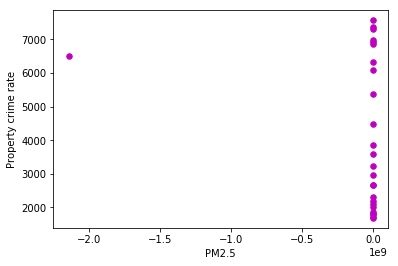

New York Mean Annual PM2.5 vs Burglary rate
Estimated coefficients:
b_0 = -67.24450527745398
b_1 = 34.11232341170204


New York Annual Variance PM2.5 vs Burglary rate
Estimated coefficients:
b_0 = 540092567.6772586
b_1 = 6.538999487875448


New York Mean Annual PM2.5 vs Larceny-theft rate
Estimated coefficients:
b_0 = -160.19495620771977
b_1 = 93.76836998263855


New York Annual Variance PM2.5 vs Larceny-theft rate
Estimated coefficients:
b_0 = 1529895938.448691
b_1 = 18.522730504523835


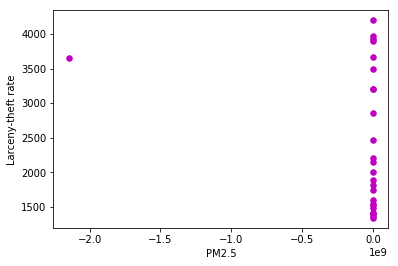

New York Mean Annual PM2.5 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -66.50213971188646
b_1 = 32.79298739850355


New York Annual Variance PM2.5 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 532421505.1744245
b_1 = 6.44612481413717


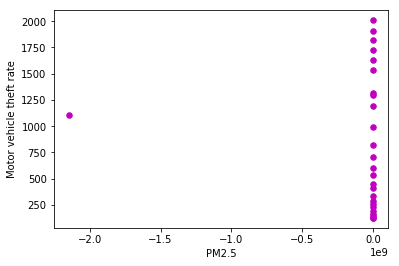

In [10]:
print('New York')
for j, y in enumerate(pollution[2]):
    data = pollution_data(y, pollution_index[j])
    mean = np.array(data[0])
    variance = np.array(data[3])
    for k, z in enumerate(rates[2]):
        print('New York Mean Annual', pollution_index[j], 'vs', crime_index[k])
        arrays_to_reg(mean, z, pollution_index[j], crime_index[k])
        print('New York Annual Variance', pollution_index[j], 'vs', crime_index[k])
        arrays_to_reg(variance, z, pollution_index[j], crime_index[k])

In [94]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
print(diabetes_X_train)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [143]:
def linear_regression(x, y, z):
    #print(x)
    train_x = []
    train_y = []
    for i in range(3):
        if i == z:
            test_x = x[i]
            test_y = y[i]
            #print(test_x)
        else:
            train_x.extend(x[i])
            train_y.extend(y[i])
    regress = linear_model.LinearRegression()
    print(test_x)
    print(train_x)
    regress.fit(train_x, train_y)
    predict_y = regress.predict(test_x)
    print('Coefficients: \n', regress.coef_)
    print("Mean squared error: %.2f"
          % mean_squared_error(test_y, predict_y))
    print('Variance score: %.2f' % r2_score(test_y, predict_y))
    
    plt.scatter(test_x, test_y, color='black')
    plt.plot(test_x, predict_y, color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show

In [150]:
j = 0
k = 0
for i, x in enumerate(cities):
    data = pollution_data(pollution[i][j], pollution_index[j])
    mean = [[a] for a in data[0]]
    variance = [[b] for b in data[3]]
    mean.extend(variance)
    crime = []
    for c in rates[i][k]:
        crime.append([c])
    if i == 0:
        values = [[crime], [mean], [variance]]
    else:
        values[0].append(crime)
        values[1].append(mean)
        values[2].append(variance)
for l in range(3):
    linear_regression(values[0], values[1], l)
    linear_regression(values[0], values[2], l)

[[16482.3], [17257.7], [16039.0], [17265.2], [17575.7], [19282.2], [19547.7], [17929.6], [17591.7], [17314.3], [16945.1], [16443.1], [16279.4], [15946.6], [14398.3], [12944.8], [11919.7], [11516.1], [11279.8], [10972.6], [10326.4], [10260.1], [10122.0], [10472.5], [9579.8], [9960.5]]
[[1658.0], [2035.6], [1910.2], [1961.5], [2246.1], [2404.6], [2525.8], [2459.5], [2374.3], [2059.0], [2034.4], [1796.4], [1596.5], [1358.5], [1283.2], [1359.8], [1388.2], [1349.5], [1271.8], [1107.3], [820.6], [786.9], [718.4], [689.5], [625.4], [566.5], [1881.3], [1995.2], [2036.1], [2217.6], [2299.9], [2383.6], [2318.2], [2163.7], [2089.8], [1860.9], [1557.8], [1344.2], [1268.4], [1167.4], [1062.6], [945.2], [927.5], [789.6], [734.1], [687.4], [673.1], [637.9], [613.8], [580.3], [551.8], [593.1]]


ValueError: Found input variables with inconsistent numbers of samples: [52, 104]

Chicago
Chicago Mean Annual Carbon Monoxide vs Violent Crime rate
Estimated coefficients:
b_0 = -38.37503059505252
b_1 = 552.2726551253246


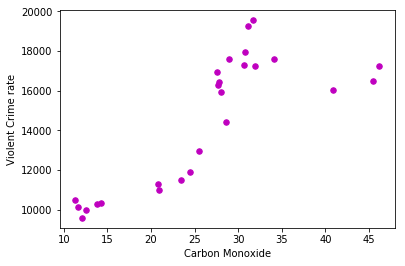

Chicago Annual Variance Carbon Monoxide vs Violent Crime rate
Estimated coefficients:
b_0 = -43.865646556574575
b_1 = 268.1798624985558


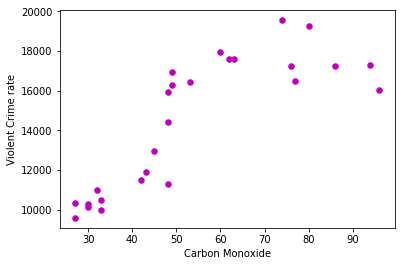

Minimum: [13, 11, 13, 13, 13, 11, 9, 8, 9, 10, 10, 9, 11, 11, 9, 7, 10, 7, 9, 10, 6, 6, 5, 5, 5, 5]
Maximum: [90, 97, 109, 89, 76, 91, 83, 68, 71, 104, 59, 62, 60, 59, 57, 52, 53, 49, 57, 42, 33, 36, 35, 38, 32, 38]
Chicago Mean Annual Carbon Monoxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.07557626635938774
b_1 = 0.8995087726178068


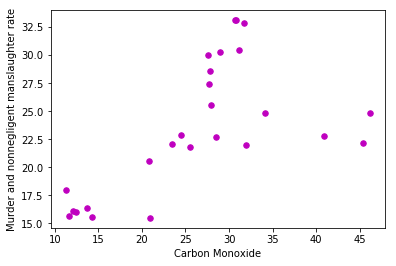

Chicago Annual Variance Carbon Monoxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.08047637704660104
b_1 = 0.4367205592905421


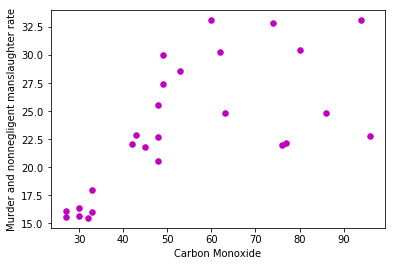

Minimum: [13, 11, 13, 13, 13, 11, 9, 8, 9, 10, 10, 9, 11, 11, 9, 7, 10, 7, 9, 10, 6, 6, 5, 5, 5, 5]
Maximum: [90, 97, 109, 89, 76, 91, 83, 68, 71, 104, 59, 62, 60, 59, 57, 52, 53, 49, 57, 42, 33, 36, 35, 38, 32, 38]
Chicago Mean Annual Carbon Monoxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


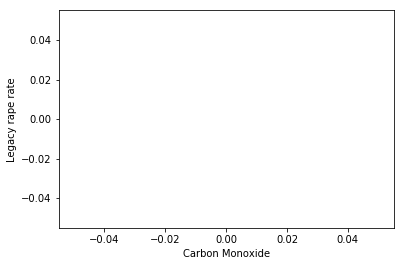

Chicago Annual Variance Carbon Monoxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


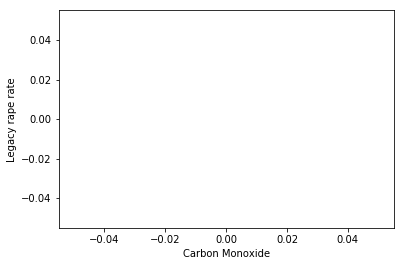

Minimum: [13, 11, 13, 13, 13, 11, 9, 8, 9, 10, 10, 9, 11, 11, 9, 7, 10, 7, 9, 10, 6, 6, 5, 5, 5, 5]
Maximum: [90, 97, 109, 89, 76, 91, 83, 68, 71, 104, 59, 62, 60, 59, 57, 52, 53, 49, 57, 42, 33, 36, 35, 38, 32, 38]
Chicago Mean Annual Carbon Monoxide vs Robbery rate
Estimated coefficients:
b_0 = -1.8025054223641064
b_1 = 33.223849180324734


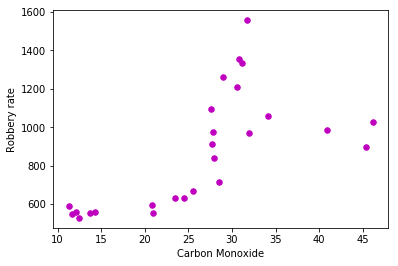

Chicago Annual Variance Carbon Monoxide vs Robbery rate
Estimated coefficients:
b_0 = -1.6700222959117355
b_1 = 16.124712156365625


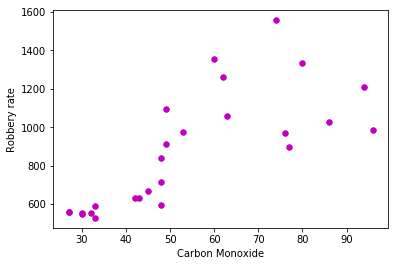

Minimum: [13, 11, 13, 13, 13, 11, 9, 8, 9, 10, 10, 9, 11, 11, 9, 7, 10, 7, 9, 10, 6, 6, 5, 5, 5, 5]
Maximum: [90, 97, 109, 89, 76, 91, 83, 68, 71, 104, 59, 62, 60, 59, 57, 52, 53, 49, 57, 42, 33, 36, 35, 38, 32, 38]
Chicago Mean Annual Carbon Monoxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -2.1521692294668355
b_1 = 39.47046392956912


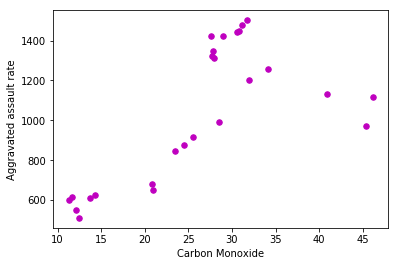

Chicago Annual Variance Carbon Monoxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -2.416973516567623
b_1 = 19.16422869140979


Minimum: [13, 11, 13, 13, 13, 11, 9, 8, 9, 10, 10, 9, 11, 11, 9, 7, 10, 7, 9, 10, 6, 6, 5, 5, 5, 5]
Maximum: [90, 97, 109, 89, 76, 91, 83, 68, 71, 104, 59, 62, 60, 59, 57, 52, 53, 49, 57, 42, 33, 36, 35, 38, 32, 38]
Chicago Mean Annual Carbon Monoxide vs Property crime rate
Estimated coefficients:
b_0 = -17.17246220006382
b_1 = 239.33912612492915


Chicago Annual Variance Carbon Monoxide vs Property crime rate
Estimated coefficients:
b_0 = -19.849138923184
b_1 = 116.22695915445037


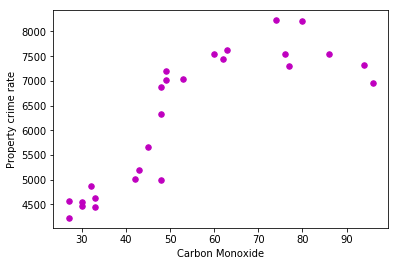

Minimum: [13, 11, 13, 13, 13, 11, 9, 8, 9, 10, 10, 9, 11, 11, 9, 7, 10, 7, 9, 10, 6, 6, 5, 5, 5, 5]
Maximum: [90, 97, 109, 89, 76, 91, 83, 68, 71, 104, 59, 62, 60, 59, 57, 52, 53, 49, 57, 42, 33, 36, 35, 38, 32, 38]
Chicago Mean Annual Carbon Monoxide vs Burglary rate
Estimated coefficients:
b_0 = -2.261369970781516
b_1 = 49.98621058539638


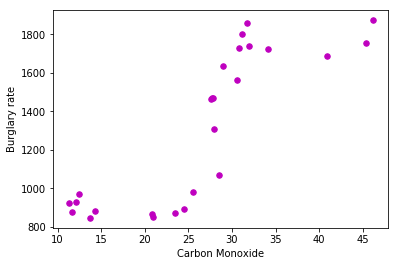

Chicago Annual Variance Carbon Monoxide vs Burglary rate
Estimated coefficients:
b_0 = -2.5563189850222443
b_1 = 24.269227255238846


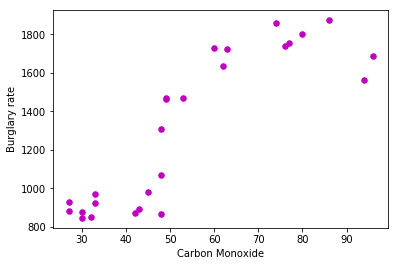

Minimum: [13, 11, 13, 13, 13, 11, 9, 8, 9, 10, 10, 9, 11, 11, 9, 7, 10, 7, 9, 10, 6, 6, 5, 5, 5, 5]
Maximum: [90, 97, 109, 89, 76, 91, 83, 68, 71, 104, 59, 62, 60, 59, 57, 52, 53, 49, 57, 42, 33, 36, 35, 38, 32, 38]
Chicago Mean Annual Carbon Monoxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -13.265320091673857
b_1 = 145.1392937278351


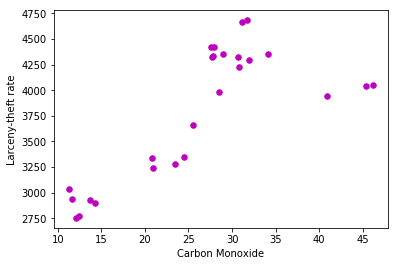

Chicago Annual Variance Carbon Monoxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -15.180731775365985
b_1 = 70.48740144210642


Minimum: [13, 11, 13, 13, 13, 11, 9, 8, 9, 10, 10, 9, 11, 11, 9, 7, 10, 7, 9, 10, 6, 6, 5, 5, 5, 5]
Maximum: [90, 97, 109, 89, 76, 91, 83, 68, 71, 104, 59, 62, 60, 59, 57, 52, 53, 49, 57, 42, 33, 36, 35, 38, 32, 38]
Chicago Mean Annual Carbon Monoxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -1.6456274143451992
b_1 = 44.21420280465246


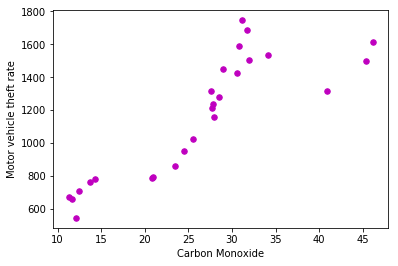

Chicago Annual Variance Carbon Monoxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -2.111984683479477
b_1 = 21.47061323969428


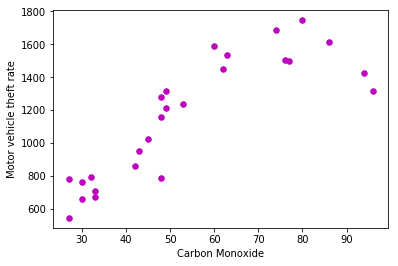

Minimum: [13, 11, 13, 13, 13, 11, 9, 8, 9, 10, 10, 9, 11, 11, 9, 7, 10, 7, 9, 10, 6, 6, 5, 5, 5, 5]
Maximum: [90, 97, 109, 89, 76, 91, 83, 68, 71, 104, 59, 62, 60, 59, 57, 52, 53, 49, 57, 42, 33, 36, 35, 38, 32, 38]
Chicago Mean Annual Nitrogen Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = -4.087360489273124
b_1 = 262.14738553983324


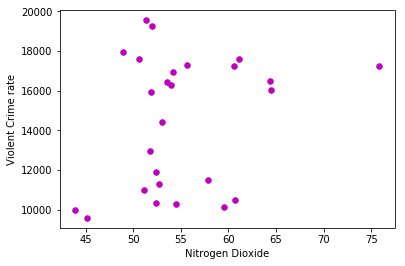

Chicago Annual Variance Nitrogen Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = -8.233553532078076
b_1 = 162.78314092327153


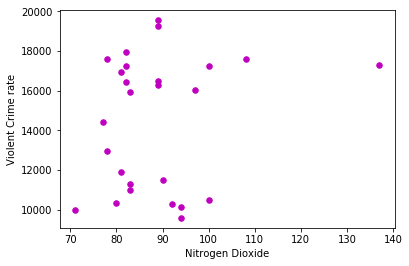

Minimum: [24, 31, 18, 17, 25, 21, 17, 20, 26, 26, 24, 24, 14, 20, 26, 24, 22, 20, 22, 18, 22, 16, 18, 17, 13, 13]
Maximum: [113, 113, 115, 117, 133, 110, 106, 102, 104, 163, 105, 106, 103, 103, 103, 102, 103, 110, 105, 101, 102, 108, 112, 117, 107, 84]
Chicago Mean Annual Nitrogen Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.013020181483589965
b_1 = 0.4268483130708377


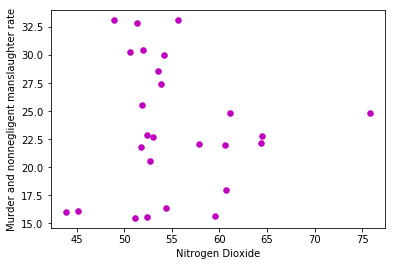

Chicago Annual Variance Nitrogen Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.01310512674341524
b_1 = 0.26498082862508826


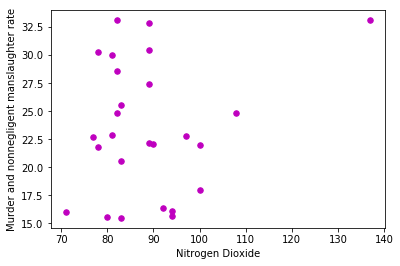

Minimum: [24, 31, 18, 17, 25, 21, 17, 20, 26, 26, 24, 24, 14, 20, 26, 24, 22, 20, 22, 18, 22, 16, 18, 17, 13, 13]
Maximum: [113, 113, 115, 117, 133, 110, 106, 102, 104, 163, 105, 106, 103, 103, 103, 102, 103, 110, 105, 101, 102, 108, 112, 117, 107, 84]
Chicago Mean Annual Nitrogen Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


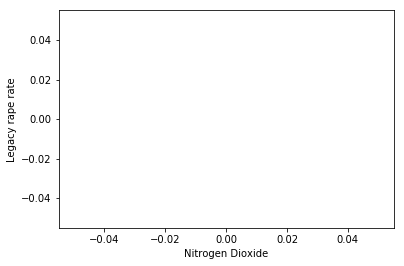

Chicago Annual Variance Nitrogen Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


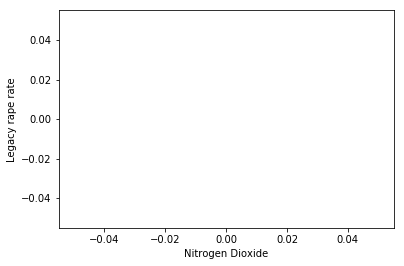

Minimum: [24, 31, 18, 17, 25, 21, 17, 20, 26, 26, 24, 24, 14, 20, 26, 24, 22, 20, 22, 18, 22, 16, 18, 17, 13, 13]
Maximum: [113, 113, 115, 117, 133, 110, 106, 102, 104, 163, 105, 106, 103, 103, 103, 102, 103, 110, 105, 101, 102, 108, 112, 117, 107, 84]
Chicago Mean Annual Nitrogen Dioxide vs Robbery rate
Estimated coefficients:
b_0 = -0.3375989801867263
b_1 = 15.781215121050586


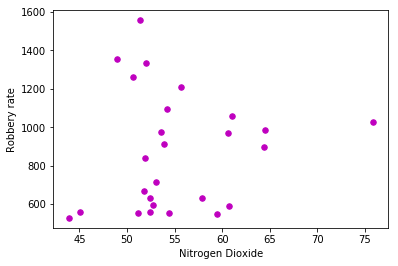

Chicago Annual Variance Nitrogen Dioxide vs Robbery rate
Estimated coefficients:
b_0 = -0.3363779602171917
b_1 = 9.796685070145363


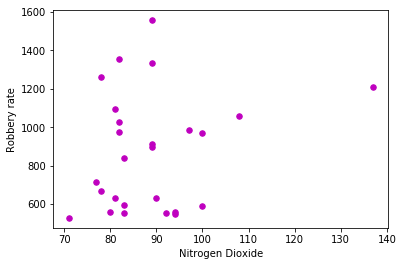

Minimum: [24, 31, 18, 17, 25, 21, 17, 20, 26, 26, 24, 24, 14, 20, 26, 24, 22, 20, 22, 18, 22, 16, 18, 17, 13, 13]
Maximum: [113, 113, 115, 117, 133, 110, 106, 102, 104, 163, 105, 106, 103, 103, 103, 102, 103, 110, 105, 101, 102, 108, 112, 117, 107, 84]
Chicago Mean Annual Nitrogen Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -0.4213973071825876
b_1 = 18.74850924995157


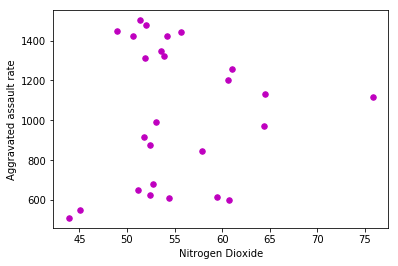

Chicago Annual Variance Nitrogen Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -0.4754653638758555
b_1 = 11.639351277375821


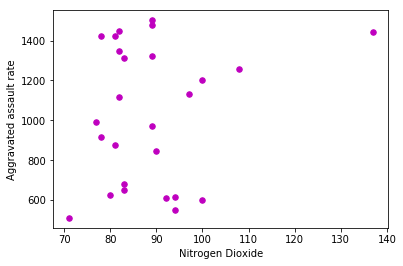

Minimum: [24, 31, 18, 17, 25, 21, 17, 20, 26, 26, 24, 24, 14, 20, 26, 24, 22, 20, 22, 18, 22, 16, 18, 17, 13, 13]
Maximum: [113, 113, 115, 117, 133, 110, 106, 102, 104, 163, 105, 106, 103, 103, 103, 102, 103, 110, 105, 101, 102, 108, 112, 117, 107, 84]
Chicago Mean Annual Nitrogen Dioxide vs Property crime rate
Estimated coefficients:
b_0 = -1.657714796098844
b_1 = 113.5952676742401


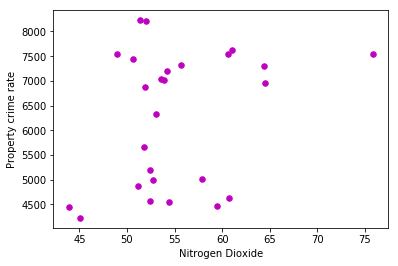

Chicago Annual Variance Nitrogen Dioxide vs Property crime rate
Estimated coefficients:
b_0 = -3.7043012284611905
b_1 = 70.54097524120398


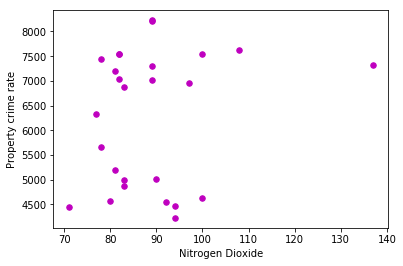

Minimum: [24, 31, 18, 17, 25, 21, 17, 20, 26, 26, 24, 24, 14, 20, 26, 24, 22, 20, 22, 18, 22, 16, 18, 17, 13, 13]
Maximum: [113, 113, 115, 117, 133, 110, 106, 102, 104, 163, 105, 106, 103, 103, 103, 102, 103, 110, 105, 101, 102, 108, 112, 117, 107, 84]
Chicago Mean Annual Nitrogen Dioxide vs Burglary rate
Estimated coefficients:
b_0 = -0.019083174375737144
b_1 = 23.742585044945447


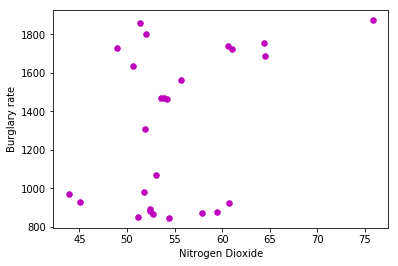

Chicago Annual Variance Nitrogen Dioxide vs Burglary rate
Estimated coefficients:
b_0 = -0.5528473591525653
b_1 = 14.744986587846673


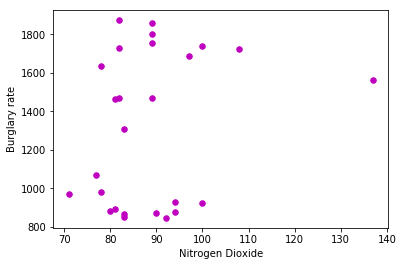

Minimum: [24, 31, 18, 17, 25, 21, 17, 20, 26, 26, 24, 24, 14, 20, 26, 24, 22, 20, 22, 18, 22, 16, 18, 17, 13, 13]
Maximum: [113, 113, 115, 117, 133, 110, 106, 102, 104, 163, 105, 106, 103, 103, 103, 102, 103, 110, 105, 101, 102, 108, 112, 117, 107, 84]
Chicago Mean Annual Nitrogen Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -1.5535015088880755
b_1 = 68.84431011020814


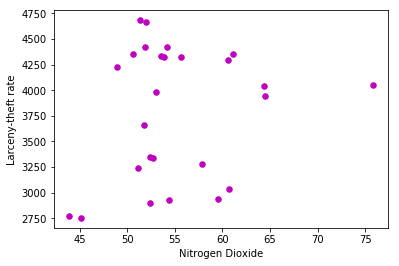

Chicago Annual Variance Nitrogen Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -2.532172384389014
b_1 = 42.748348411430975


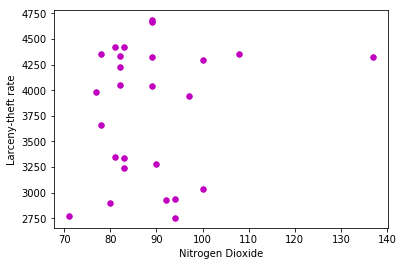

Minimum: [24, 31, 18, 17, 25, 21, 17, 20, 26, 26, 24, 24, 14, 20, 26, 24, 22, 20, 22, 18, 22, 16, 18, 17, 13, 13]
Maximum: [113, 113, 115, 117, 133, 110, 106, 102, 104, 163, 105, 106, 103, 103, 103, 102, 103, 110, 105, 101, 102, 108, 112, 117, 107, 84]
Chicago Mean Annual Nitrogen Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -0.08504454105604964
b_1 = 21.008650026366574


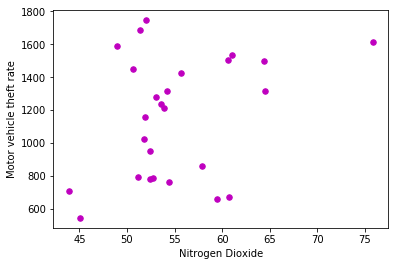

Chicago Annual Variance Nitrogen Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -0.6192841092336039
b_1 = 13.0478135066436


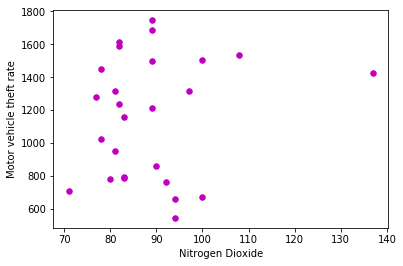

Minimum: [24, 31, 18, 17, 25, 21, 17, 20, 26, 26, 24, 24, 14, 20, 26, 24, 22, 20, 22, 18, 22, 16, 18, 17, 13, 13]
Maximum: [113, 113, 115, 117, 133, 110, 106, 102, 104, 163, 105, 106, 103, 103, 103, 102, 103, 110, 105, 101, 102, 108, 112, 117, 107, 84]
Chicago Mean Annual Ozone vs Violent Crime rate
Estimated coefficients:
b_0 = -0.5078328167128348
b_1 = 282.94536901590885


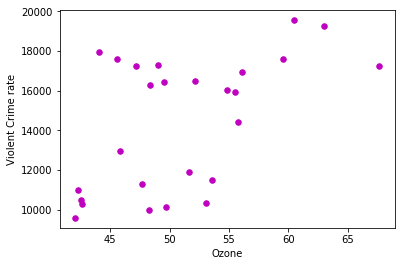

Chicago Annual Variance Ozone vs Violent Crime rate
Estimated coefficients:
b_0 = -0.15161240903216822
b_1 = 71.36324884548533


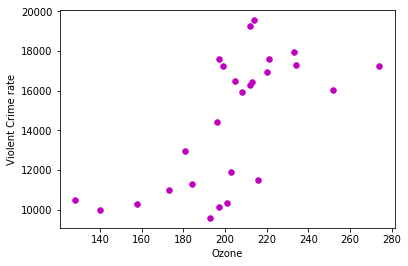

Minimum: [10, 6, 9, 11, 6, 6, 10, 4, 6, 6, 5, 5, 4, 9, 6, 9, 6, 7, 6, 6, 7, 6, 6, 12, 9, 19]
Maximum: [215, 205, 261, 285, 227, 218, 224, 237, 203, 240, 225, 218, 216, 217, 202, 190, 209, 223, 190, 179, 208, 164, 203, 140, 202, 159]
Chicago Mean Annual Ozone vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.006101290789761293
b_1 = 0.4606918180421635


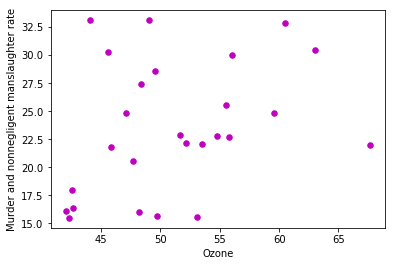

Chicago Annual Variance Ozone vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.0026208955532993627
b_1 = 0.11617935852666904


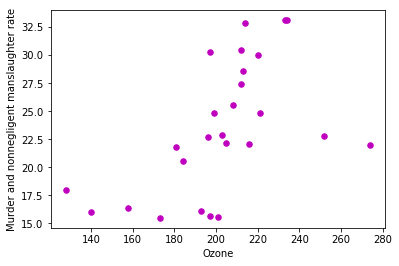

Minimum: [10, 6, 9, 11, 6, 6, 10, 4, 6, 6, 5, 5, 4, 9, 6, 9, 6, 7, 6, 6, 7, 6, 6, 12, 9, 19]
Maximum: [215, 205, 261, 285, 227, 218, 224, 237, 203, 240, 225, 218, 216, 217, 202, 190, 209, 223, 190, 179, 208, 164, 203, 140, 202, 159]
Chicago Mean Annual Ozone vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


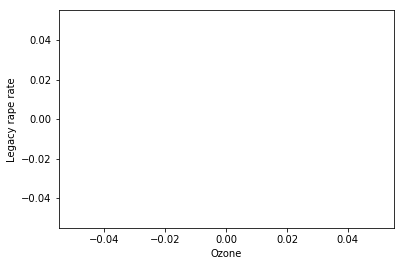

Chicago Annual Variance Ozone vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


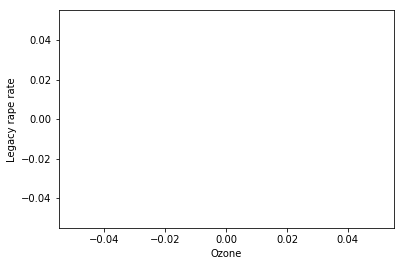

Minimum: [10, 6, 9, 11, 6, 6, 10, 4, 6, 6, 5, 5, 4, 9, 6, 9, 6, 7, 6, 6, 7, 6, 6, 12, 9, 19]
Maximum: [215, 205, 261, 285, 227, 218, 224, 237, 203, 240, 225, 218, 216, 217, 202, 190, 209, 223, 190, 179, 208, 164, 203, 140, 202, 159]
Chicago Mean Annual Ozone vs Robbery rate
Estimated coefficients:
b_0 = 0.06730519159282267
b_1 = 17.02953984290796


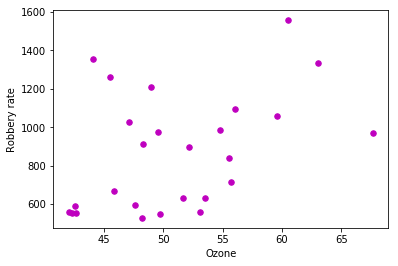

Chicago Annual Variance Ozone vs Robbery rate
Estimated coefficients:
b_0 = 0.23855468586066308
b_1 = 4.294376439621509


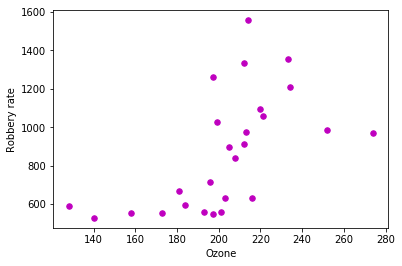

Minimum: [10, 6, 9, 11, 6, 6, 10, 4, 6, 6, 5, 5, 4, 9, 6, 9, 6, 7, 6, 6, 7, 6, 6, 12, 9, 19]
Maximum: [215, 205, 261, 285, 227, 218, 224, 237, 203, 240, 225, 218, 216, 217, 202, 190, 209, 223, 190, 179, 208, 164, 203, 140, 202, 159]
Chicago Mean Annual Ozone vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.1438252324765017
b_1 = 20.22990410525557


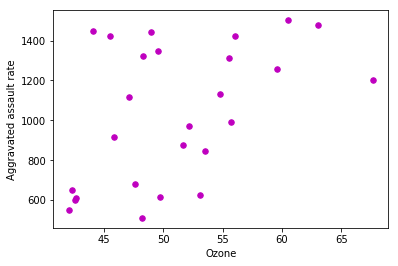

Chicago Annual Variance Ozone vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.4121809515777386
b_1 = 5.101098650315156


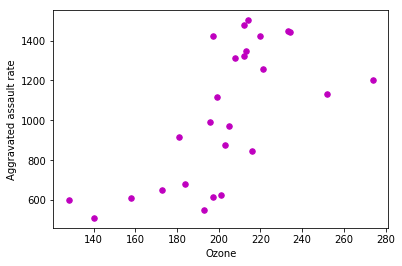

Minimum: [10, 6, 9, 11, 6, 6, 10, 4, 6, 6, 5, 5, 4, 9, 6, 9, 6, 7, 6, 6, 7, 6, 6, 12, 9, 19]
Maximum: [215, 205, 261, 285, 227, 218, 224, 237, 203, 240, 225, 218, 216, 217, 202, 190, 209, 223, 190, 179, 208, 164, 203, 140, 202, 159]
Chicago Mean Annual Ozone vs Property crime rate
Estimated coefficients:
b_0 = -0.35646597892719
b_1 = 122.61246667342128


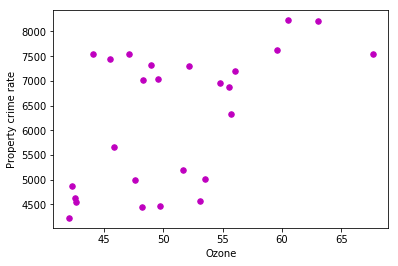

Chicago Annual Variance Ozone vs Property crime rate
Estimated coefficients:
b_0 = -0.39992436180364166
b_1 = 30.92575950482654


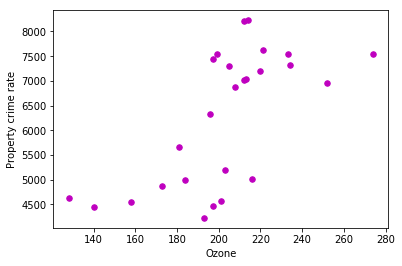

Minimum: [10, 6, 9, 11, 6, 6, 10, 4, 6, 6, 5, 5, 4, 9, 6, 9, 6, 7, 6, 6, 7, 6, 6, 12, 9, 19]
Maximum: [215, 205, 261, 285, 227, 218, 224, 237, 203, 240, 225, 218, 216, 217, 202, 190, 209, 223, 190, 179, 208, 164, 203, 140, 202, 159]
Chicago Mean Annual Ozone vs Burglary rate
Estimated coefficients:
b_0 = 0.10221054869998625
b_1 = 25.630223586216594


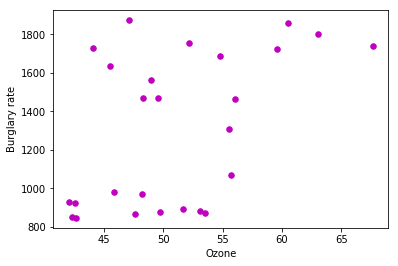

Chicago Annual Variance Ozone vs Burglary rate
Estimated coefficients:
b_0 = 0.2905403872621264
b_1 = 6.463572558877505


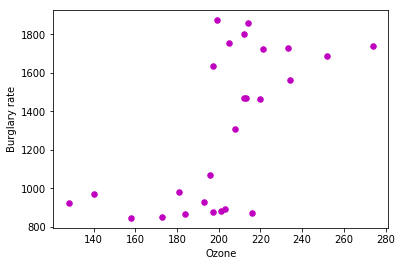

Minimum: [10, 6, 9, 11, 6, 6, 10, 4, 6, 6, 5, 5, 4, 9, 6, 9, 6, 7, 6, 6, 7, 6, 6, 12, 9, 19]
Maximum: [215, 205, 261, 285, 227, 218, 224, 237, 203, 240, 225, 218, 216, 217, 202, 190, 209, 223, 190, 179, 208, 164, 203, 140, 202, 159]
Chicago Mean Annual Ozone vs Larceny-theft rate
Estimated coefficients:
b_0 = -0.7270966398123164
b_1 = 74.30843555755634


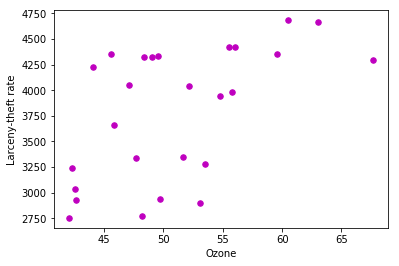

Chicago Annual Variance Ozone vs Larceny-theft rate
Estimated coefficients:
b_0 = -1.0213421437933903
b_1 = 18.743665443719348


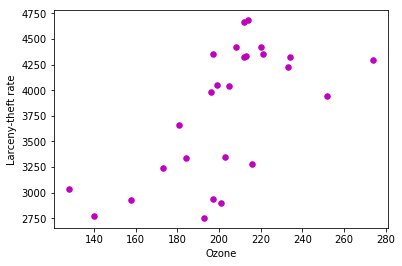

Minimum: [10, 6, 9, 11, 6, 6, 10, 4, 6, 6, 5, 5, 4, 9, 6, 9, 6, 7, 6, 6, 7, 6, 6, 12, 9, 19]
Maximum: [215, 205, 261, 285, 227, 218, 224, 237, 203, 240, 225, 218, 216, 217, 202, 190, 209, 223, 190, 179, 208, 164, 203, 140, 202, 159]
Chicago Mean Annual Ozone vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 0.26849012004731776
b_1 = 22.67410743250899


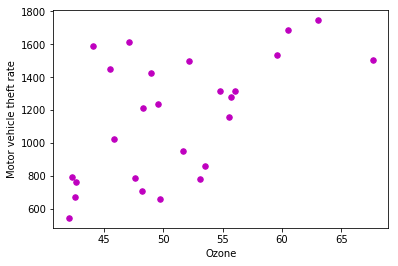

Chicago Annual Variance Ozone vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 0.3309989674216922
b_1 = 5.718596889598601


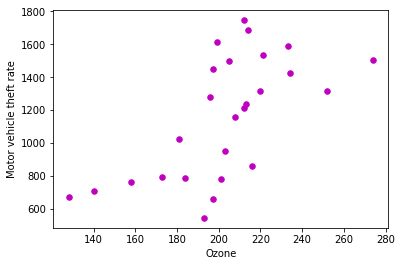

Minimum: [10, 6, 9, 11, 6, 6, 10, 4, 6, 6, 5, 5, 4, 9, 6, 9, 6, 7, 6, 6, 7, 6, 6, 12, 9, 19]
Maximum: [215, 205, 261, 285, 227, 218, 224, 237, 203, 240, 225, 218, 216, 217, 202, 190, 209, 223, 190, 179, 208, 164, 203, 140, 202, 159]
Chicago Mean Annual Sulfur Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = -22.147094806852692
b_1 = 197.15477395602022


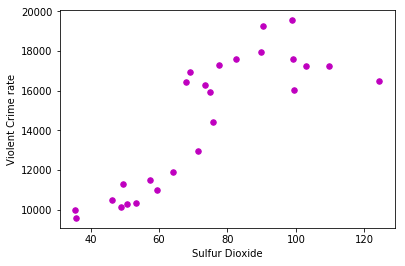

Chicago Annual Variance Sulfur Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = 1.4773209791510453
b_1 = 94.8519670844803


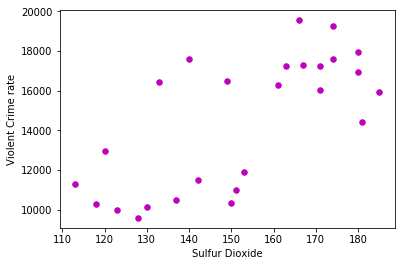

Minimum: [51, 37, 29, 29, 26, 26, 34, 20, 21, 16, 20, 17, 21, 13, 19, 16, 14, 11, 9, 13, 13, 9, 11, 7, 6, 4]
Maximum: [200, 200, 200, 200, 200, 200, 200, 200, 161, 183, 200, 150, 182, 198, 200, 136, 167, 153, 122, 164, 163, 127, 141, 144, 134, 127]
Chicago Mean Annual Sulfur Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.05131273517094925
b_1 = 0.3211434734672442


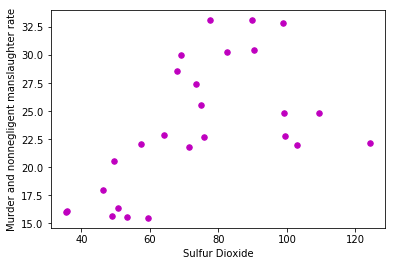

Chicago Annual Variance Sulfur Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -9.345163197949091e-05
b_1 = 0.15441980549051298


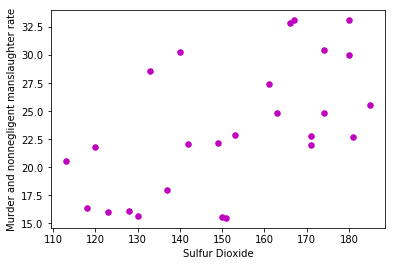

Minimum: [51, 37, 29, 29, 26, 26, 34, 20, 21, 16, 20, 17, 21, 13, 19, 16, 14, 11, 9, 13, 13, 9, 11, 7, 6, 4]
Maximum: [200, 200, 200, 200, 200, 200, 200, 200, 161, 183, 200, 150, 182, 198, 200, 136, 167, 153, 122, 164, 163, 127, 141, 144, 134, 127]
Chicago Mean Annual Sulfur Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


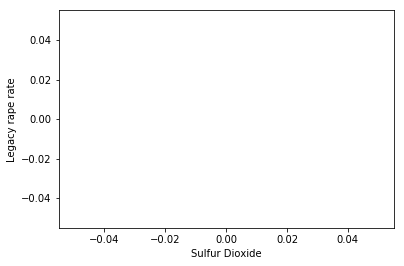

Chicago Annual Variance Sulfur Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


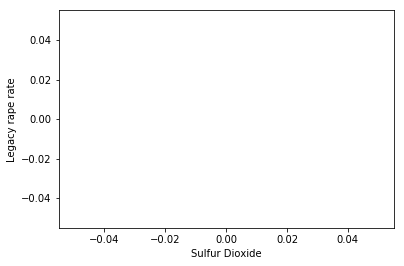

Minimum: [51, 37, 29, 29, 26, 26, 34, 20, 21, 16, 20, 17, 21, 13, 19, 16, 14, 11, 9, 13, 13, 9, 11, 7, 6, 4]
Maximum: [200, 200, 200, 200, 200, 200, 200, 200, 161, 183, 200, 150, 182, 198, 200, 136, 167, 153, 122, 164, 163, 127, 141, 144, 134, 127]
Chicago Mean Annual Sulfur Dioxide vs Robbery rate
Estimated coefficients:
b_0 = -0.7741965036052534
b_1 = 11.859809949132066


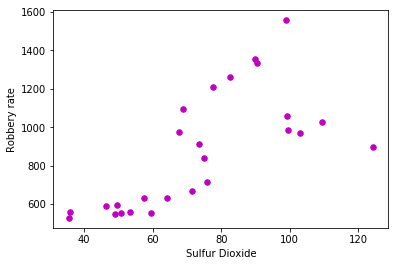

Chicago Annual Variance Sulfur Dioxide vs Robbery rate
Estimated coefficients:
b_0 = 0.3310860661881634
b_1 = 5.707876707646238


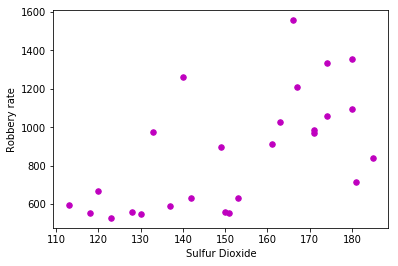

Minimum: [51, 37, 29, 29, 26, 26, 34, 20, 21, 16, 20, 17, 21, 13, 19, 16, 14, 11, 9, 13, 13, 9, 11, 7, 6, 4]
Maximum: [200, 200, 200, 200, 200, 200, 200, 200, 161, 183, 200, 150, 182, 198, 200, 136, 167, 153, 122, 164, 163, 127, 141, 144, 134, 127]
Chicago Mean Annual Sulfur Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -1.1597042204791705
b_1 = 14.092766365962953


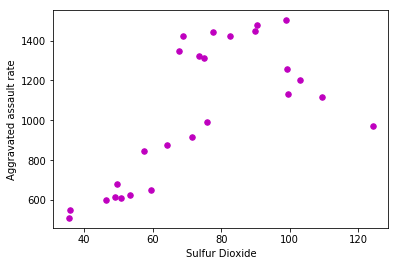

Chicago Annual Variance Sulfur Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.5069787754946447
b_1 = 6.78023195753463


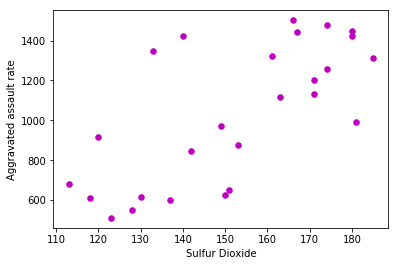

Minimum: [51, 37, 29, 29, 26, 26, 34, 20, 21, 16, 20, 17, 21, 13, 19, 16, 14, 11, 9, 13, 13, 9, 11, 7, 6, 4]
Maximum: [200, 200, 200, 200, 200, 200, 200, 200, 161, 183, 200, 150, 182, 198, 200, 136, 167, 153, 122, 164, 163, 127, 141, 144, 134, 127]
Chicago Mean Annual Sulfur Dioxide vs Property crime rate
Estimated coefficients:
b_0 = -10.080997589217077
b_1 = 85.44042305318784


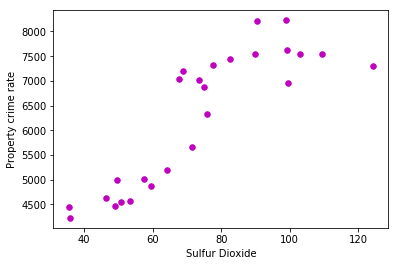

Chicago Annual Variance Sulfur Dioxide vs Property crime rate
Estimated coefficients:
b_0 = 0.31964881894327846
b_1 = 41.10466897240087


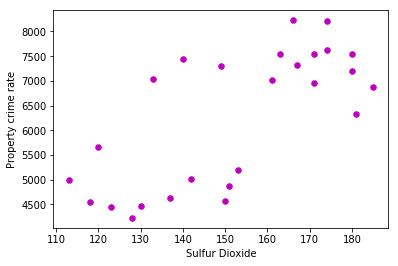

Minimum: [51, 37, 29, 29, 26, 26, 34, 20, 21, 16, 20, 17, 21, 13, 19, 16, 14, 11, 9, 13, 13, 9, 11, 7, 6, 4]
Maximum: [200, 200, 200, 200, 200, 200, 200, 200, 161, 183, 200, 150, 182, 198, 200, 136, 167, 153, 122, 164, 163, 127, 141, 144, 134, 127]
Chicago Mean Annual Sulfur Dioxide vs Burglary rate
Estimated coefficients:
b_0 = -0.8548091963823481
b_1 = 17.845330949030785


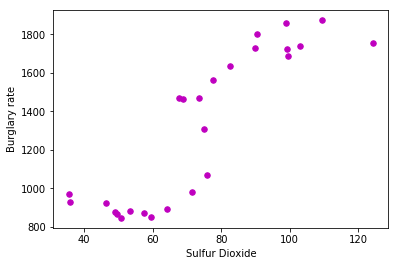

Chicago Annual Variance Sulfur Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 0.3361059201479293
b_1 = 8.591682132847513


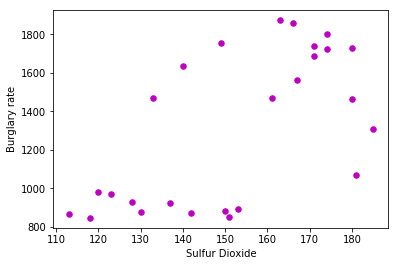

Minimum: [51, 37, 29, 29, 26, 26, 34, 20, 21, 16, 20, 17, 21, 13, 19, 16, 14, 11, 9, 13, 13, 9, 11, 7, 6, 4]
Maximum: [200, 200, 200, 200, 200, 200, 200, 200, 161, 183, 200, 150, 182, 198, 200, 136, 167, 153, 122, 164, 163, 127, 141, 144, 134, 127]
Chicago Mean Annual Sulfur Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -8.769780776418429
b_1 = 51.809858539992405


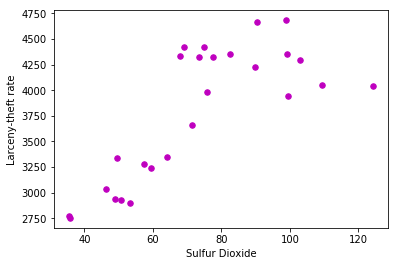

Chicago Annual Variance Sulfur Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -0.5285268628540507
b_1 = 24.912586287483386


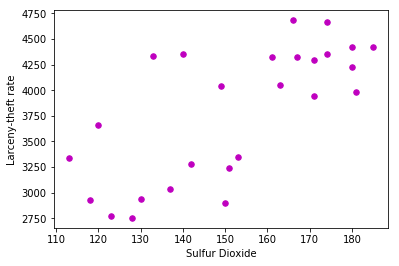

Minimum: [51, 37, 29, 29, 26, 26, 34, 20, 21, 16, 20, 17, 21, 13, 19, 16, 14, 11, 9, 13, 13, 9, 11, 7, 6, 4]
Maximum: [200, 200, 200, 200, 200, 200, 200, 200, 161, 183, 200, 150, 182, 198, 200, 136, 167, 153, 122, 164, 163, 127, 141, 144, 134, 127]
Chicago Mean Annual Sulfur Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -0.45629378557646305
b_1 = 15.785441625246932


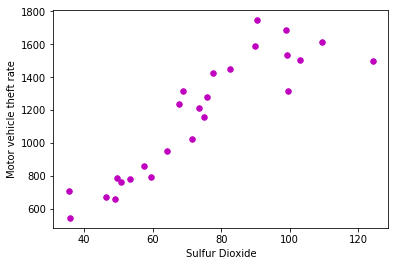

Chicago Annual Variance Sulfur Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 0.5121217128637454
b_1 = 7.600501221077156


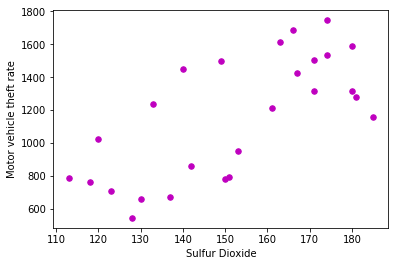

Minimum: [51, 37, 29, 29, 26, 26, 34, 20, 21, 16, 20, 17, 21, 13, 19, 16, 14, 11, 9, 13, 13, 9, 11, 7, 6, 4]
Maximum: [200, 200, 200, 200, 200, 200, 200, 200, 161, 183, 200, 150, 182, 198, 200, 136, 167, 153, 122, 164, 163, 127, 141, 144, 134, 127]
Chicago Mean Annual PM10 vs Violent Crime rate
Estimated coefficients:
b_0 = -82.43861094585009
b_1 = 411.6305035190541


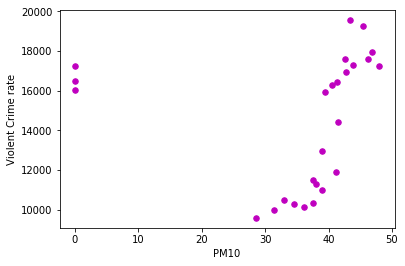

Chicago Annual Variance PM10 vs Violent Crime rate
Estimated coefficients:
b_0 = 4823715456.008172
b_1 = 58.40156499632933


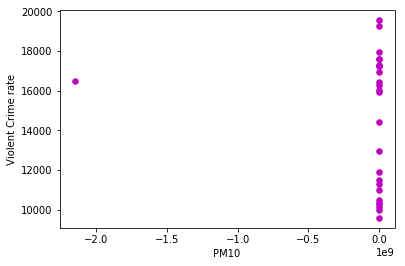

Minimum: [2147483647, 7, 23, 6, 11, 11, 11, 14, 11, 8, 10, 11, 11, 6, 7, 11, 9, 8, 9, 7, 8, 8, 7, 7, 8, 6]
Maximum: [0, 7, 23, 215, 136, 148, 123, 123, 101, 153, 104, 504, 177, 94, 170, 97, 126, 119, 137, 174, 130, 119, 90, 106, 65, 69]
Chicago Mean Annual PM10 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.11556472943864904
b_1 = 0.6695389503291744


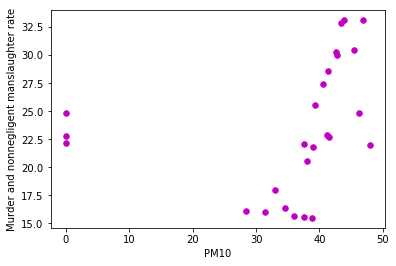

Chicago Annual Variance PM10 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 7914403.423845213
b_1 = 0.09582106595187188


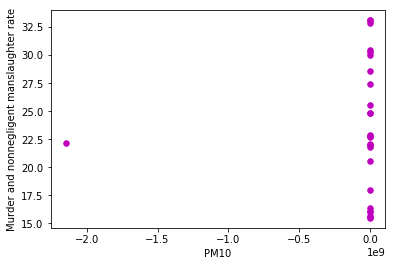

Minimum: [2147483647, 7, 23, 6, 11, 11, 11, 14, 11, 8, 10, 11, 11, 6, 7, 11, 9, 8, 9, 7, 8, 8, 7, 7, 8, 6]
Maximum: [0, 7, 23, 215, 136, 148, 123, 123, 101, 153, 104, 504, 177, 94, 170, 97, 126, 119, 137, 174, 130, 119, 90, 106, 65, 69]
Chicago Mean Annual PM10 vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


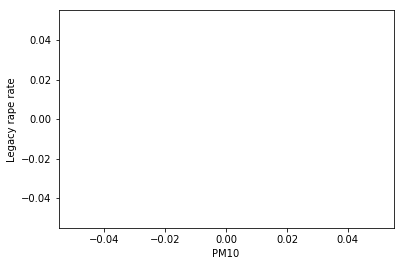

Chicago Annual Variance PM10 vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = 0.0


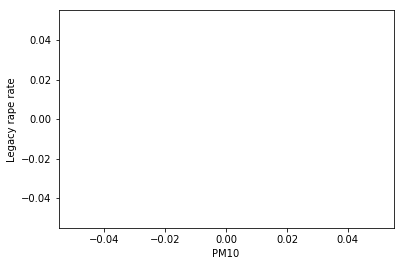

Minimum: [2147483647, 7, 23, 6, 11, 11, 11, 14, 11, 8, 10, 11, 11, 6, 7, 11, 9, 8, 9, 7, 8, 8, 7, 7, 8, 6]
Maximum: [0, 7, 23, 215, 136, 148, 123, 123, 101, 153, 104, 504, 177, 94, 170, 97, 126, 119, 137, 174, 130, 119, 90, 106, 65, 69]
Chicago Mean Annual PM10 vs Robbery rate
Estimated coefficients:
b_0 = -4.507110355618579
b_1 = 24.764564198218554


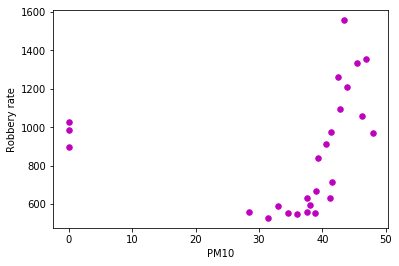

Chicago Annual Variance PM10 vs Robbery rate
Estimated coefficients:
b_0 = 291637642.1502945
b_1 = 3.5309078847897757


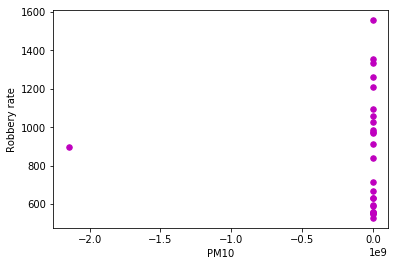

Minimum: [2147483647, 7, 23, 6, 11, 11, 11, 14, 11, 8, 10, 11, 11, 6, 7, 11, 9, 8, 9, 7, 8, 8, 7, 7, 8, 6]
Maximum: [0, 7, 23, 215, 136, 148, 123, 123, 101, 153, 104, 504, 177, 94, 170, 97, 126, 119, 137, 174, 130, 119, 90, 106, 65, 69]
Chicago Mean Annual PM10 vs Aggravated assault rate
Estimated coefficients:
b_0 = -4.867558078976117
b_1 = 29.406598326466078


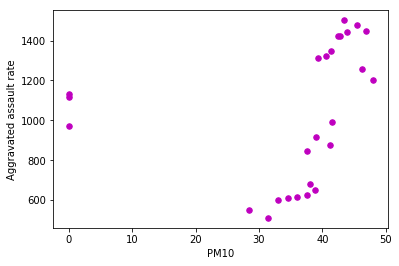

Chicago Annual Variance PM10 vs Aggravated assault rate
Estimated coefficients:
b_0 = 347743549.4547591
b_1 = 4.210191952751104


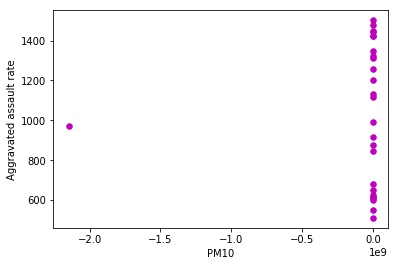

Minimum: [2147483647, 7, 23, 6, 11, 11, 11, 14, 11, 8, 10, 11, 11, 6, 7, 11, 9, 8, 9, 7, 8, 8, 7, 7, 8, 6]
Maximum: [0, 7, 23, 215, 136, 148, 123, 123, 101, 153, 104, 504, 177, 94, 170, 97, 126, 119, 137, 174, 130, 119, 90, 106, 65, 69]
Chicago Mean Annual PM10 vs Property crime rate
Estimated coefficients:
b_0 = -36.474029036590764
b_1 = 178.39467858183406


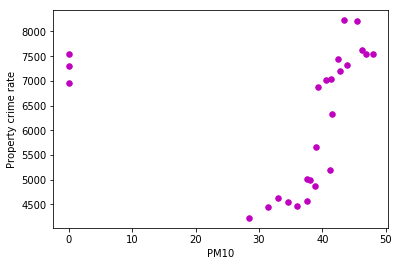

Chicago Annual Variance PM10 vs Property crime rate
Estimated coefficients:
b_0 = 2088207244.4543588
b_1 = 25.282289526116063


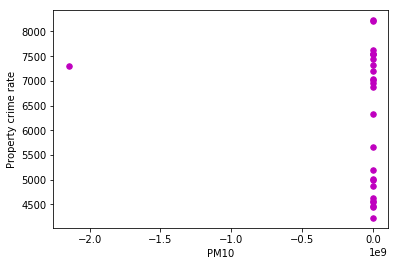

Minimum: [2147483647, 7, 23, 6, 11, 11, 11, 14, 11, 8, 10, 11, 11, 6, 7, 11, 9, 8, 9, 7, 8, 8, 7, 7, 8, 6]
Maximum: [0, 7, 23, 215, 136, 148, 123, 123, 101, 153, 104, 504, 177, 94, 170, 97, 126, 119, 137, 174, 130, 119, 90, 106, 65, 69]
Chicago Mean Annual PM10 vs Burglary rate
Estimated coefficients:
b_0 = -8.723209533119189
b_1 = 37.326760931316905


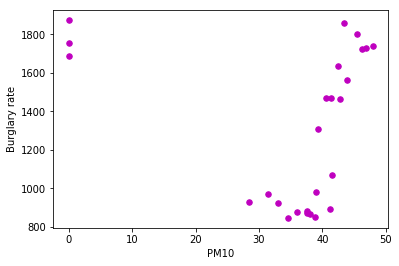

Chicago Annual Variance PM10 vs Burglary rate
Estimated coefficients:
b_0 = 433471066.0214952
b_1 = 5.248109729934673


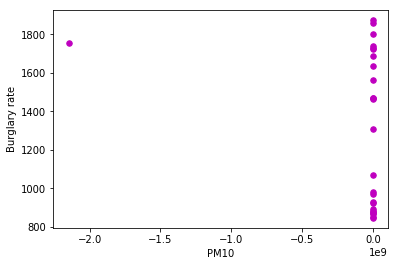

Minimum: [2147483647, 7, 23, 6, 11, 11, 11, 14, 11, 8, 10, 11, 11, 6, 7, 11, 9, 8, 9, 7, 8, 8, 7, 7, 8, 6]
Maximum: [0, 7, 23, 215, 136, 148, 123, 123, 101, 153, 104, 504, 177, 94, 170, 97, 126, 119, 137, 174, 130, 119, 90, 106, 65, 69]
Chicago Mean Annual PM10 vs Larceny-theft rate
Estimated coefficients:
b_0 = -20.83961908882293
b_1 = 108.06453914695888


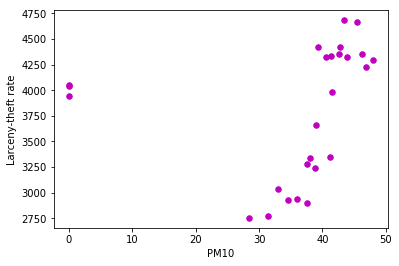

Chicago Annual Variance PM10 vs Larceny-theft rate
Estimated coefficients:
b_0 = 1270446423.3116732
b_1 = 15.381516739516053


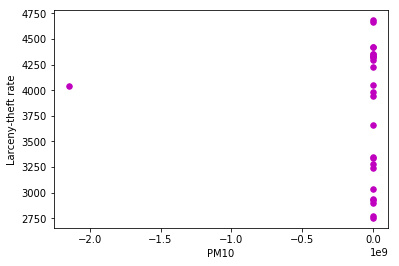

Minimum: [2147483647, 7, 23, 6, 11, 11, 11, 14, 11, 8, 10, 11, 11, 6, 7, 11, 9, 8, 9, 7, 8, 8, 7, 7, 8, 6]
Maximum: [0, 7, 23, 215, 136, 148, 123, 123, 101, 153, 104, 504, 177, 94, 170, 97, 126, 119, 137, 174, 130, 119, 90, 106, 65, 69]
Chicago Mean Annual PM10 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -6.911520123277569
b_1 = 33.00382338393036


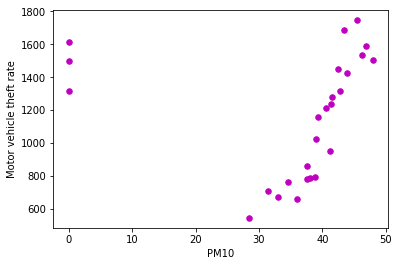

Chicago Annual Variance PM10 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 384295127.19174683
b_1 = 4.652728097269798


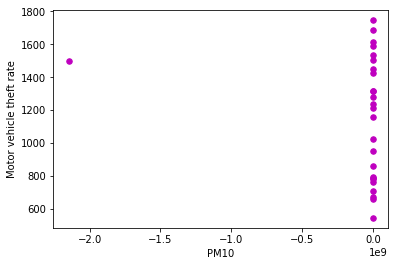

Minimum: [2147483647, 7, 23, 6, 11, 11, 11, 14, 11, 8, 10, 11, 11, 6, 7, 11, 9, 8, 9, 7, 8, 8, 7, 7, 8, 6]
Maximum: [0, 7, 23, 215, 136, 148, 123, 123, 101, 153, 104, 504, 177, 94, 170, 97, 126, 119, 137, 174, 130, 119, 90, 106, 65, 69]
Chicago Mean Annual PM2.5 vs Violent Crime rate
Estimated coefficients:
b_0 = -840.7725122303636
b_1 = 500.18610343863725


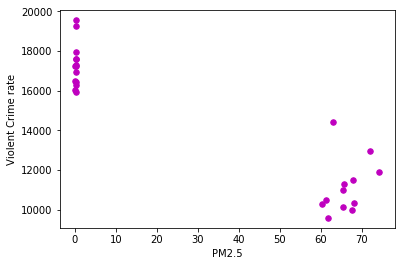

Chicago Annual Variance PM2.5 vs Violent Crime rate
Estimated coefficients:
b_0 = 9810131471.473732
b_1 = 118.77306844562737


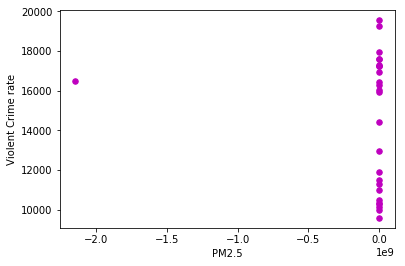

Minimum: [2147483647, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 1, 21, 24, 24, 18, 20, 14, 20, 24, 22, 29, 27]
Maximum: [0, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 157, 155, 158, 153, 152, 152, 186, 120, 156, 117, 116, 134]
Chicago Mean Annual PM2.5 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -1.3469725730010325
b_1 = 0.8135118717776714


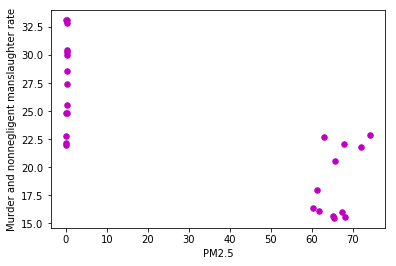

Chicago Annual Variance PM2.5 vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 16095754.250619246
b_1 = 0.1948742633037552


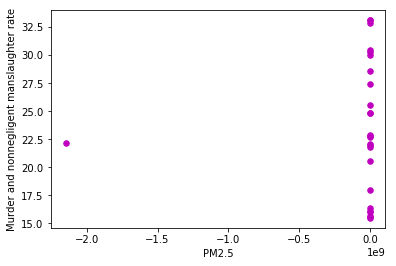

Minimum: [2147483647, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 1, 21, 24, 24, 18, 20, 14, 20, 24, 22, 29, 27]
Maximum: [0, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 157, 155, 158, 153, 152, 152, 186, 120, 156, 117, 116, 134]
Chicago Mean Annual PM2.5 vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = -0.0


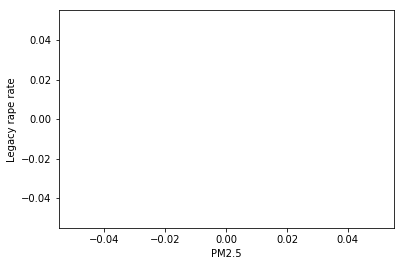

Chicago Annual Variance PM2.5 vs Legacy rape rate
Estimated coefficients:
b_0 = nan
b_1 = 0.0


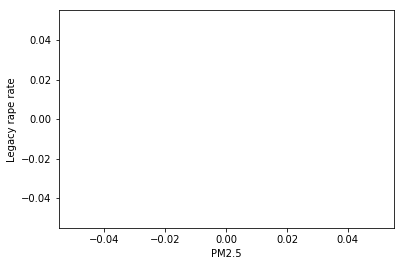

Minimum: [2147483647, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 1, 21, 24, 24, 18, 20, 14, 20, 24, 22, 29, 27]
Maximum: [0, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 157, 155, 158, 153, 152, 152, 186, 120, 156, 117, 116, 134]
Chicago Mean Annual PM2.5 vs Robbery rate
Estimated coefficients:
b_0 = -53.84147201527185
b_1 = 30.213676999906678


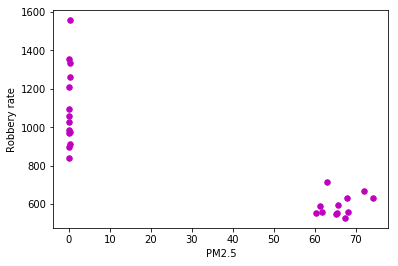

Chicago Annual Variance PM2.5 vs Robbery rate
Estimated coefficients:
b_0 = 593112019.2628416
b_1 = 7.18091649644102


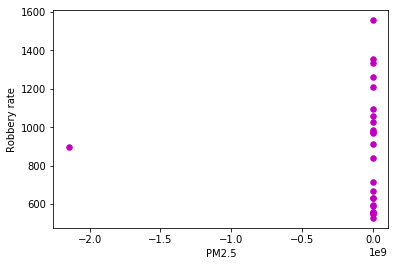

Minimum: [2147483647, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 1, 21, 24, 24, 18, 20, 14, 20, 24, 22, 29, 27]
Maximum: [0, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 157, 155, 158, 153, 152, 152, 186, 120, 156, 117, 116, 134]
Chicago Mean Annual PM2.5 vs Aggravated assault rate
Estimated coefficients:
b_0 = -63.779359051525034
b_1 = 35.88792115652095


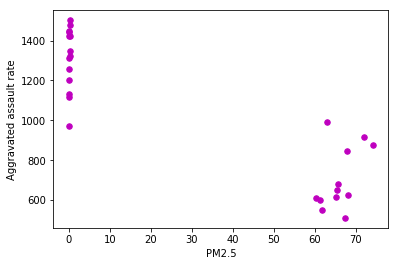

Chicago Annual Variance PM2.5 vs Aggravated assault rate
Estimated coefficients:
b_0 = 707216247.8386899
b_1 = 8.562397461297595


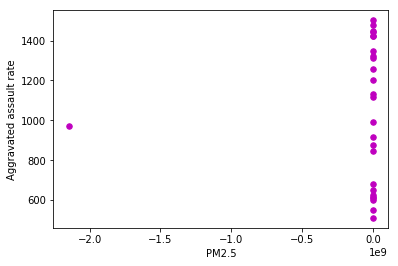

Minimum: [2147483647, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 1, 21, 24, 24, 18, 20, 14, 20, 24, 22, 29, 27]
Maximum: [0, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 157, 155, 158, 153, 152, 152, 186, 120, 156, 117, 116, 134]
Chicago Mean Annual PM2.5 vs Property crime rate
Estimated coefficients:
b_0 = -360.9020300769889
b_1 = 216.63523444004545


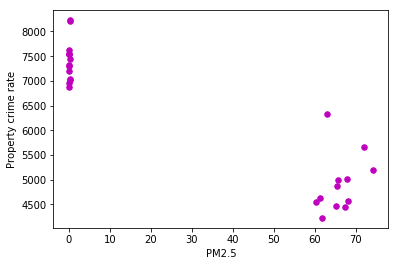

Chicago Annual Variance PM2.5 vs Property crime rate
Estimated coefficients:
b_0 = 4246848262.391835
b_1 = 51.41737397474914


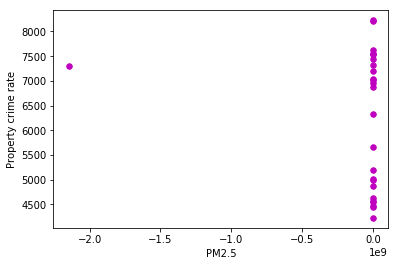

Minimum: [2147483647, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 1, 21, 24, 24, 18, 20, 14, 20, 24, 22, 29, 27]
Maximum: [0, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 157, 155, 158, 153, 152, 152, 186, 120, 156, 117, 116, 134]
Chicago Mean Annual PM2.5 vs Burglary rate
Estimated coefficients:
b_0 = -80.34248951538802
b_1 = 45.450355167270075


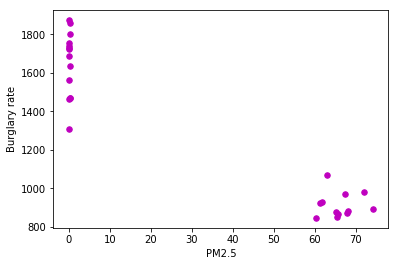

Chicago Annual Variance PM2.5 vs Burglary rate
Estimated coefficients:
b_0 = 881562802.3562427
b_1 = 10.673243076577355


Minimum: [2147483647, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 1, 21, 24, 24, 18, 20, 14, 20, 24, 22, 29, 27]
Maximum: [0, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 157, 155, 158, 153, 152, 152, 186, 120, 156, 117, 116, 134]
Chicago Mean Annual PM2.5 vs Larceny-theft rate
Estimated coefficients:
b_0 = -210.1086404802586
b_1 = 130.99176594464092


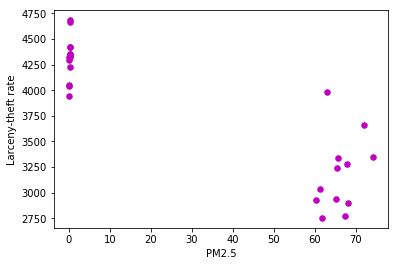

Chicago Annual Variance PM2.5 vs Larceny-theft rate
Estimated coefficients:
b_0 = 2583744128.829996
b_1 = 31.281866151347472


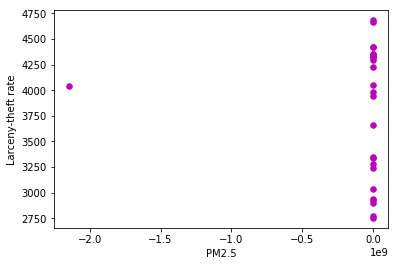

Minimum: [2147483647, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 1, 21, 24, 24, 18, 20, 14, 20, 24, 22, 29, 27]
Maximum: [0, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 157, 155, 158, 153, 152, 152, 186, 120, 156, 117, 116, 134]
Chicago Mean Annual PM2.5 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -70.451548517927
b_1 = 40.19363785847546


Chicago Annual Variance PM2.5 vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 781552256.5435064
b_1 = 9.462397021911041


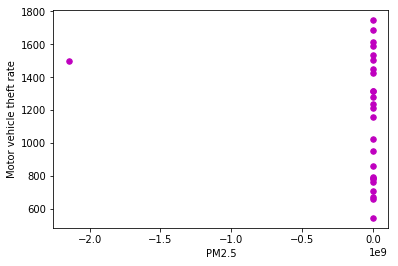

Minimum: [2147483647, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 1, 21, 24, 24, 18, 20, 14, 20, 24, 22, 29, 27]
Maximum: [0, 56, 46, 35, 64, 84, 86, 68, 74, 57, 62, 91, 83, 68, 157, 155, 158, 153, 152, 152, 186, 120, 156, 117, 116, 134]
New York
New York Mean Annual Carbon Monoxide vs Violent Crime rate
Estimated coefficients:
b_0 = -2.405646380181679
b_1 = 39.53521281295804


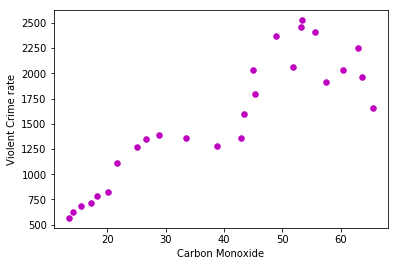

New York Annual Variance Carbon Monoxide vs Violent Crime rate
Estimated coefficients:
b_0 = -6.100354255723232
b_1 = 10.896562539814248


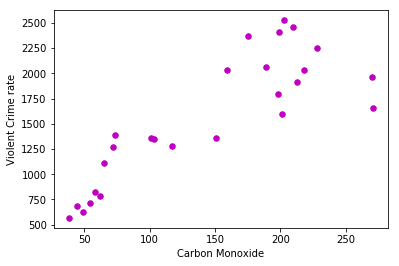

Minimum: [11, 11, 15, 11, 15, 11, 11, 13, 11, 16, 14, 16, 11, 14, 13, 10, 9, 8, 7, 6, 7, 6, 5, 5, 3, 3]
Maximum: [282, 229, 228, 281, 243, 210, 214, 223, 186, 205, 173, 214, 212, 165, 130, 111, 82, 111, 79, 71, 65, 68, 59, 49, 52, 41]
New York Mean Annual Carbon Monoxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.034531770645227056
b_1 = 0.4729538045752885


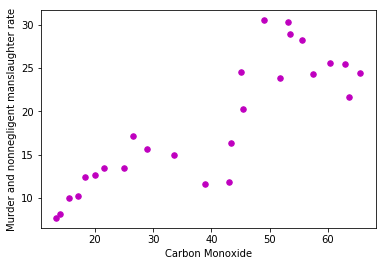

New York Annual Variance Carbon Monoxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.07838649999894187
b_1 = 0.13035153157752552


Minimum: [11, 11, 15, 11, 15, 11, 11, 13, 11, 16, 14, 16, 11, 14, 13, 10, 9, 8, 7, 6, 7, 6, 5, 5, 3, 3]
Maximum: [282, 229, 228, 281, 243, 210, 214, 223, 186, 205, 173, 214, 212, 165, 130, 111, 82, 111, 79, 71, 65, 68, 59, 49, 52, 41]
New York Mean Annual Carbon Monoxide vs Legacy rape rate
Estimated coefficients:
b_0 = -0.08752145421522073
b_1 = 1.0925932493600212


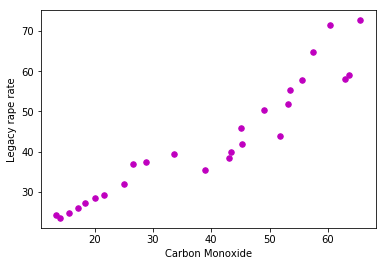

New York Annual Variance Carbon Monoxide vs Legacy rape rate
Estimated coefficients:
b_0 = -0.18852493228563105
b_1 = 0.3011291717923748


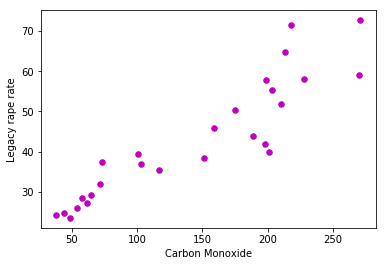

Minimum: [11, 11, 15, 11, 15, 11, 11, 13, 11, 16, 14, 16, 11, 14, 13, 10, 9, 8, 7, 6, 7, 6, 5, 5, 3, 3]
Maximum: [282, 229, 228, 281, 243, 210, 214, 223, 186, 205, 173, 214, 212, 165, 130, 111, 82, 111, 79, 71, 65, 68, 59, 49, 52, 41]
New York Mean Annual Carbon Monoxide vs Robbery rate
Estimated coefficients:
b_0 = -0.6587162680593792
b_1 = 16.220782167659806


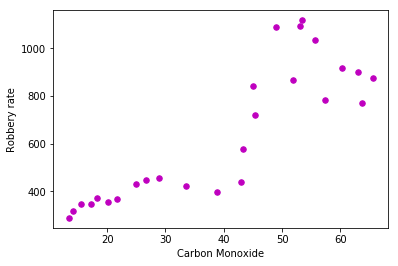

New York Annual Variance Carbon Monoxide vs Robbery rate
Estimated coefficients:
b_0 = -2.035656055554796
b_1 = 4.469746588939647


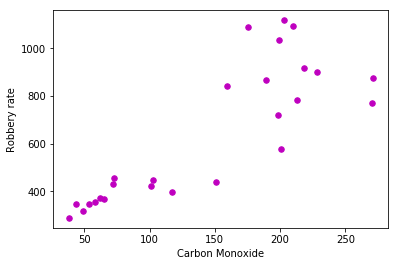

Minimum: [11, 11, 15, 11, 15, 11, 11, 13, 11, 16, 14, 16, 11, 14, 13, 10, 9, 8, 7, 6, 7, 6, 5, 5, 3, 3]
Maximum: [282, 229, 228, 281, 243, 210, 214, 223, 186, 205, 173, 214, 212, 165, 130, 111, 82, 111, 79, 71, 65, 68, 59, 49, 52, 41]
New York Mean Annual Carbon Monoxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -1.6244852916017862
b_1 = 21.749069116866437


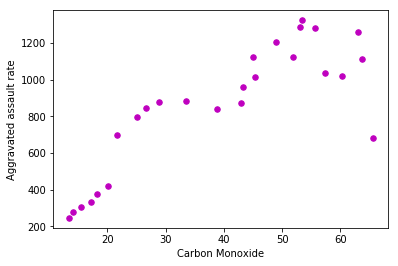

New York Annual Variance Carbon Monoxide vs Aggravated assault rate
Estimated coefficients:
b_0 = -3.7972879692656534
b_1 = 5.99538551120691


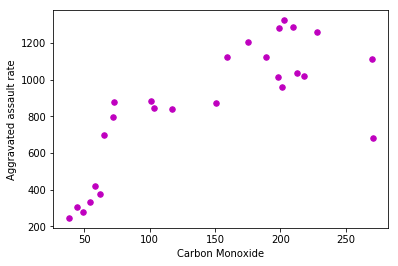

Minimum: [11, 11, 15, 11, 15, 11, 11, 13, 11, 16, 14, 16, 11, 14, 13, 10, 9, 8, 7, 6, 7, 6, 5, 5, 3, 3]
Maximum: [282, 229, 228, 281, 243, 210, 214, 223, 186, 205, 173, 214, 212, 165, 130, 111, 82, 111, 79, 71, 65, 68, 59, 49, 52, 41]
New York Mean Annual Carbon Monoxide vs Property crime rate
Estimated coefficients:
b_0 = -6.035901250903407
b_1 = 121.27525720685476


New York Annual Variance Carbon Monoxide vs Property crime rate
Estimated coefficients:
b_0 = -16.487953207495593
b_1 = 33.41931921080218


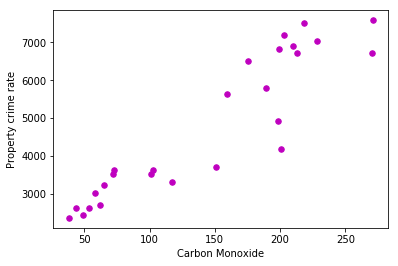

Minimum: [11, 11, 15, 11, 15, 11, 11, 13, 11, 16, 14, 16, 11, 14, 13, 10, 9, 8, 7, 6, 7, 6, 5, 5, 3, 3]
Maximum: [282, 229, 228, 281, 243, 210, 214, 223, 186, 205, 173, 214, 212, 165, 130, 111, 82, 111, 79, 71, 65, 68, 59, 49, 52, 41]
New York Mean Annual Carbon Monoxide vs Burglary rate
Estimated coefficients:
b_0 = 0.1535383198920499
b_1 = 25.987465179287565


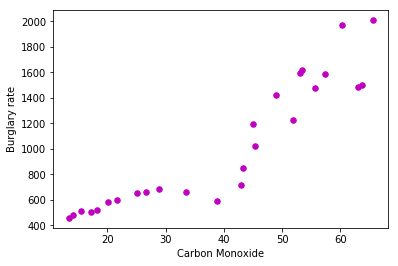

New York Annual Variance Carbon Monoxide vs Burglary rate
Estimated coefficients:
b_0 = -1.7775880182196033
b_1 = 7.159101663121126


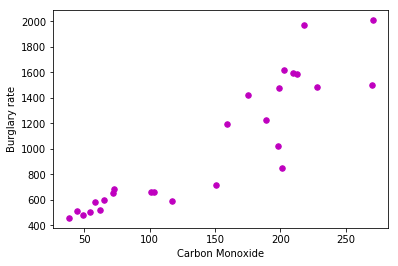

Minimum: [11, 11, 15, 11, 15, 11, 11, 13, 11, 16, 14, 16, 11, 14, 13, 10, 9, 8, 7, 6, 7, 6, 5, 5, 3, 3]
Maximum: [282, 229, 228, 281, 243, 210, 214, 223, 186, 205, 173, 214, 212, 165, 130, 111, 82, 111, 79, 71, 65, 68, 59, 49, 52, 41]
New York Mean Annual Carbon Monoxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -5.365661360319791
b_1 = 65.8983377149827


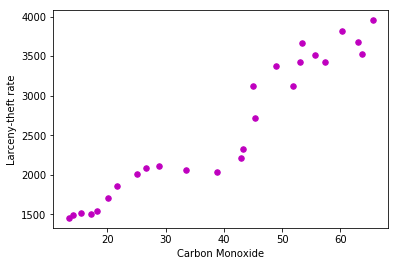

New York Annual Variance Carbon Monoxide vs Larceny-theft rate
Estimated coefficients:
b_0 = -11.427491636140076
b_1 = 18.162003435243115


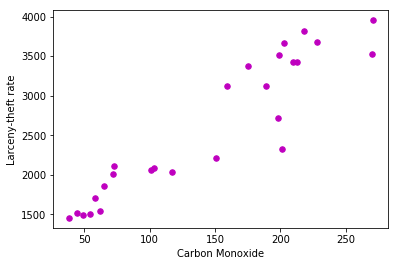

Minimum: [11, 11, 15, 11, 15, 11, 11, 13, 11, 16, 14, 16, 11, 14, 13, 10, 9, 8, 7, 6, 7, 6, 5, 5, 3, 3]
Maximum: [282, 229, 228, 281, 243, 210, 214, 223, 186, 205, 173, 214, 212, 165, 130, 111, 82, 111, 79, 71, 65, 68, 59, 49, 52, 41]
New York Mean Annual Carbon Monoxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -0.8235825391964227
b_1 = 29.3887651716633


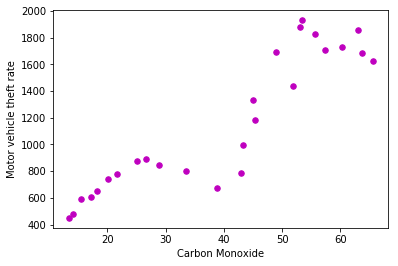

New York Annual Variance Carbon Monoxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = -3.282603644472374
b_1 = 8.098024105013781


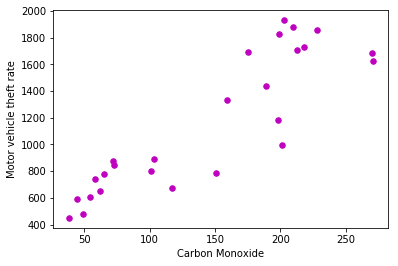

Minimum: [11, 11, 15, 11, 15, 11, 11, 13, 11, 16, 14, 16, 11, 14, 13, 10, 9, 8, 7, 6, 7, 6, 5, 5, 3, 3]
Maximum: [282, 229, 228, 281, 243, 210, 214, 223, 186, 205, 173, 214, 212, 165, 130, 111, 82, 111, 79, 71, 65, 68, 59, 49, 52, 41]
New York Mean Annual Nitrogen Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = 1.7662287239093075
b_1 = 21.276127572026304


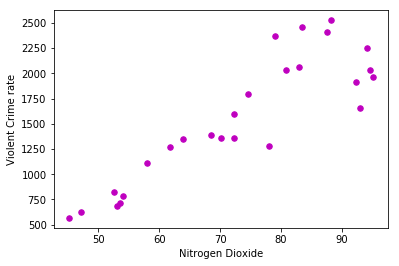

New York Annual Variance Nitrogen Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = 0.8592561122045481
b_1 = 15.998874094761273


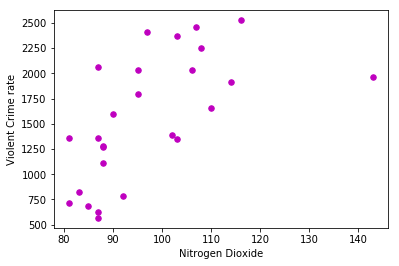

Minimum: [38, 38, 47, 38, 38, 38, 38, 28, 28, 42, 32, 33, 30, 33, 34, 28, 27, 28, 25, 24, 25, 16, 21, 21, 17, 17]
Maximum: [148, 144, 161, 181, 146, 135, 154, 135, 131, 129, 127, 128, 120, 114, 122, 115, 129, 131, 113, 112, 108, 108, 102, 106, 104, 104]
New York Mean Annual Nitrogen Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.017974105154525688
b_1 = 0.25448748436525453


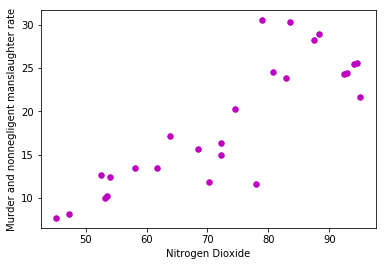

New York Annual Variance Nitrogen Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.010901726388699018
b_1 = 0.1913264189908418


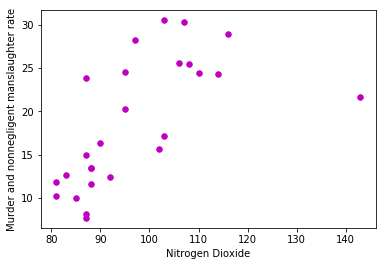

Minimum: [38, 38, 47, 38, 38, 38, 38, 28, 28, 42, 32, 33, 30, 33, 34, 28, 27, 28, 25, 24, 25, 16, 21, 21, 17, 17]
Maximum: [148, 144, 161, 181, 146, 135, 154, 135, 131, 129, 127, 128, 120, 114, 122, 115, 129, 131, 113, 112, 108, 108, 102, 106, 104, 104]
New York Mean Annual Nitrogen Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = 0.038237605697965193
b_1 = 0.5878425389183635


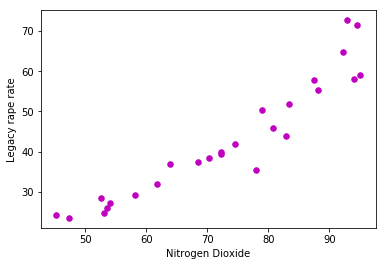

New York Annual Variance Nitrogen Dioxide vs Legacy rape rate
Estimated coefficients:
b_0 = 0.025594892640448563
b_1 = 0.44190825715075255


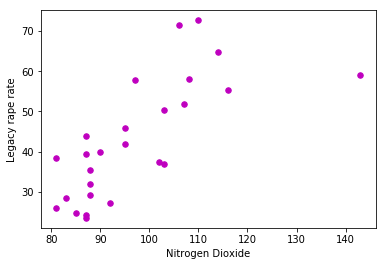

Minimum: [38, 38, 47, 38, 38, 38, 38, 28, 28, 42, 32, 33, 30, 33, 34, 28, 27, 28, 25, 24, 25, 16, 21, 21, 17, 17]
Maximum: [148, 144, 161, 181, 146, 135, 154, 135, 131, 129, 127, 128, 120, 114, 122, 115, 129, 131, 113, 112, 108, 108, 102, 106, 104, 104]
New York Mean Annual Nitrogen Dioxide vs Robbery rate
Estimated coefficients:
b_0 = 0.833191040665838
b_1 = 8.732331058084863


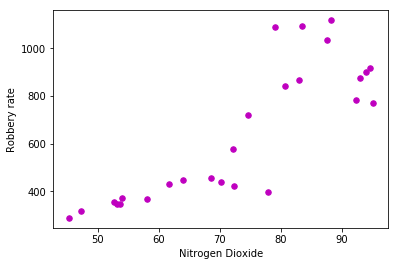

New York Annual Variance Nitrogen Dioxide vs Robbery rate
Estimated coefficients:
b_0 = 0.45440666386002704
b_1 = 6.566462713729544


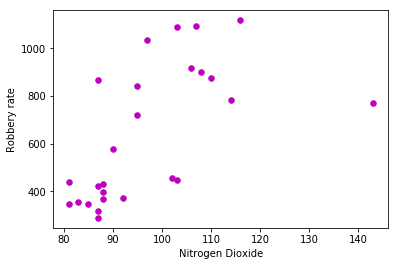

Minimum: [38, 38, 47, 38, 38, 38, 38, 28, 28, 42, 32, 33, 30, 33, 34, 28, 27, 28, 25, 24, 25, 16, 21, 21, 17, 17]
Maximum: [148, 144, 161, 181, 146, 135, 154, 135, 131, 129, 127, 128, 120, 114, 122, 115, 129, 131, 113, 112, 108, 108, 102, 106, 104, 104]
New York Mean Annual Nitrogen Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.8770382043034033
b_1 = 11.701569060349186


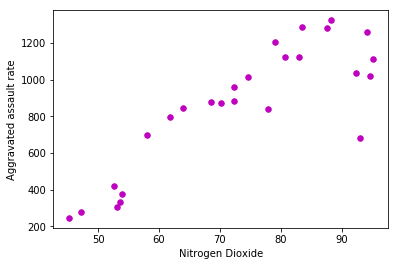

New York Annual Variance Nitrogen Dioxide vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.3684226913509292
b_1 = 8.7992552556579


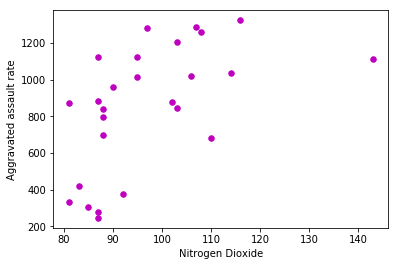

Minimum: [38, 38, 47, 38, 38, 38, 38, 28, 28, 42, 32, 33, 30, 33, 34, 28, 27, 28, 25, 24, 25, 16, 21, 21, 17, 17]
Maximum: [148, 144, 161, 181, 146, 135, 154, 135, 131, 129, 127, 128, 120, 114, 122, 115, 129, 131, 113, 112, 108, 108, 102, 106, 104, 104]
New York Mean Annual Nitrogen Dioxide vs Property crime rate
Estimated coefficients:
b_0 = 5.8590247489064495
b_1 = 65.27742926002657


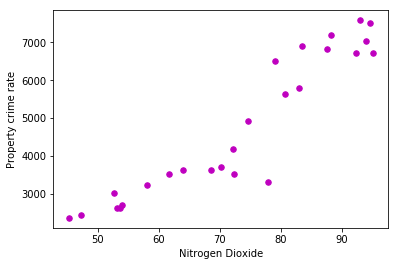

New York Annual Variance Nitrogen Dioxide vs Property crime rate
Estimated coefficients:
b_0 = 3.719683385137614
b_1 = 49.07962276337156


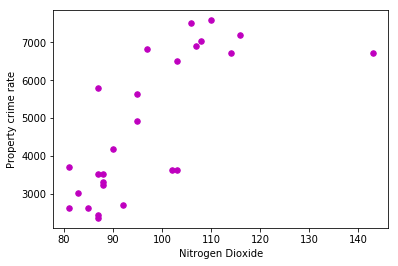

Minimum: [38, 38, 47, 38, 38, 38, 38, 28, 28, 42, 32, 33, 30, 33, 34, 28, 27, 28, 25, 24, 25, 16, 21, 21, 17, 17]
Maximum: [148, 144, 161, 181, 146, 135, 154, 135, 131, 129, 127, 128, 120, 114, 122, 115, 129, 131, 113, 112, 108, 108, 102, 106, 104, 104]
New York Mean Annual Nitrogen Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 1.935580392761608
b_1 = 13.998487652454852


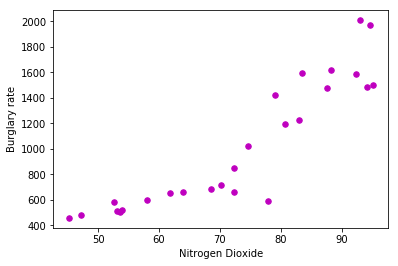

New York Annual Variance Nitrogen Dioxide vs Burglary rate
Estimated coefficients:
b_0 = 1.1747186104767025
b_1 = 10.52804491324915


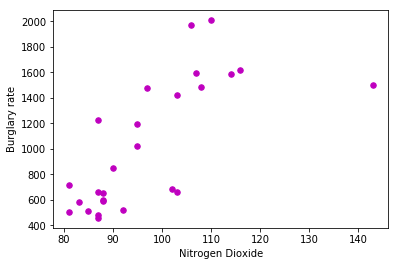

Minimum: [38, 38, 47, 38, 38, 38, 38, 28, 28, 42, 32, 33, 30, 33, 34, 28, 27, 28, 25, 24, 25, 16, 21, 21, 17, 17]
Maximum: [148, 144, 161, 181, 146, 135, 154, 135, 131, 129, 127, 128, 120, 114, 122, 115, 129, 131, 113, 112, 108, 108, 102, 106, 104, 104]
New York Mean Annual Nitrogen Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = 2.1747873402659934
b_1 = 35.4555673418934


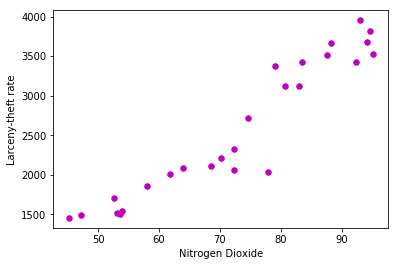

New York Annual Variance Nitrogen Dioxide vs Larceny-theft rate
Estimated coefficients:
b_0 = 1.408629053142704
b_1 = 26.65361698161644


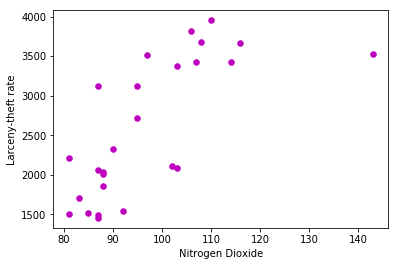

Minimum: [38, 38, 47, 38, 38, 38, 38, 28, 28, 42, 32, 33, 30, 33, 34, 28, 27, 28, 25, 24, 25, 16, 21, 21, 17, 17]
Maximum: [148, 144, 161, 181, 146, 135, 154, 135, 131, 129, 127, 128, 120, 114, 122, 115, 129, 131, 113, 112, 108, 108, 102, 106, 104, 104]
New York Mean Annual Nitrogen Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.7487309129371624
b_1 = 15.82300407273233


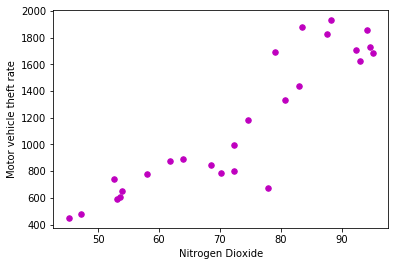

New York Annual Variance Nitrogen Dioxide vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.1363847415393593
b_1 = 11.89768291586206


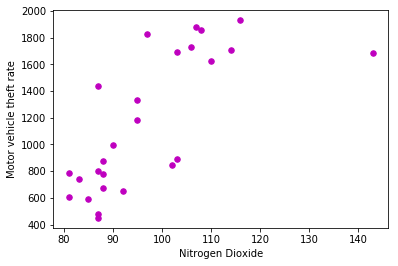

Minimum: [38, 38, 47, 38, 38, 38, 38, 28, 28, 42, 32, 33, 30, 33, 34, 28, 27, 28, 25, 24, 25, 16, 21, 21, 17, 17]
Maximum: [148, 144, 161, 181, 146, 135, 154, 135, 131, 129, 127, 128, 120, 114, 122, 115, 129, 131, 113, 112, 108, 108, 102, 106, 104, 104]
New York Mean Annual Ozone vs Violent Crime rate
Estimated coefficients:
b_0 = 0.3905984681823611
b_1 = 16.20774035528015


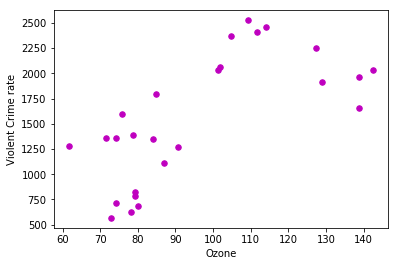

New York Annual Variance Ozone vs Violent Crime rate
Estimated coefficients:
b_0 = 1.7074967577741518
b_1 = 6.531181007657096


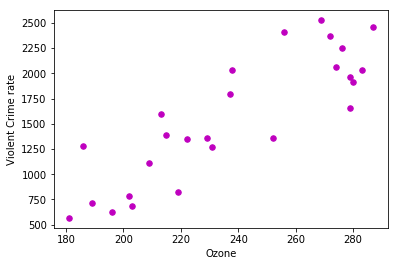

Minimum: [19, 17, 13, 19, 19, 20, 13, 13, 12, 18, 18, 10, 13, 17, 17, 14, 15, 19, 18, 20, 19, 22, 24, 24, 22, 19]
Maximum: [298, 300, 293, 298, 295, 276, 282, 300, 284, 292, 256, 247, 226, 269, 203, 243, 230, 241, 249, 229, 238, 224, 213, 227, 218, 200]
New York Mean Annual Ozone vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.010189818583768329
b_1 = 0.19377313436200516


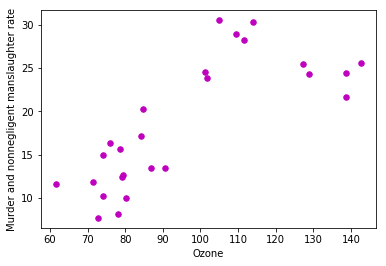

New York Annual Variance Ozone vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = 0.0208350384619429
b_1 = 0.07810559964383836


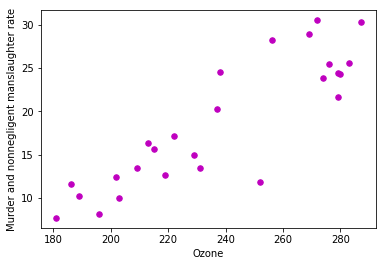

Minimum: [19, 17, 13, 19, 19, 20, 13, 13, 12, 18, 18, 10, 13, 17, 17, 14, 15, 19, 18, 20, 19, 22, 24, 24, 22, 19]
Maximum: [298, 300, 293, 298, 295, 276, 282, 300, 284, 292, 256, 247, 226, 269, 203, 243, 230, 241, 249, 229, 238, 224, 213, 227, 218, 200]
New York Mean Annual Ozone vs Legacy rape rate
Estimated coefficients:
b_0 = 0.025120668662061973
b_1 = 0.4475472448695781


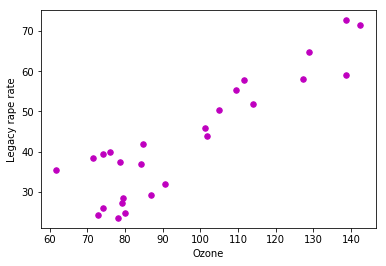

New York Annual Variance Ozone vs Legacy rape rate
Estimated coefficients:
b_0 = 0.03813344428971277
b_1 = 0.18044496202824473


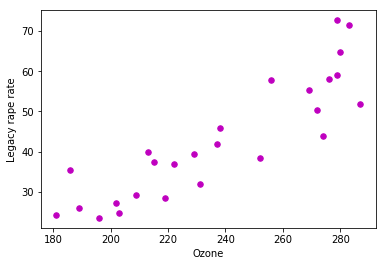

Minimum: [19, 17, 13, 19, 19, 20, 13, 13, 12, 18, 18, 10, 13, 17, 17, 14, 15, 19, 18, 20, 19, 22, 24, 24, 22, 19]
Maximum: [298, 300, 293, 298, 295, 276, 282, 300, 284, 292, 256, 247, 226, 269, 203, 243, 230, 241, 249, 229, 238, 224, 213, 227, 218, 200]
New York Mean Annual Ozone vs Robbery rate
Estimated coefficients:
b_0 = 0.572776581015205
b_1 = 6.648945400148867


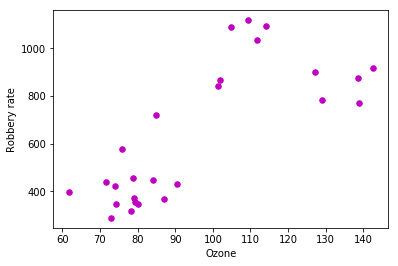

New York Annual Variance Ozone vs Robbery rate
Estimated coefficients:
b_0 = 0.8620227050545282
b_1 = 2.6803605973237143


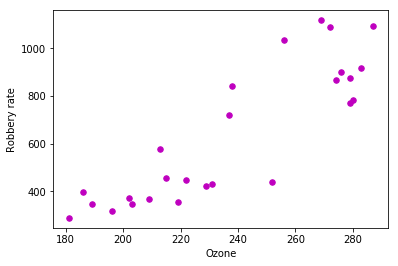

Minimum: [19, 17, 13, 19, 19, 20, 13, 13, 12, 18, 18, 10, 13, 17, 17, 14, 15, 19, 18, 20, 19, 22, 24, 24, 22, 19]
Maximum: [298, 300, 293, 298, 295, 276, 282, 300, 284, 292, 256, 247, 226, 269, 203, 243, 230, 241, 249, 229, 238, 224, 213, 227, 218, 200]
New York Mean Annual Ozone vs Aggravated assault rate
Estimated coefficients:
b_0 = -0.21731307582683712
b_1 = 8.917553025386063


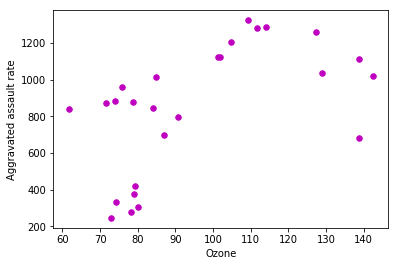

New York Annual Variance Ozone vs Aggravated assault rate
Estimated coefficients:
b_0 = 0.7866287304797197
b_1 = 3.592301708435735


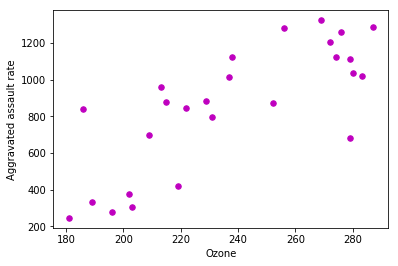

Minimum: [19, 17, 13, 19, 19, 20, 13, 13, 12, 18, 18, 10, 13, 17, 17, 14, 15, 19, 18, 20, 19, 22, 24, 24, 22, 19]
Maximum: [298, 300, 293, 298, 295, 276, 282, 300, 284, 292, 256, 247, 226, 269, 203, 243, 230, 241, 249, 229, 238, 224, 213, 227, 218, 200]
New York Mean Annual Ozone vs Property crime rate
Estimated coefficients:
b_0 = 4.743676173056883
b_1 = 49.694668562389275


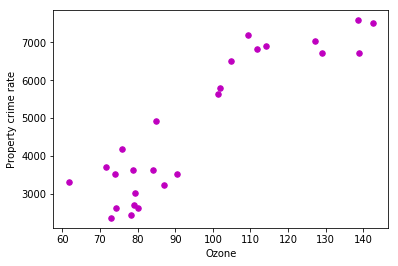

New York Annual Variance Ozone vs Property crime rate
Estimated coefficients:
b_0 = 5.811269257176718
b_1 = 20.037802654899373


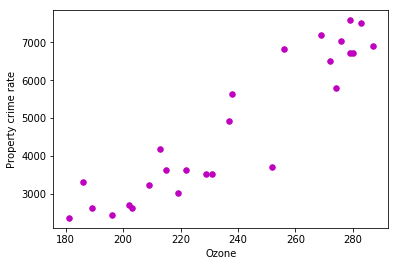

Minimum: [19, 17, 13, 19, 19, 20, 13, 13, 12, 18, 18, 10, 13, 17, 17, 14, 15, 19, 18, 20, 19, 22, 24, 24, 22, 19]
Maximum: [298, 300, 293, 298, 295, 276, 282, 300, 284, 292, 256, 247, 226, 269, 203, 243, 230, 241, 249, 229, 238, 224, 213, 227, 218, 200]
New York Mean Annual Ozone vs Burglary rate
Estimated coefficients:
b_0 = 2.0246604759108777
b_1 = 10.653400049800402


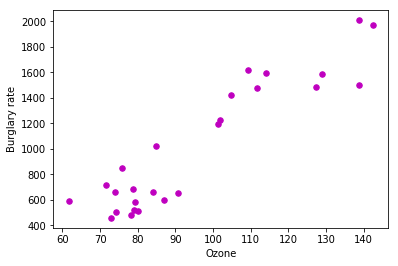

New York Annual Variance Ozone vs Burglary rate
Estimated coefficients:
b_0 = 1.7338180639990242
b_1 = 4.297834018186179


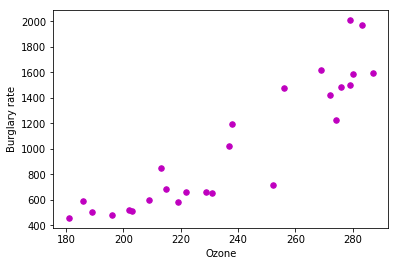

Minimum: [19, 17, 13, 19, 19, 20, 13, 13, 12, 18, 18, 10, 13, 17, 17, 14, 15, 19, 18, 20, 19, 22, 24, 24, 22, 19]
Maximum: [298, 300, 293, 298, 295, 276, 282, 300, 284, 292, 256, 247, 226, 269, 203, 243, 230, 241, 249, 229, 238, 224, 213, 227, 218, 200]
New York Mean Annual Ozone vs Larceny-theft rate
Estimated coefficients:
b_0 = 1.2203454850841808
b_1 = 26.99539803205816


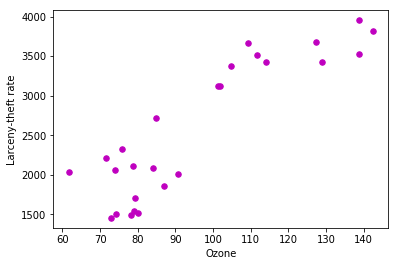

New York Annual Variance Ozone vs Larceny-theft rate
Estimated coefficients:
b_0 = 2.381879092127292
b_1 = 10.882592058216721


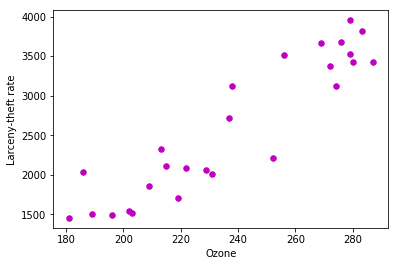

Minimum: [19, 17, 13, 19, 19, 20, 13, 13, 12, 18, 18, 10, 13, 17, 17, 14, 15, 19, 18, 20, 19, 22, 24, 24, 22, 19]
Maximum: [298, 300, 293, 298, 295, 276, 282, 300, 284, 292, 256, 247, 226, 269, 203, 243, 230, 241, 249, 229, 238, 224, 213, 227, 218, 200]
New York Mean Annual Ozone vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.498669295707714
b_1 = 12.045589505338967


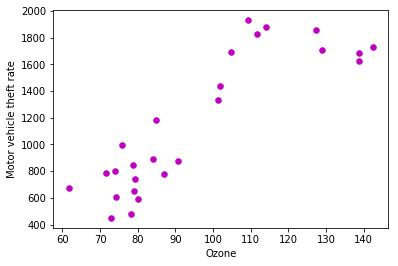

New York Annual Variance Ozone vs Motor vehicle theft rate
Estimated coefficients:
b_0 = 1.6955542023154067
b_1 = 4.857263330215283


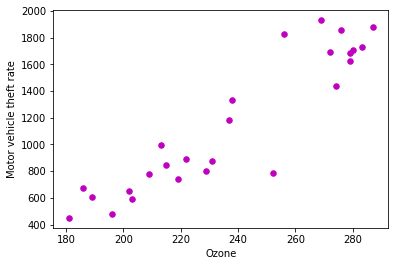

Minimum: [19, 17, 13, 19, 19, 20, 13, 13, 12, 18, 18, 10, 13, 17, 17, 14, 15, 19, 18, 20, 19, 22, 24, 24, 22, 19]
Maximum: [298, 300, 293, 298, 295, 276, 282, 300, 284, 292, 256, 247, 226, 269, 203, 243, 230, 241, 249, 229, 238, 224, 213, 227, 218, 200]
New York Mean Annual Sulfur Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = -2.600090794812104
b_1 = 77.94570532061574


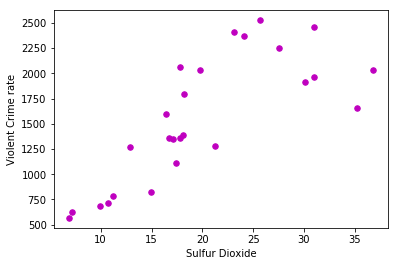

New York Annual Variance Sulfur Dioxide vs Violent Crime rate
Estimated coefficients:
b_0 = -3.61990963044218
b_1 = 16.31007963351793


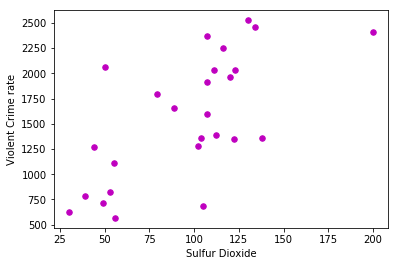

Minimum: [14, 14, 0, 14, 0, 0, 0, 0, 0, 6, 6, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 1, 3, 1, 1, 0]
Maximum: [103, 125, 107, 134, 116, 200, 130, 134, 107, 56, 129, 82, 110, 107, 106, 141, 115, 125, 47, 59, 57, 40, 52, 106, 31, 56]
New York Mean Annual Sulfur Dioxide vs Murder and nonnegligent manslaughter rate
Estimated coefficients:
b_0 = -0.029083455038644956
b_1 = 0.9320632914116623


In [ ]:
for i, x in enumerate(cities):
    print(x)
    for j, y in enumerate(pollution[i]):
        data = pollution_data(y, pollution_index[j])
        mean = np.array(data[0])
        variance = np.array(data[3])
        for k, z in enumerate(rates[i]):
            print(x, 'Mean Annual', pollution_index[j], 'vs', crime_index[k])
            arrays_to_reg(mean, z, pollution_index[j], crime_index[k])
            print(x, 'Annual Variance', pollution_index[j], 'vs', crime_index[k])
            arrays_to_reg(variance, z, pollution_index[j], crime_index[k])
            print('Minimum:', data[1])
            print('Maximum:', data[2])